In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [13]:
bit_df = pd.read_csv('bitcoin_dataset.csv')
eth_df = pd.read_csv('ethereum_dataset.csv')

## Bitcoin Dataset Cleaning

In [14]:
bit_df.head()

Date  btc_market_price  btc_total_bitcoins  btc_market_cap  \
0  2010-02-23 00:00:00               0.0           2110700.0             0.0   
1  2010-02-24 00:00:00               0.0           2120200.0             0.0   
2  2010-02-25 00:00:00               0.0           2127600.0             0.0   
3  2010-02-26 00:00:00               0.0           2136100.0             0.0   
4  2010-02-27 00:00:00               0.0           2144750.0             0.0   

   btc_trade_volume  btc_blocks_size  btc_avg_block_size  \
0               0.0              0.0            0.000216   
1               0.0              0.0            0.000282   
2               0.0              0.0            0.000227   
3               0.0              0.0            0.000319   
4               0.0              0.0            0.000223   

   btc_n_orphaned_blocks  btc_n_transactions_per_block  \
0                    0.0                           1.0   
1                    0.0                           1.0   
2                    0.0                           1.0   
3                    0.0                           1.0   
4                    0.0                           1.0   

   btc_median_confirmation_time  ...  btc_cost_per_transaction_percent  \
0                           0.0  ...                      25100.000000   
1                           0.0  ...                        179.245283   
2                           0.0  ...                       1057.142857   
3                           0.0  ...                         64.582059   
4                           0.0  ...                       1922.222222   

   btc_cost_per_transaction  btc_n_unique_addresses  btc_n_transactions  \
0                       0.0                   252.0               252.0   
1                       0.0                   195.0               196.0   
2                       0.0                   150.0               150.0   
3                       0.0                   176.0               176.0   
4                       0.0                   176.0               176.0   

   btc_n_transactions_total  btc_n_transactions_excluding_popular  \
0                   42613.0                                 252.0   
1                   42809.0                                 196.0   
2                   42959.0                                 150.0   
3                   43135.0                                 176.0   
4                   43311.0                                 176.0   

   btc_n_transactions_excluding_chains_longer_than_100  btc_output_volume  \
0                                              252.0              12600.0   
1                                              196.0              14800.0   
2                                              150.0               8100.0   
3                                              176.0              29349.0   
4                                              176.0               9101.0   

   btc_estimated_transaction_volume  btc_estimated_transaction_volume_usd  
0                              50.0                                   0.0  
1                            5300.0                                   0.0  
2                             700.0                                   0.0  
3                           13162.0                                   0.0  
4                             450.0                                   0.0  

[5 rows x 24 columns]

In [15]:
bit_df.describe()

btc_market_price  btc_total_bitcoins  btc_market_cap  btc_trade_volume  \
count       2920.000000        2.920000e+03    2.920000e+03      2.899000e+03   
mean         897.485562        1.152051e+07    1.443022e+10      8.231157e+07   
std         2400.159935        4.200938e+06    4.029263e+10      3.116642e+08   
min            0.000000        2.110700e+06    0.000000e+00      0.000000e+00   
25%            6.768750        8.405100e+06    5.560588e+07      2.994316e+05   
50%          236.310000        1.242910e+07    3.364730e+09      1.024364e+07   
75%          603.909050        1.523764e+07    8.210042e+09      2.934823e+07   
max        19498.683333        1.687682e+07    3.265254e+11      5.352016e+09   

       btc_blocks_size  btc_avg_block_size  btc_n_orphaned_blocks  \
count      2920.000000         2920.000000            2920.000000   
mean      36058.374765            0.355733               0.362329   
std       44536.901058            0.356388               0.840614   
min           0.000000            0.000216               0.000000   
25%         777.250000            0.024595               0.000000   
50%       15132.000000            0.199806               0.000000   
75%       59301.750000            0.688036               0.000000   
max      157664.996336            1.110327               7.000000   

       btc_n_transactions_per_block  btc_median_confirmation_time  \
count                   2920.000000                   2920.000000   
mean                     677.010924                      7.547221   
std                      689.042018                      4.956135   
min                        1.000000                      0.000000   
25%                       55.000000                      6.129167   
50%                      378.500000                      7.933333   
75%                     1238.569055                     10.237500   
max                     2722.625000                     47.733333   

       btc_hash_rate  ...  btc_cost_per_transaction_percent  \
count   2.920000e+03  ...                       2920.000000   
mean    1.387725e+06  ...                         58.079229   
std     3.379005e+06  ...                       1709.115660   
min     2.657847e-05  ...                          0.136531   
25%     1.169741e+01  ...                          1.180738   
50%     2.640642e+04  ...                          2.461625   
75%     1.097174e+06  ...                          5.844059   
max     2.557925e+07  ...                      88571.428571   

       btc_cost_per_transaction  btc_n_unique_addresses  btc_n_transactions  \
count               2920.000000            2.920000e+03         2920.000000   
mean                  15.237677            1.959608e+05       102922.695548   
std                   21.638354            2.093837e+05       103846.693961   
min                    0.000000            1.100000e+02          118.000000   
25%                    4.220581            1.719000e+04         8157.000000   
50%                    7.865943            1.325365e+05        63006.000000   
75%                   15.285634            3.666370e+05       191465.250000   
max                  161.686071            1.072861e+06       490644.000000   

       btc_n_transactions_total  btc_n_transactions_excluding_popular  \
count              2.920000e+03                           2920.000000   
mean               7.016399e+07                          95187.560616   
std                8.475145e+07                         103941.129363   
min                4.261300e+04                            118.000000   
25%                2.484693e+06                           6995.500000   
50%                3.340692e+07                          55015.500000   
75%                1.116330e+08                         187182.750000   
max                3.005766e+08                         470650.000000   

       btc_n_transactions_excluding_chains_longer_than_100  btc_output_volume  \
count         

### Fixing Datatypes

In [16]:
bit_df.dtypes

Date                                                    object
btc_market_price                                       float64
btc_total_bitcoins                                     float64
btc_market_cap                                         float64
btc_trade_volume                                       float64
btc_blocks_size                                        float64
btc_avg_block_size                                     float64
btc_n_orphaned_blocks                                  float64
btc_n_transactions_per_block                           float64
btc_median_confirmation_time                           float64
btc_hash_rate                                          float64
btc_difficulty                                         float64
btc_miners_revenue                                     float64
btc_transaction_fees                                   float64
btc_cost_per_transaction_percent                       float64
btc_cost_per_transaction                               

In [17]:
date_col = bit_df['Date'].str.split(" ").str[0].str.split("-")
date_col
yr = pd.Series(map(int,date_col.str[0]))
mnth = pd.Series(map(int,date_col.str[1]))
day = pd.Series(map(int,date_col.str[2]))

date = pd.DataFrame({"Year": yr, "Month": mnth, "Day": day})

bit_df["Date"] = pd.to_datetime(date)
bit_df

Date  btc_market_price  btc_total_bitcoins  btc_market_cap  \
0    2010-02-23          0.000000           2110700.0    0.000000e+00   
1    2010-02-24          0.000000           2120200.0    0.000000e+00   
2    2010-02-25          0.000000           2127600.0    0.000000e+00   
3    2010-02-26          0.000000           2136100.0    0.000000e+00   
4    2010-02-27          0.000000           2144750.0    0.000000e+00   
...         ...               ...                 ...             ...   
2915 2018-02-16      10127.161667          16869150.0    1.708366e+11   
2916 2018-02-17      10841.991667          16871012.5    1.829154e+11   
2917 2018-02-18      10503.298333          16873037.5    1.772225e+11   
2918 2018-02-19      11110.965000          16875062.5    1.874982e+11   
2919 2018-02-20      11390.391667          16876825.0    1.922336e+11   

      btc_trade_volume  btc_blocks_size  btc_avg_block_size  \
0         0.000000e+00         0.000000            0.000216   
1         0.000000e+00         0.000000            0.000282   
2         0.000000e+00         0.000000            0.000227   
3         0.000000e+00         0.000000            0.000319   
4         0.000000e+00         0.000000            0.000223   
...                ...              ...                 ...   
2915      8.665020e+08    157056.833478            0.989634   
2916      9.735543e+08    157201.813038            0.973017   
2917      1.377347e+09    157359.401239            0.972767   
2918      1.020589e+09    157522.467859            1.006584   
2919      1.258473e+09    157664.996336            1.010840   

      btc_n_orphaned_blocks  btc_n_transactions_per_block  \
0                       0.0                      1.000000   
1                       0.0                      1.000000   
2                       0.0                      1.000000   
3                       0.0                      1.000000   
4                       0.0                      1.000000   
...                     ...                           ...   
2915                    0.0                   1195.783439   
2916                    0.0                   1166.369128   
2917                    0.0                    984.537037   
2918                    0.0                   1156.586420   
2919                    0.0                   1407.482270   

      btc_median_confirmation_time  ...  btc_cost_per_transaction_percent  \
0                         0.000000  ...                      25100.000000   
1                         0.000000  ...                        179.245283   
2                         0.000000  ...                       1057.142857   
3                         0.000000  ...                         64.582059   
4                         0.000000  ...                       1922.222222   
...                            ...  ...                               ...   
2915                      6.616667  ...                          1.893340   
2916                      7.933333  ...                          2.362525   
2917                      6.966667  ...                          2.598018   
2918                      8.416667  ...                          2.006207   
2919                      8.466667  ...                          1.391617   

      btc_cost_per_transaction  btc_n_unique_addresses  btc_n_transactions  \
0                     0.000000                   252.0               252.0   
1                     0.000000                   195.0               196.0   
2                     0.000000                   150.0               150.0   
3                     0.000000                   176.0               176.0   
4                     0.000000                   176.0               176.0   
...                        ...                     ...                 ...   
2915                109.005818                422415.0            187738.0   
2916                119.228205                401860.0            173789.0   
2917             

In [18]:
bit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 24 columns):
Date                                                   2920 non-null datetime64[ns]
btc_market_price                                       2920 non-null float64
btc_total_bitcoins                                     2920 non-null float64
btc_market_cap                                         2920 non-null float64
btc_trade_volume                                       2899 non-null float64
btc_blocks_size                                        2920 non-null float64
btc_avg_block_size                                     2920 non-null float64
btc_n_orphaned_blocks                                  2920 non-null float64
btc_n_transactions_per_block                           2920 non-null float64
btc_median_confirmation_time                           2920 non-null float64
btc_hash_rate                                          2920 non-null float64
btc_difficulty                         

### Inputing Missing Values

In [19]:
bit_df.isnull().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                      0
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                         0
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                            0
btc_hash_rate                                           0
btc_difficulty                                          0
btc_miners_revenue                                      0
btc_transaction_fees                                    0
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

#### Replacing missing values with the 50th percentile

In [20]:
missing = bit_df['btc_trade_volume'].isnull()
bit_df.loc[missing, 'btc_trade_volume'] = bit_df['btc_trade_volume'].quantile(0.5)

In [21]:
bit_df.isnull().sum()

Date                                                   0
btc_market_price                                       0
btc_total_bitcoins                                     0
btc_market_cap                                         0
btc_trade_volume                                       0
btc_blocks_size                                        0
btc_avg_block_size                                     0
btc_n_orphaned_blocks                                  0
btc_n_transactions_per_block                           0
btc_median_confirmation_time                           0
btc_hash_rate                                          0
btc_difficulty                                         0
btc_miners_revenue                                     0
btc_transaction_fees                                   0
btc_cost_per_transaction_percent                       0
btc_cost_per_transaction                               0
btc_n_unique_addresses                                 0
btc_n_transactions             

### Detecting and Removing Outliers

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


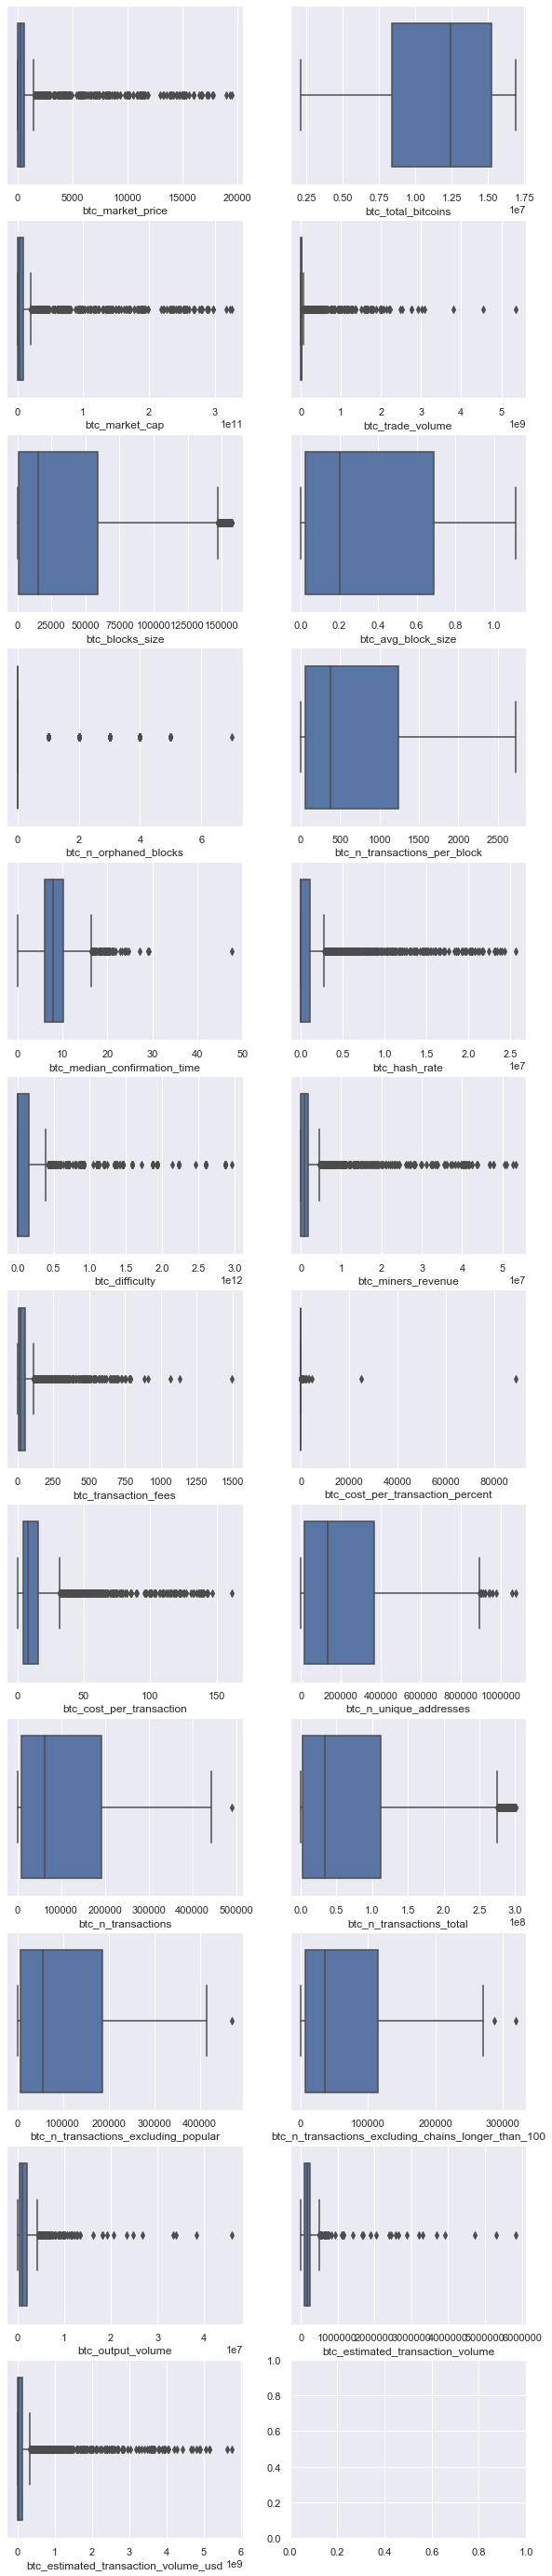

In [22]:
fig, axes = plt.subplots(nrows=12, ncols=2, figsize=(10,50))
for i, column in enumerate(bit_df.columns.drop(["Date"])):
    sns.boxplot(x = bit_df[column],ax=axes[i//2,i%2])
fig.show()

#### Determining Interquartile Range

In [23]:
columns = bit_df.columns.drop(["Date"])
Q1 = bit_df[columns].quantile(0.25)
Q3 = bit_df[columns].quantile(0.75)
IQR = Q3 - Q1
IQR

btc_market_price                                       5.971403e+02
btc_total_bitcoins                                     6.832538e+06
btc_market_cap                                         8.154436e+09
btc_trade_volume                                       2.874022e+07
btc_blocks_size                                        5.852450e+04
btc_avg_block_size                                     6.634413e-01
btc_n_orphaned_blocks                                  0.000000e+00
btc_n_transactions_per_block                           1.183569e+03
btc_median_confirmation_time                           4.108333e+00
btc_hash_rate                                          1.097162e+06
btc_difficulty                                         1.584256e+11
btc_miners_revenue                                     1.817336e+06
btc_transaction_fees                                   4.105524e+01
btc_cost_per_transaction_percent                       4.663321e+00
btc_cost_per_transaction                        

In [24]:
temp = bit_df[columns]
len(temp[~((temp < (Q1 - 1.5 * IQR)) |(temp > (Q3 + 1.5 * IQR))).any(axis=1)])

1193

- Outliers are being computed using the interquartile method. Any value outside 1.5 times the interquartile range is considered an outlier.
- **1193** of our records are being classified as outliers out of a total of **2920** records. This is a huge number and hence we have decided **not** to remove these anamolies.
- A major proportion of our analysis will revolve around studying these anamolic trends.

In [25]:
bit_df.isnull().sum()

Date                                                   0
btc_market_price                                       0
btc_total_bitcoins                                     0
btc_market_cap                                         0
btc_trade_volume                                       0
btc_blocks_size                                        0
btc_avg_block_size                                     0
btc_n_orphaned_blocks                                  0
btc_n_transactions_per_block                           0
btc_median_confirmation_time                           0
btc_hash_rate                                          0
btc_difficulty                                         0
btc_miners_revenue                                     0
btc_transaction_fees                                   0
btc_cost_per_transaction_percent                       0
btc_cost_per_transaction                               0
btc_n_unique_addresses                                 0
btc_n_transactions             

In [26]:
bit_df.to_pickle("./DataAnalysis.pkl")

## Bitcoin Data Analysis

In [63]:
bit_df.shape

(2920, 24)

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


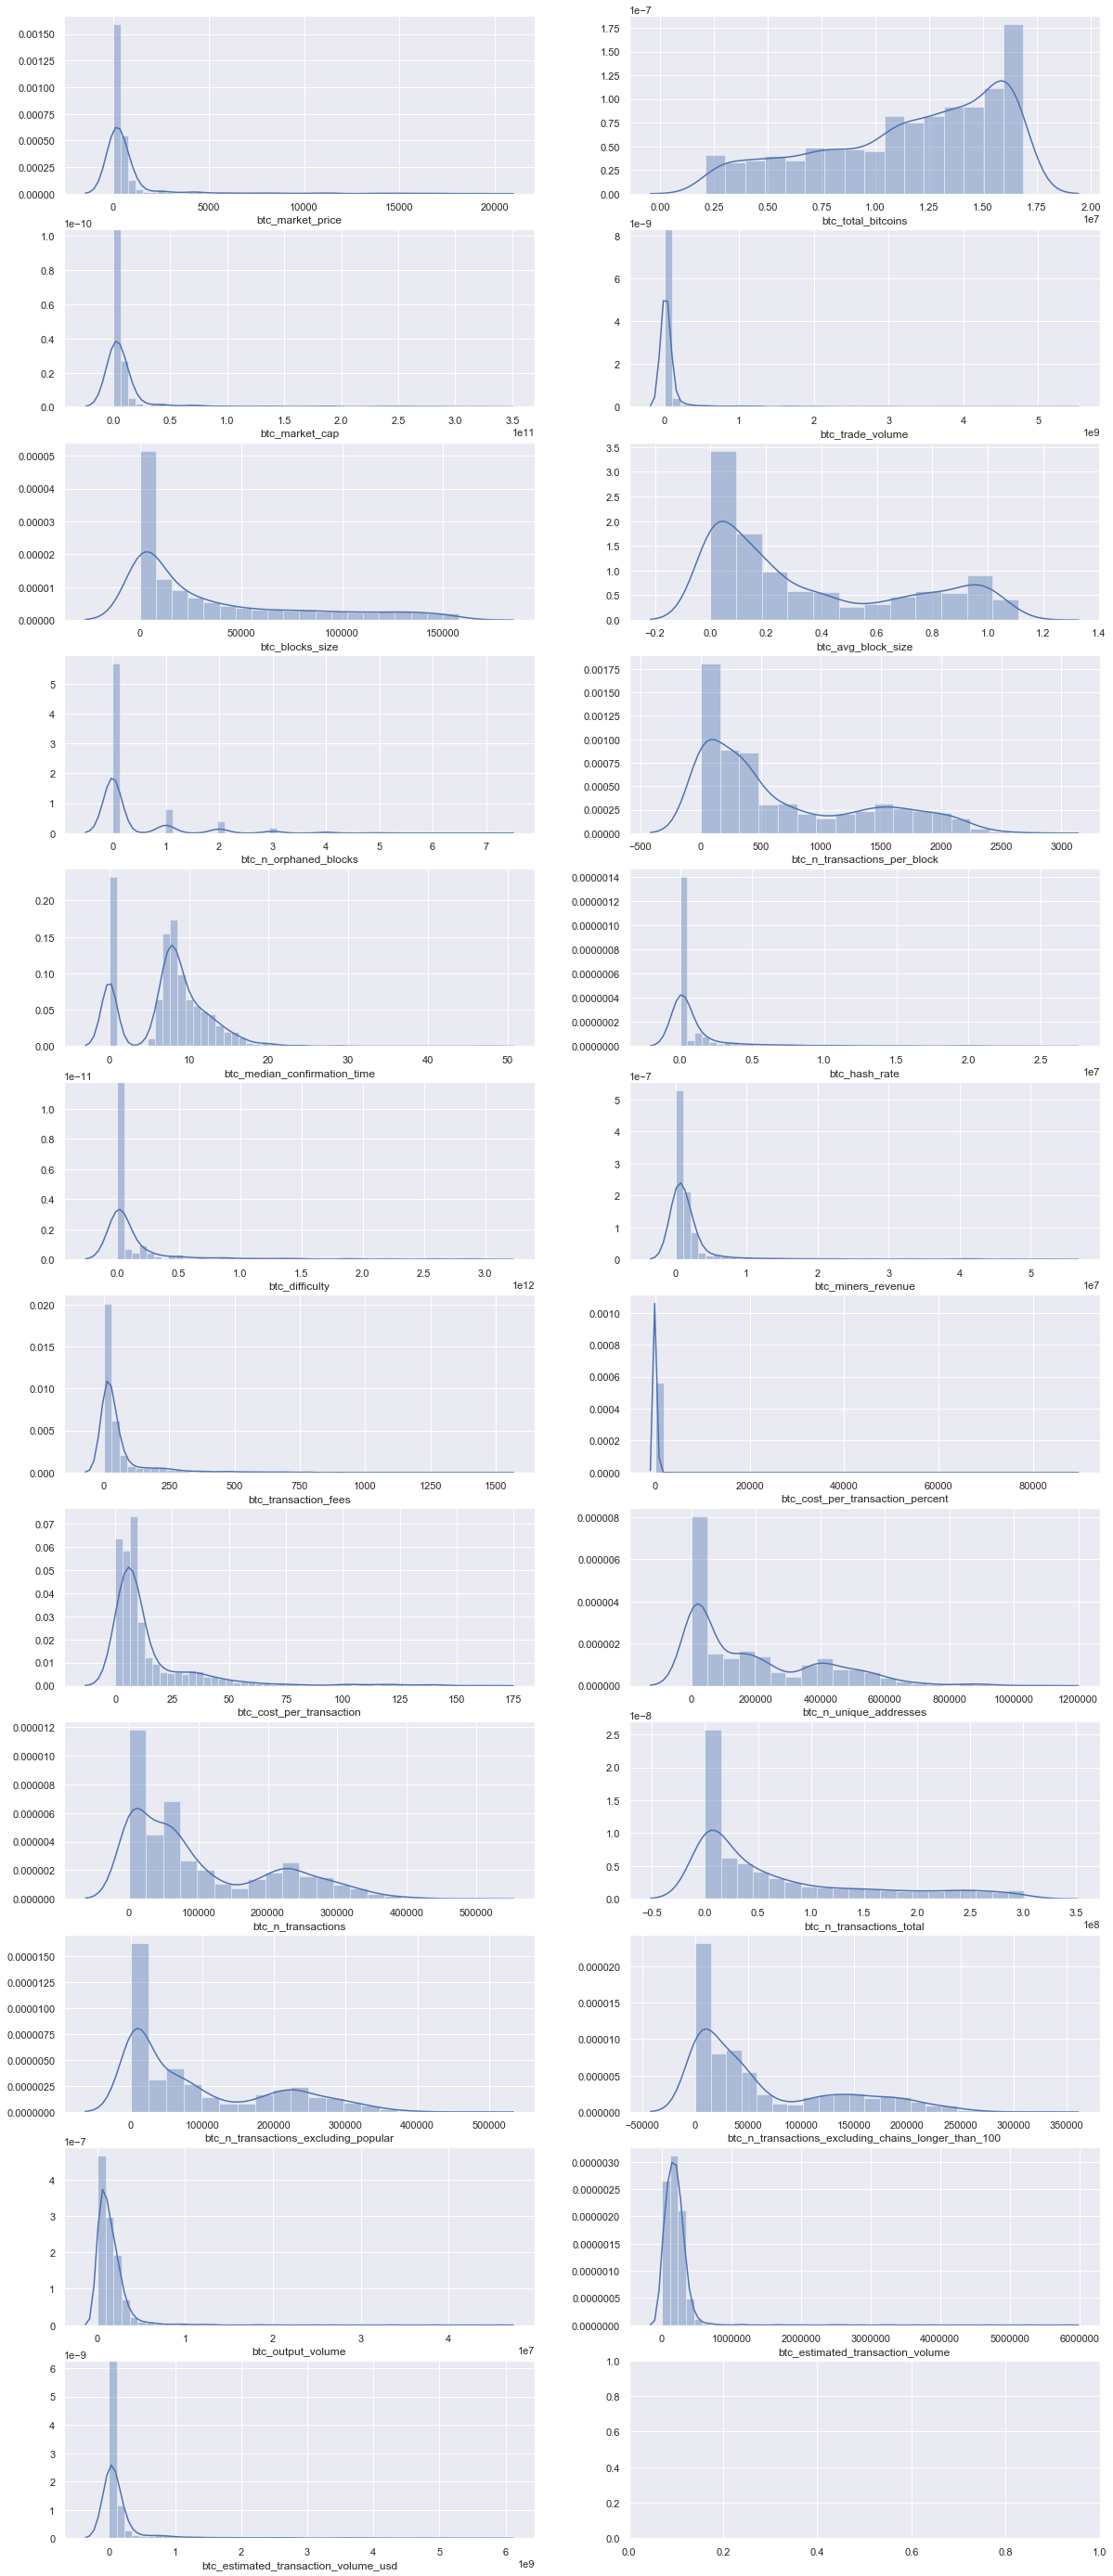

In [26]:
fig, axes = plt.subplots(nrows=12, ncols=2, figsize=(20,50))
for i, column in enumerate(bit_df.columns.drop(["Date"])):
    sns.distplot(bit_df[column],ax=axes[i//2,i%2])
# fig.autofmt_xdate()
fig.show()


- ***Classification***

    - **btc_market_price** Right Skewed
    - **btc_total_bitcoins** Left Skewed
    - **btc_market_cap** Right Skewed
    - **btc_trade_volume** Right Skewed
    - **btc_blocks_size** Right Skewed
    - **btc_avg_block_size** BiModal
    - **btc_n_orphaned_blocks** MultiModal 
    - **btc_n_transactions_per_block** Right Skewed
    - **btc_median_confirmation_time** BiModal
    - **btc_hash_rate** Right Skewed
    - **btc_difficulty** Right Skewed
    - **btc_miners_revenue** Right Skewed
    - **btc_transaction_fees** Right Skewed
    - **btc_cost_per_transaction** Right
    - **btc_n_unique_addresses** BiModal
    - **btc_n_transactions** BiModal
    - **btc_n_transactions_total** Right Skewed
    - **btc_n_transactions_excluding_popular** BiModal
    - **btc_n_transactions_excluding_chains_longer_than_100** BiModal
    - **btc_output_volume** Right Skewed
    - **btc_estimated_transaction_volume** Right Skewed
    - **btc_estimated_transaction_volume_usd** Right Skewed

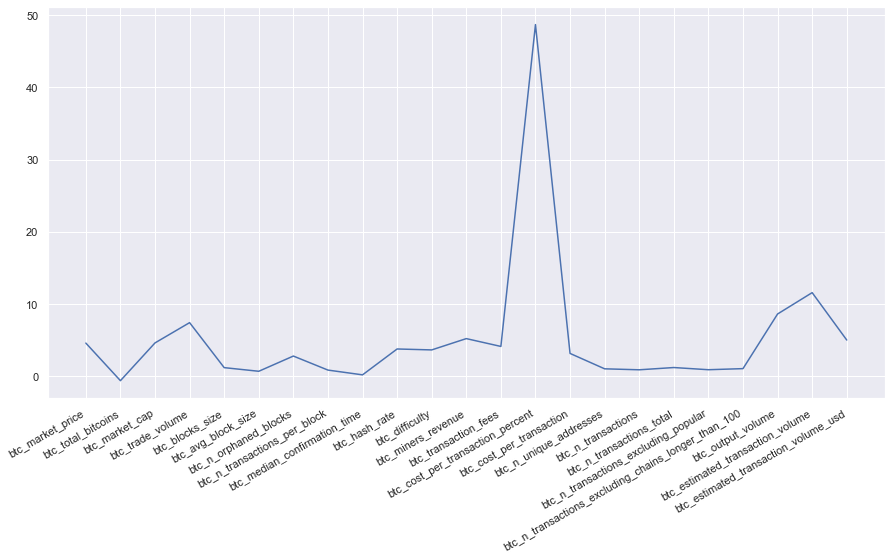

In [27]:
f1, axx = plt.subplots(figsize=(15, 8))
axx.plot(bit_df.skew())
f1.autofmt_xdate()

- -ve skew means mass of the distribution is concentrated on the right hand side of the axis i.e mean is less than the median. +ve skew means the opposite.
- This plot confirms the skewed classifications in the above section
- Almost every variable is (slightly or significantly) positively skewed.
- btc_cost_per_transaction_percent is very highly positively skewed (value of ~50)

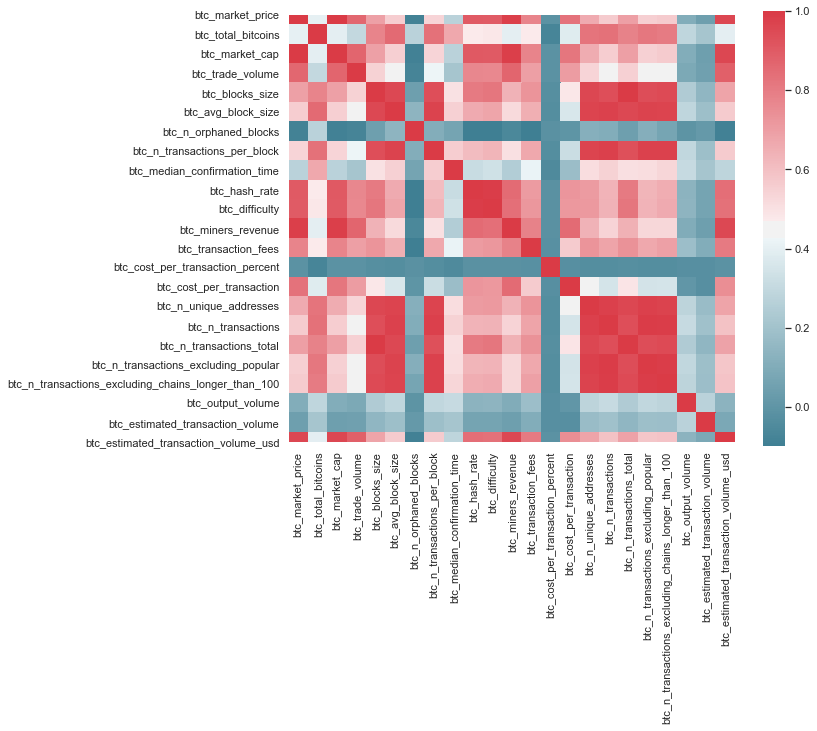

In [31]:
f, ax = plt.subplots(figsize=(10, 8))
corr = bit_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

- The red regions highlight those variables which are highly co-related.
- See the scatter plots of these corelated variables below:

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


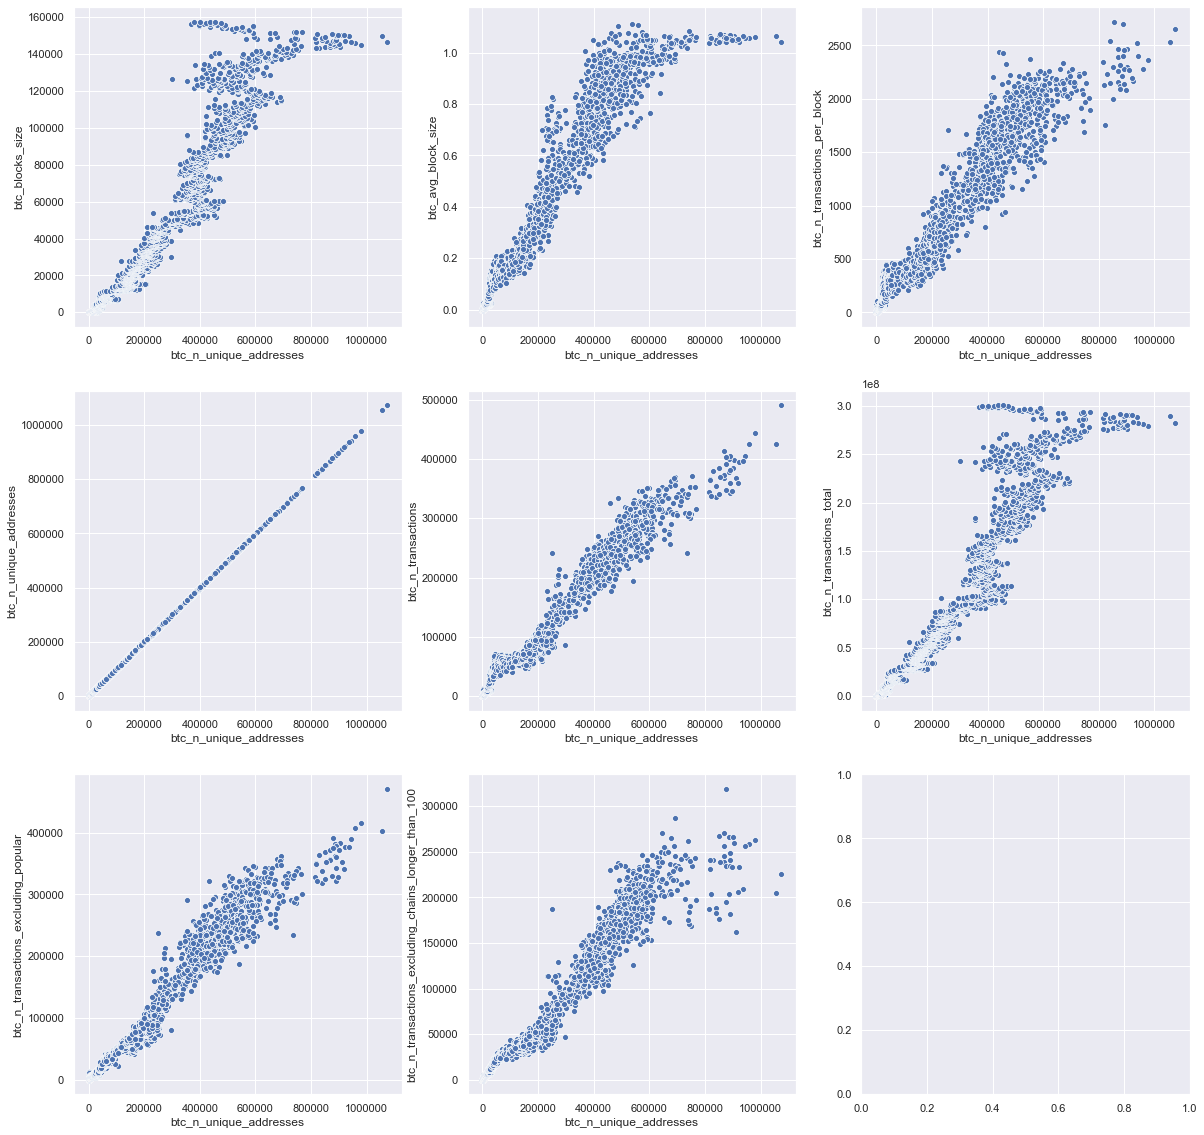

In [51]:
y_axis = ["btc_blocks_size","btc_avg_block_size","btc_n_transactions_per_block","btc_n_unique_addresses","btc_n_transactions","btc_n_transactions_total","btc_n_transactions_excluding_popular","btc_n_transactions_excluding_chains_longer_than_100"]
x_axis = "btc_n_unique_addresses"

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
for i, y_cor in enumerate(y_axis):
    sns.scatterplot(x = bit_df[x_axis], y = bit_df[y_cor], ax=axes[i//3,i%3])
fig.show()

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


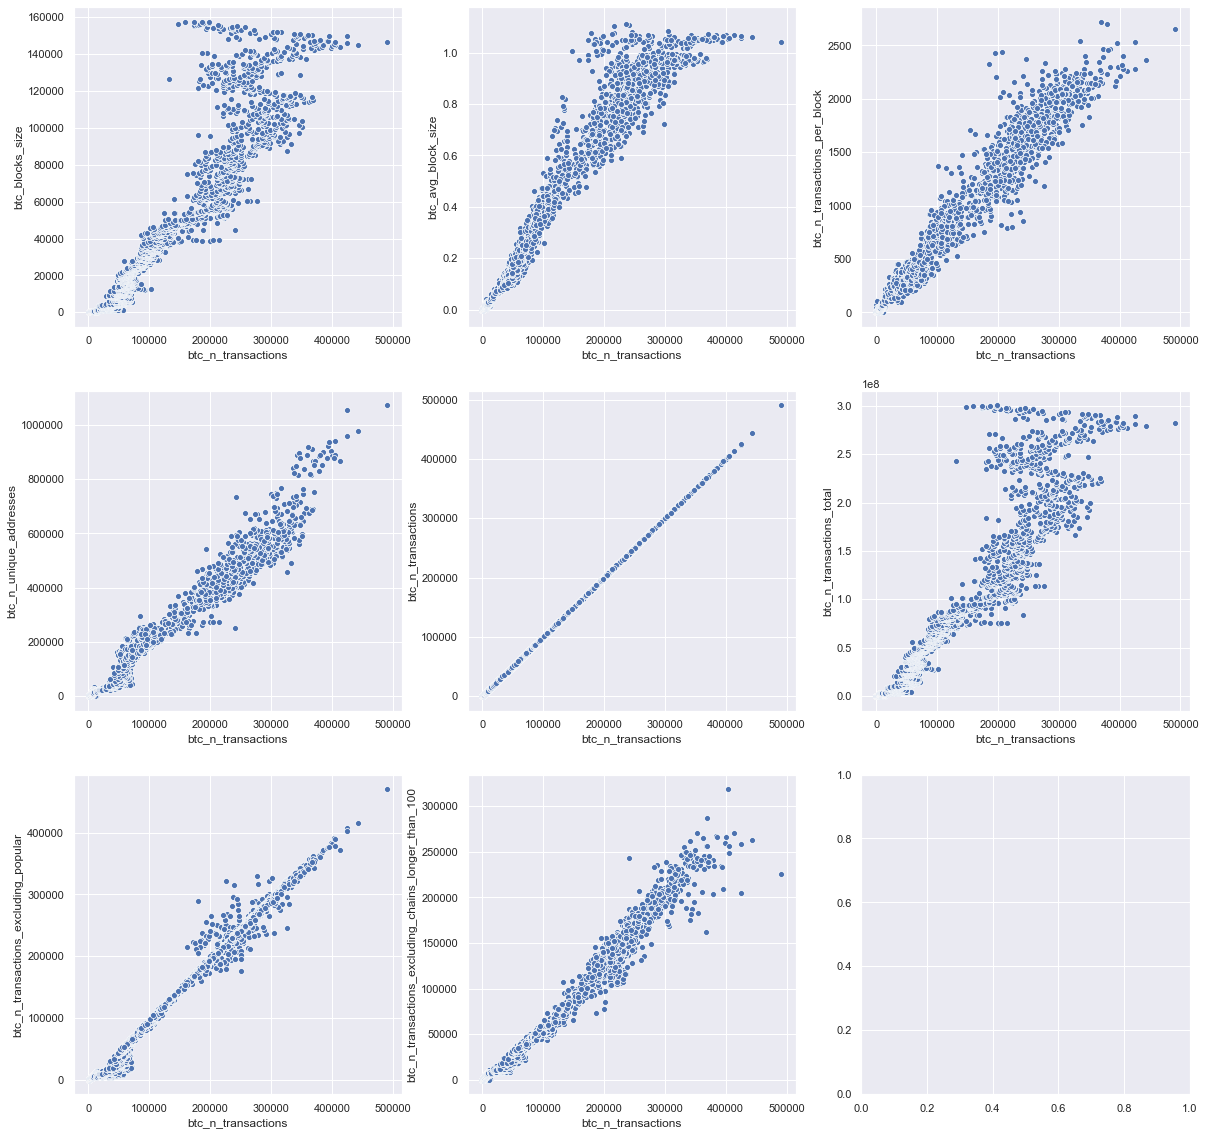

In [52]:
x_axis = "btc_n_transactions"

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
for i, y_cor in enumerate(y_axis):
    sns.scatterplot(x = bit_df[x_axis], y = bit_df[y_cor], ax=axes[i//3,i%3])
fig.show()

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


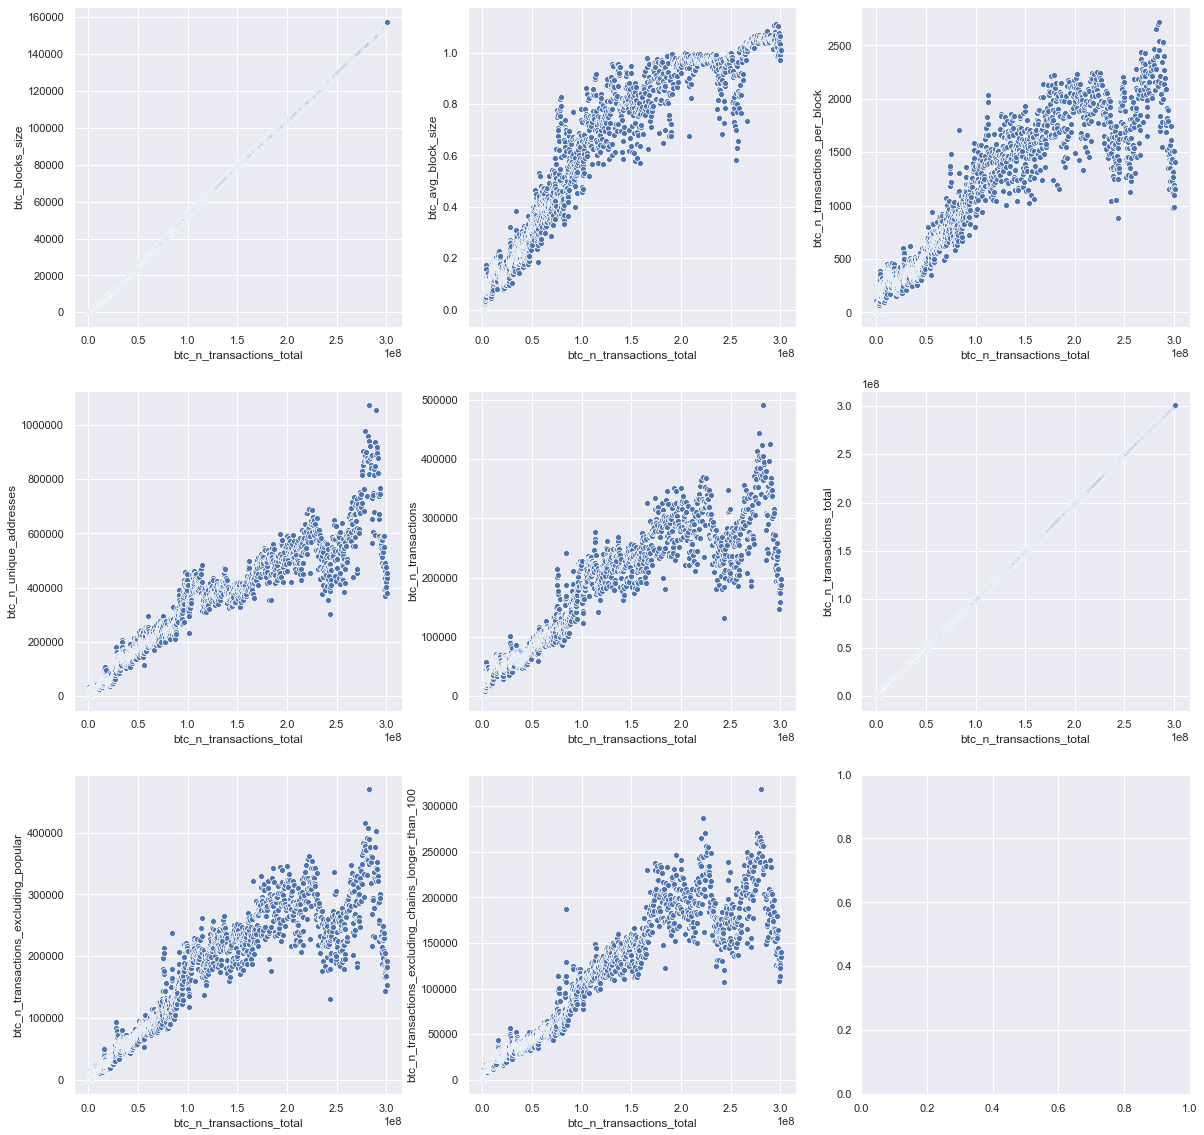

In [55]:
x_axis = "btc_n_transactions_total"

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
for i, y_cor in enumerate(y_axis):
    sns.scatterplot(x = bit_df[x_axis], y = bit_df[y_cor], ax=axes[i//3,i%3])
fig.show()

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


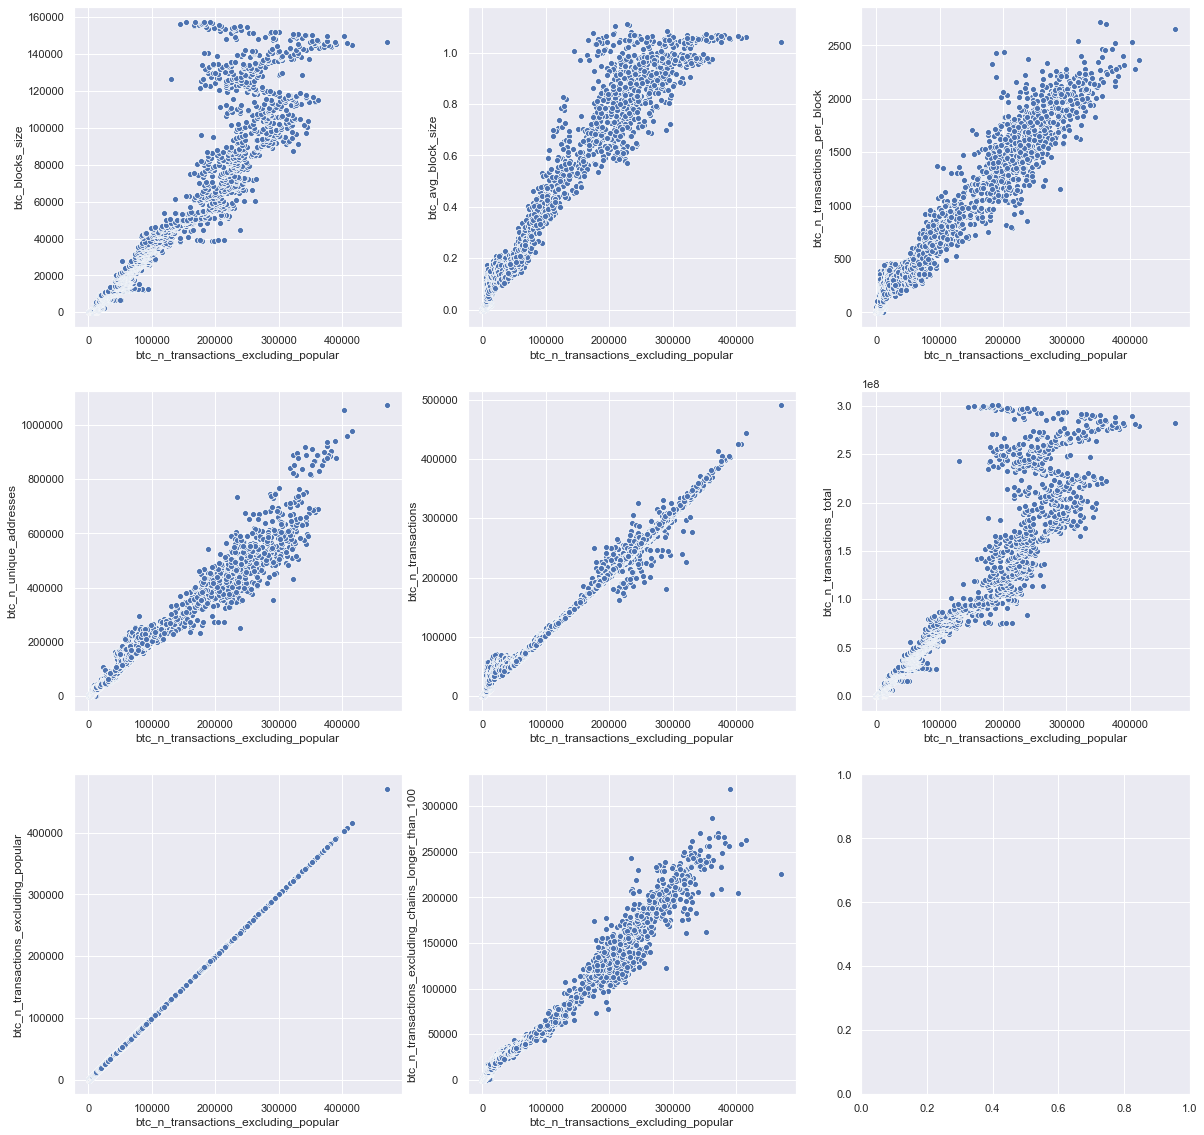

In [56]:
x_axis = "btc_n_transactions_excluding_popular"

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
for i, y_cor in enumerate(y_axis):
    sns.scatterplot(x = bit_df[x_axis], y = bit_df[y_cor], ax=axes[i//3,i%3])
fig.show()

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


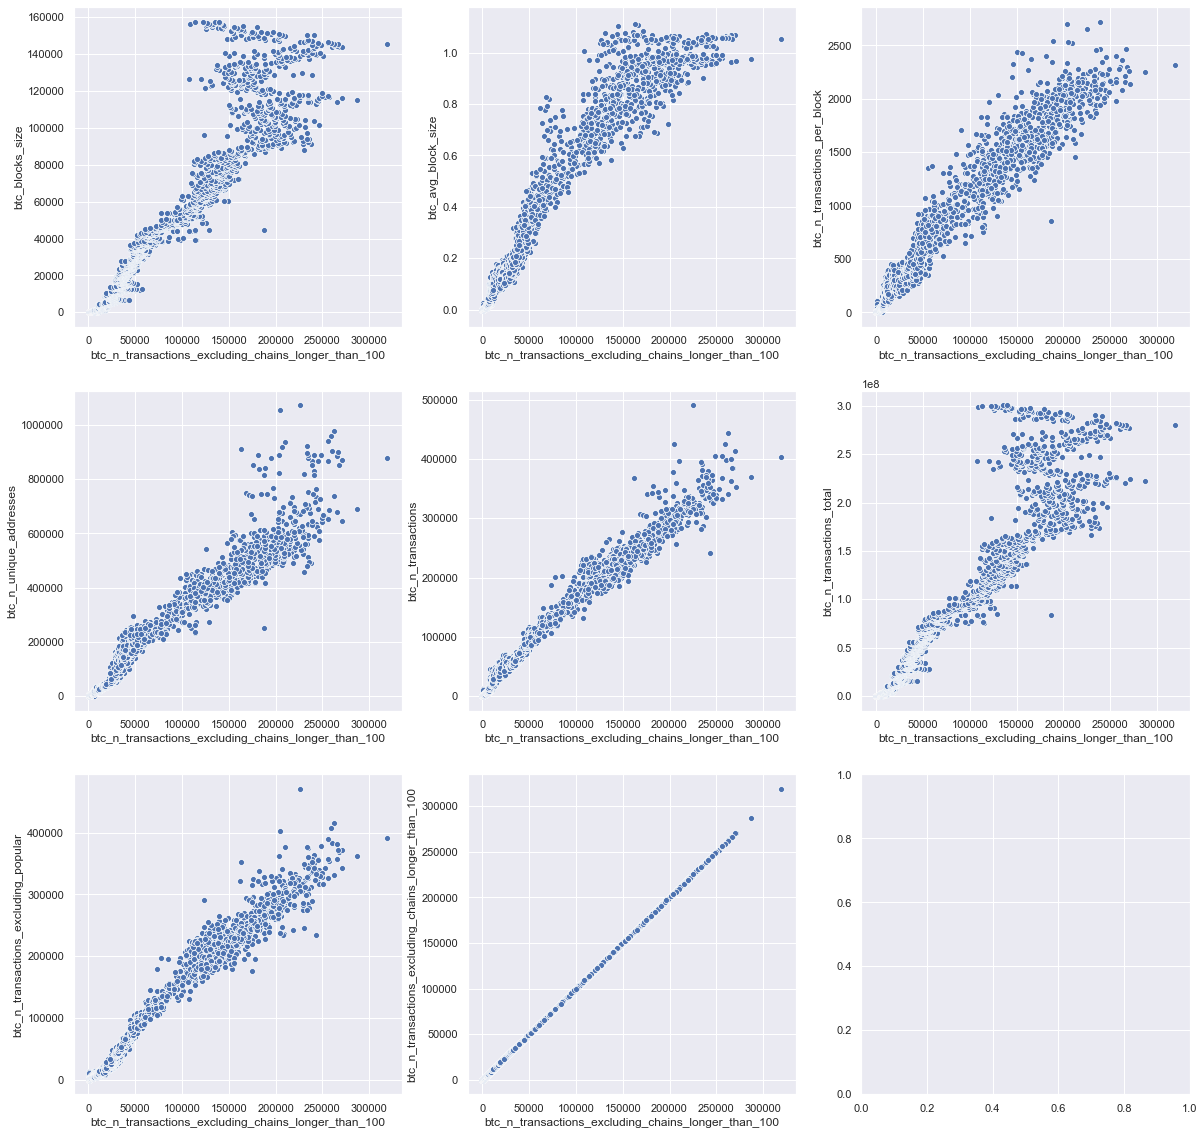

In [54]:
x_axis = "btc_n_transactions_excluding_chains_longer_than_100"

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
for i, y_cor in enumerate(y_axis):
    sns.scatterplot(x = bit_df[x_axis], y = bit_df[y_cor], ax=axes[i//3,i%3])
fig.show()

In [29]:
yr = bit_df["Date"].dt.year.astype(str)
len(yr)

2920

### Time series analysis

Each variable in the dataset has been plotted against time throught the years

In [ ]:
display(bit_df['Date'].min(), bit_df['Date'].max())

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


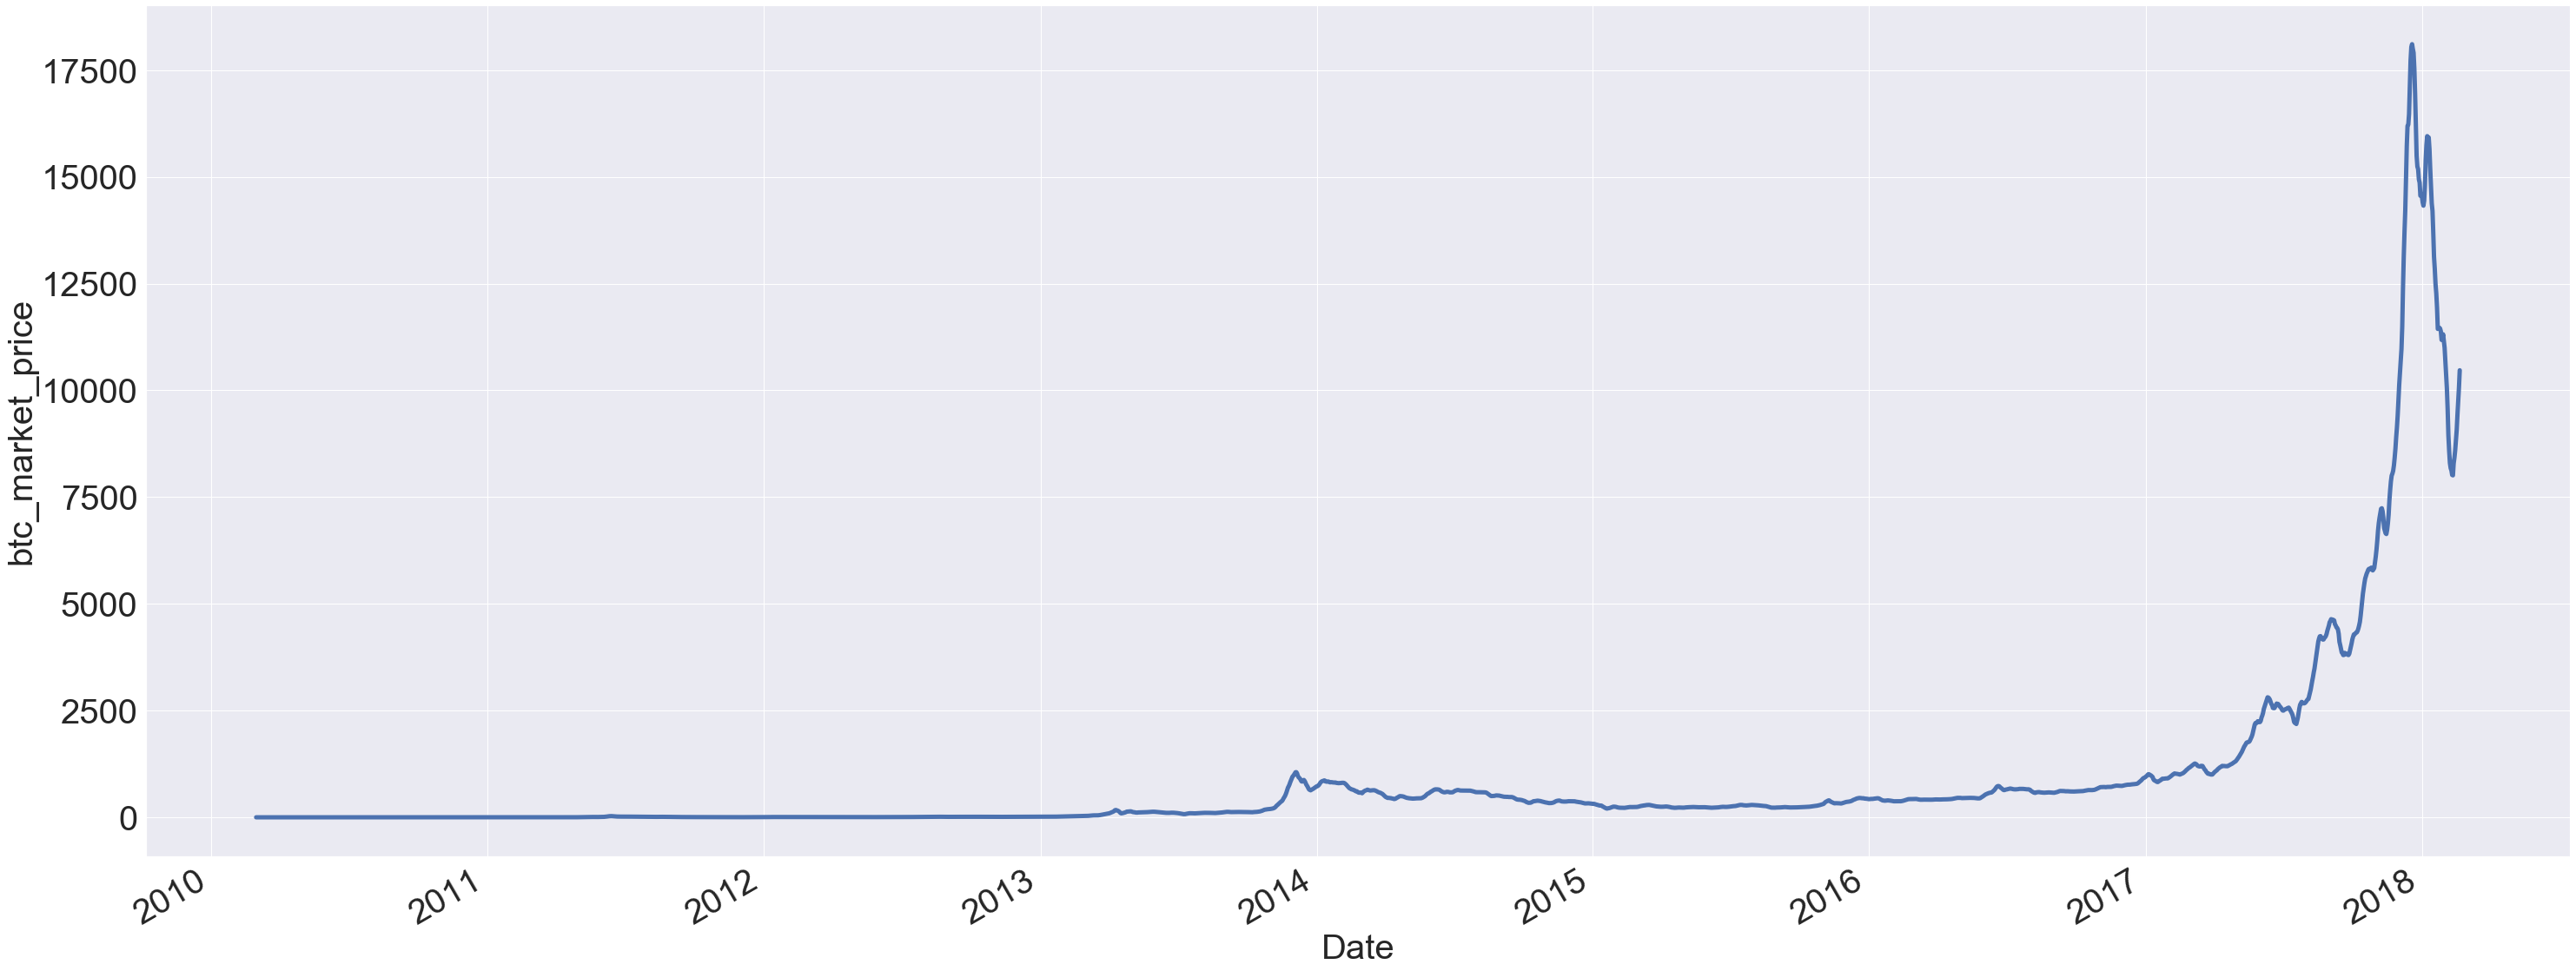

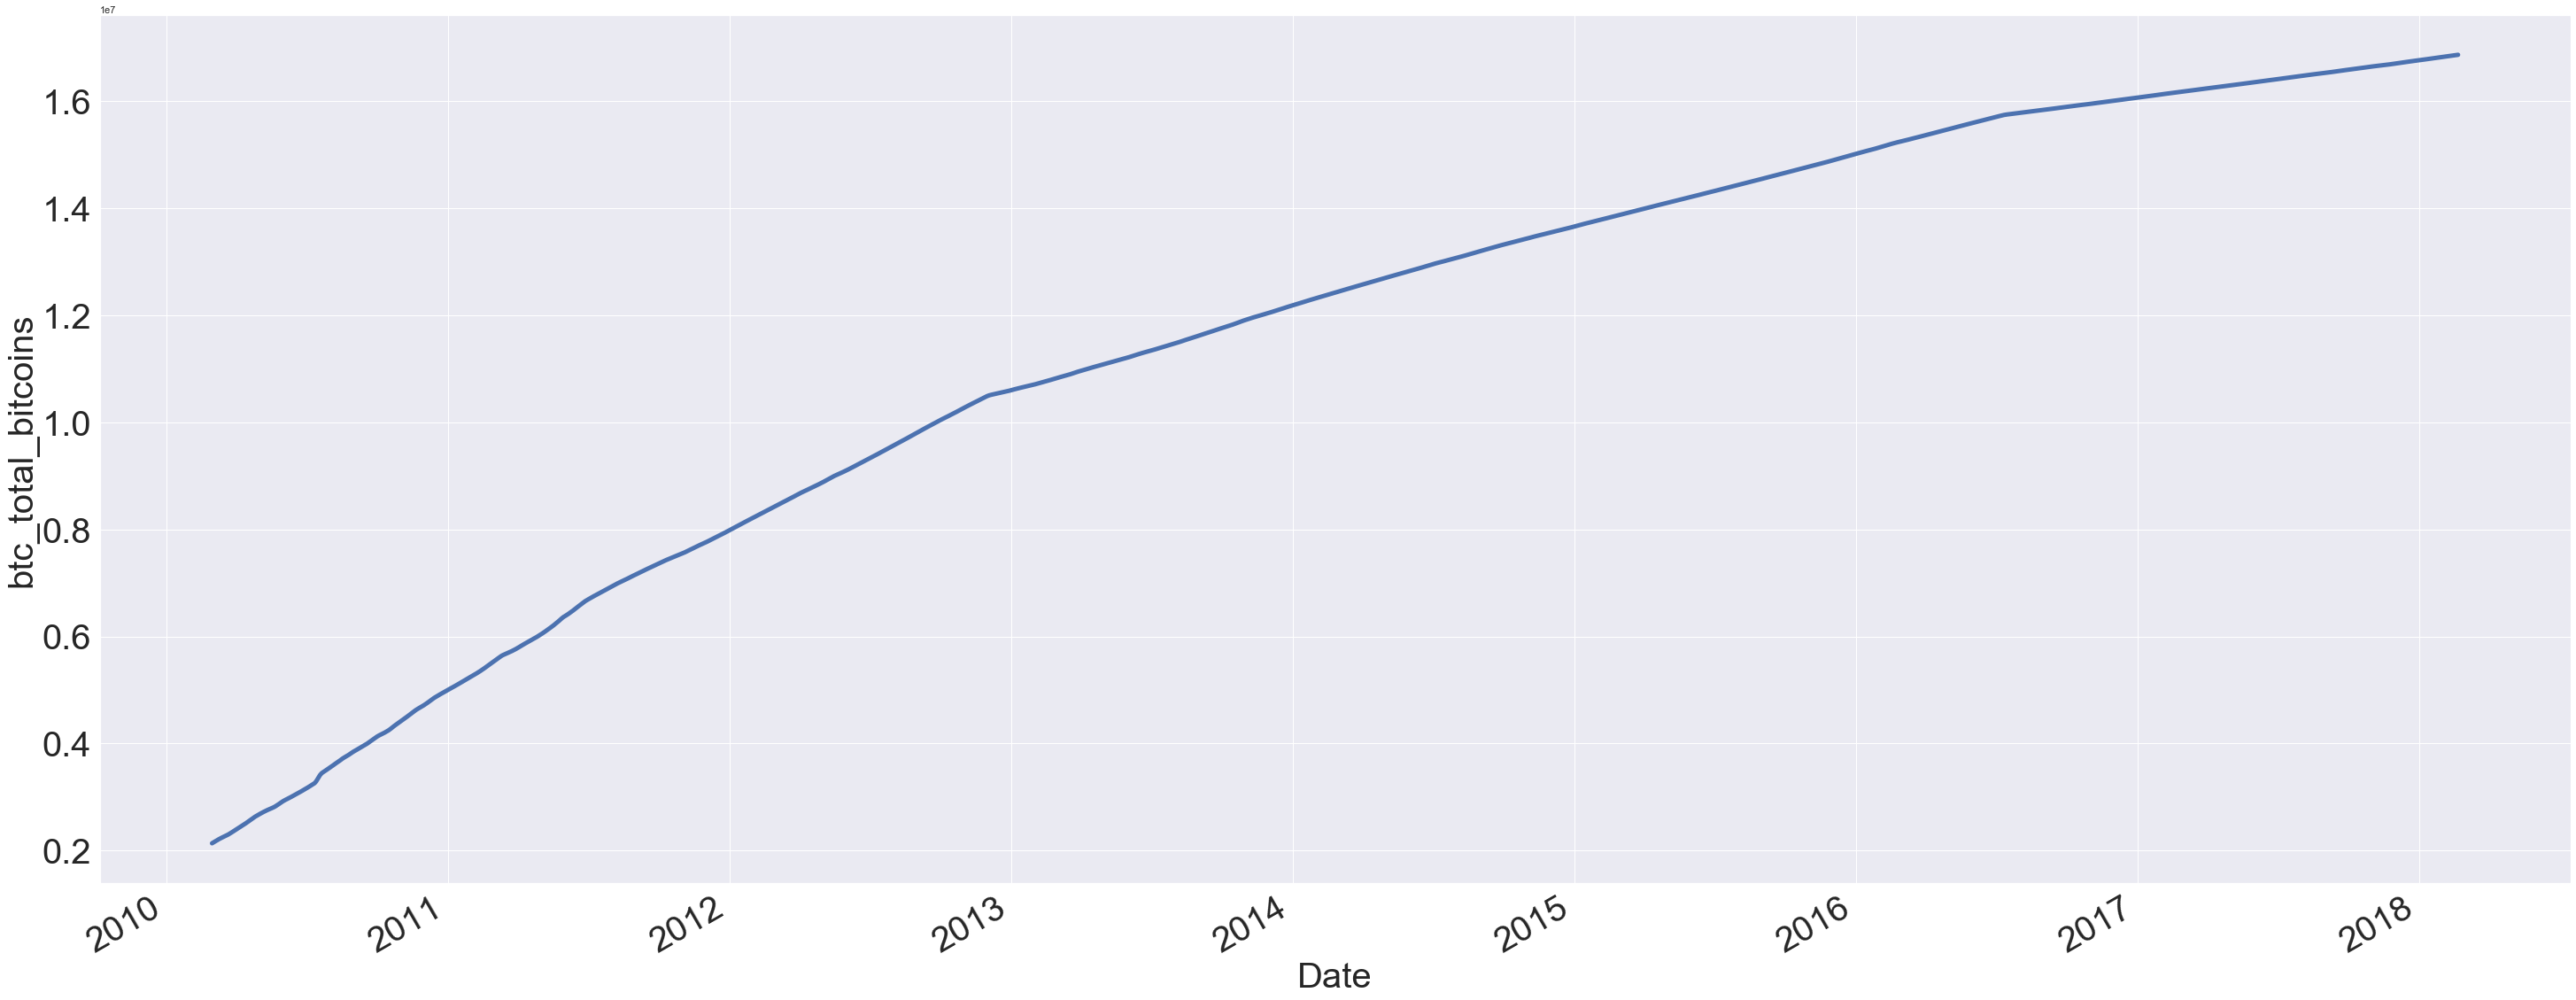

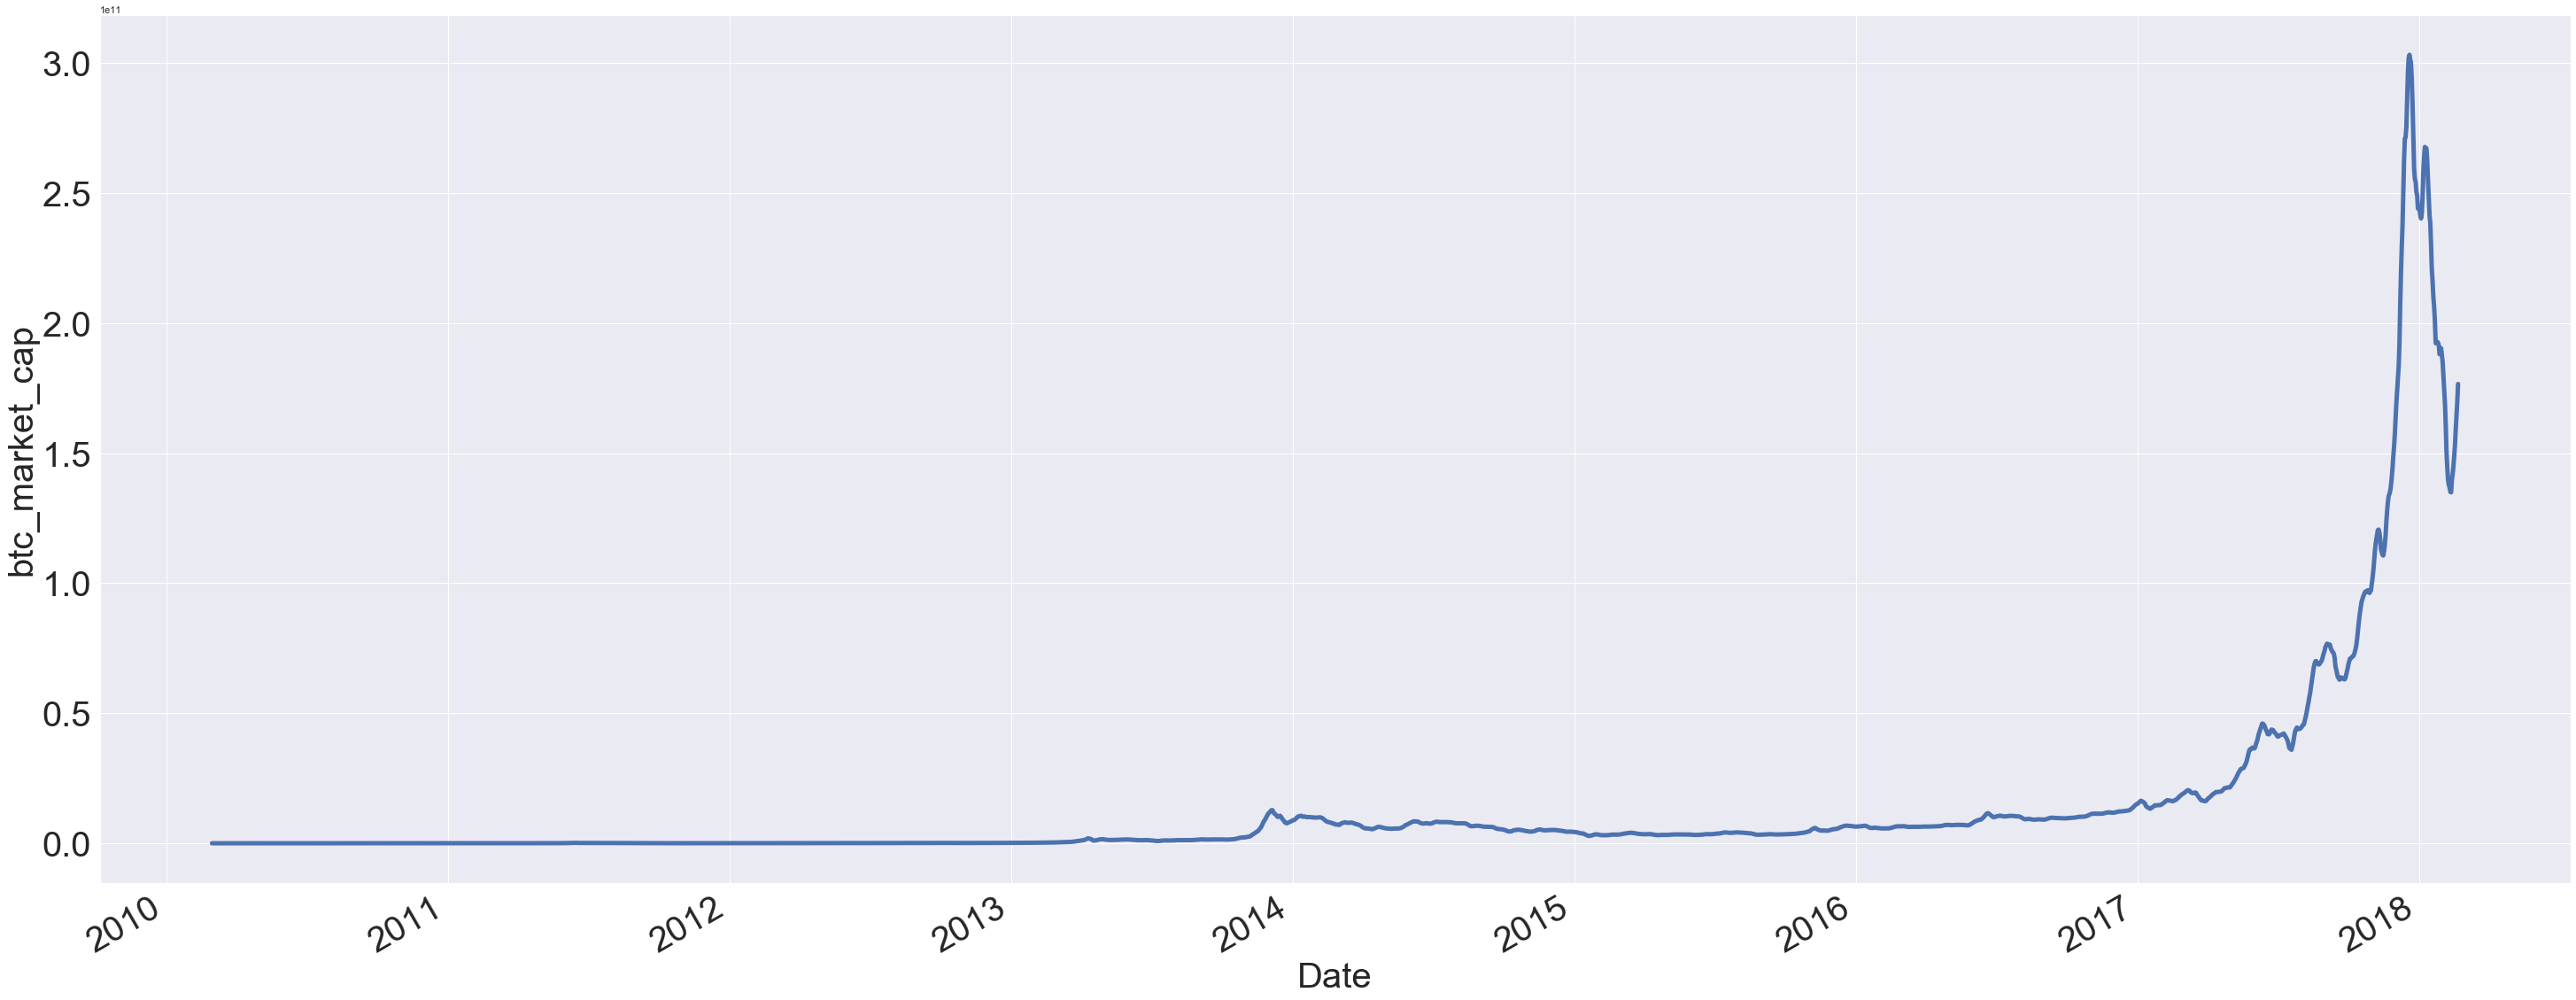

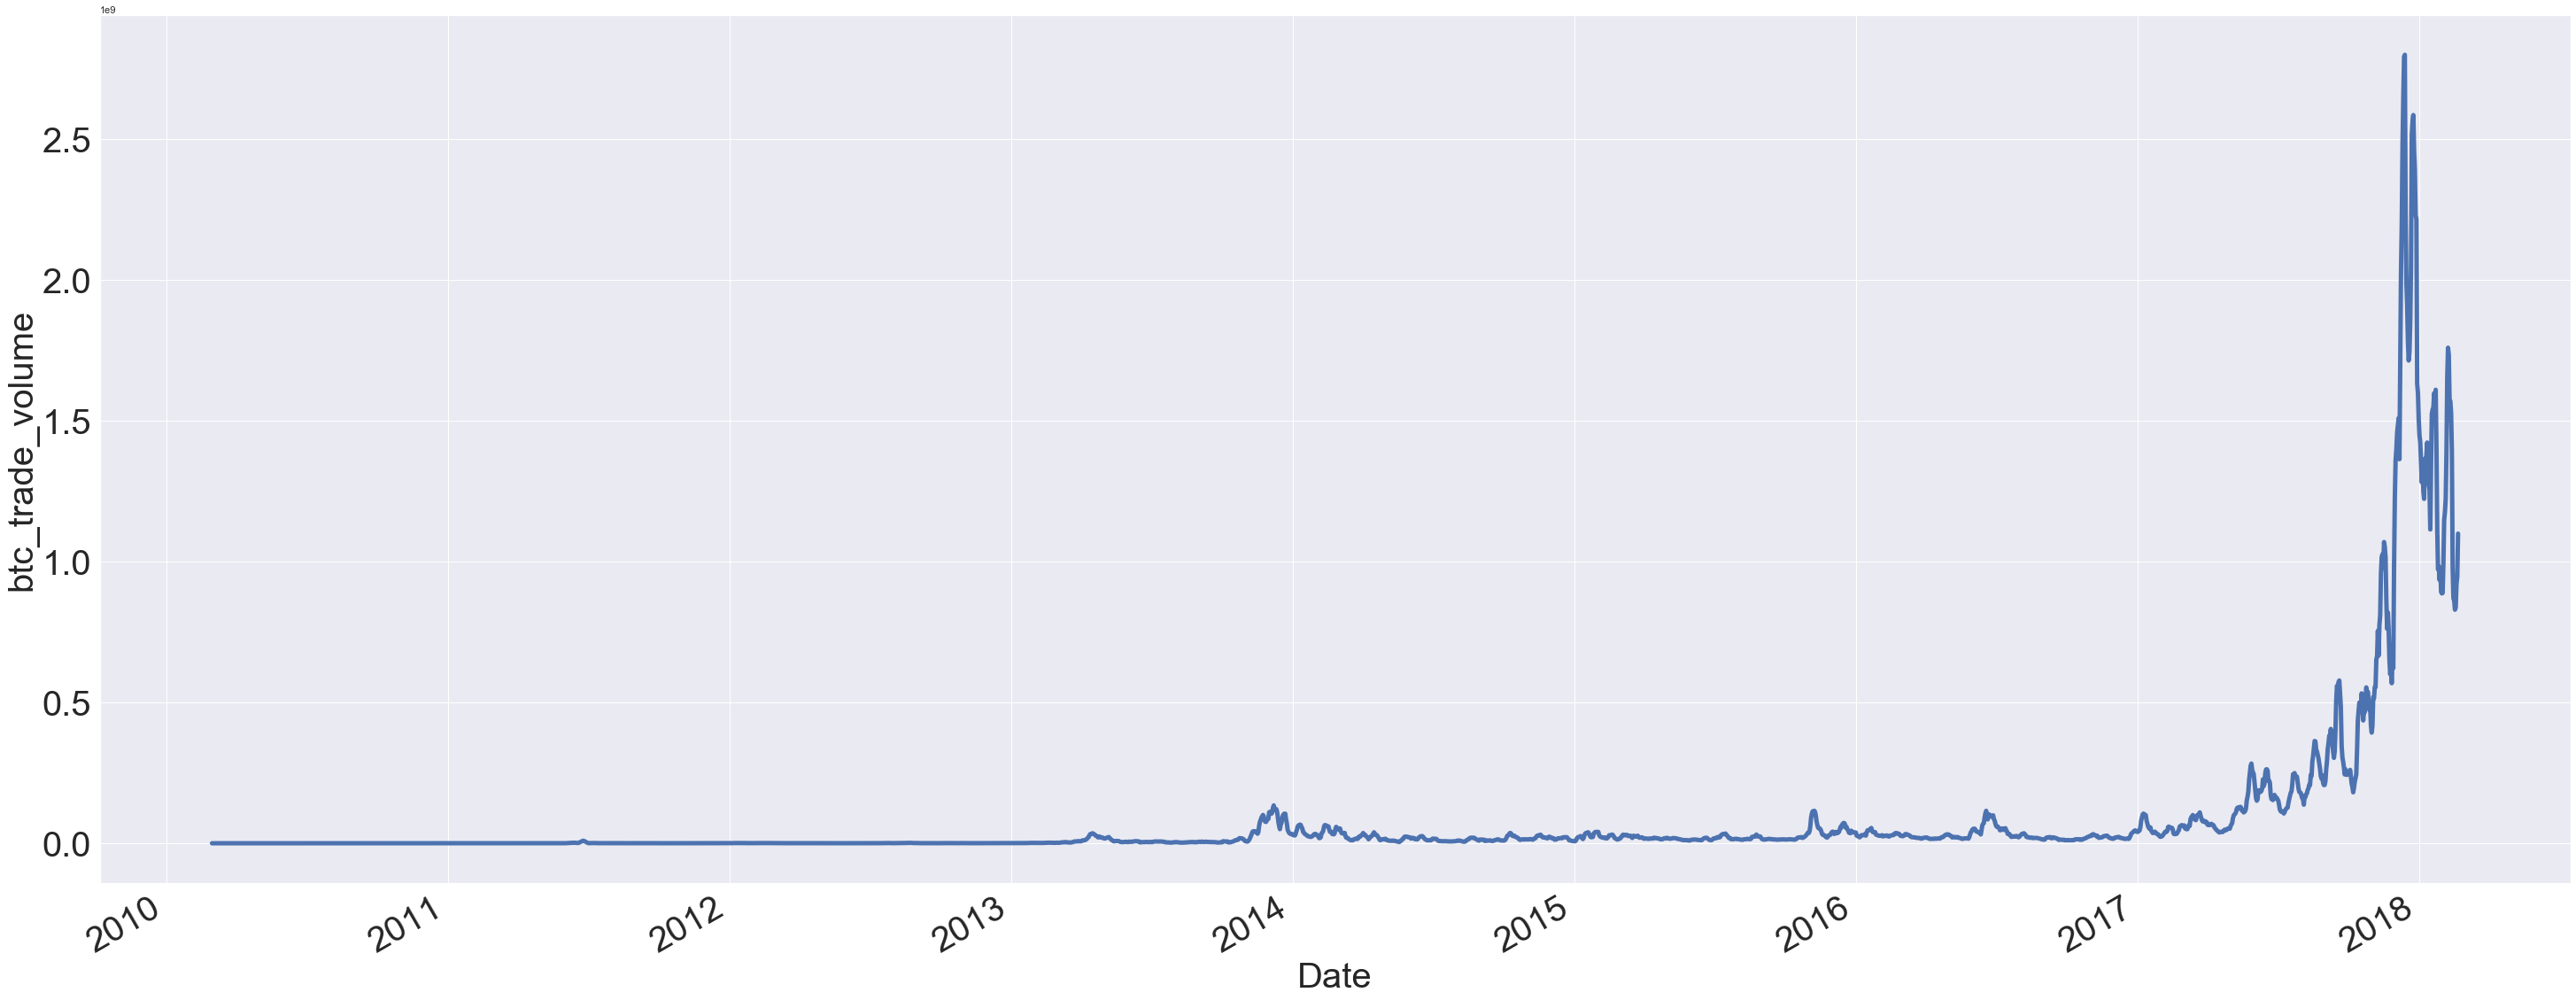

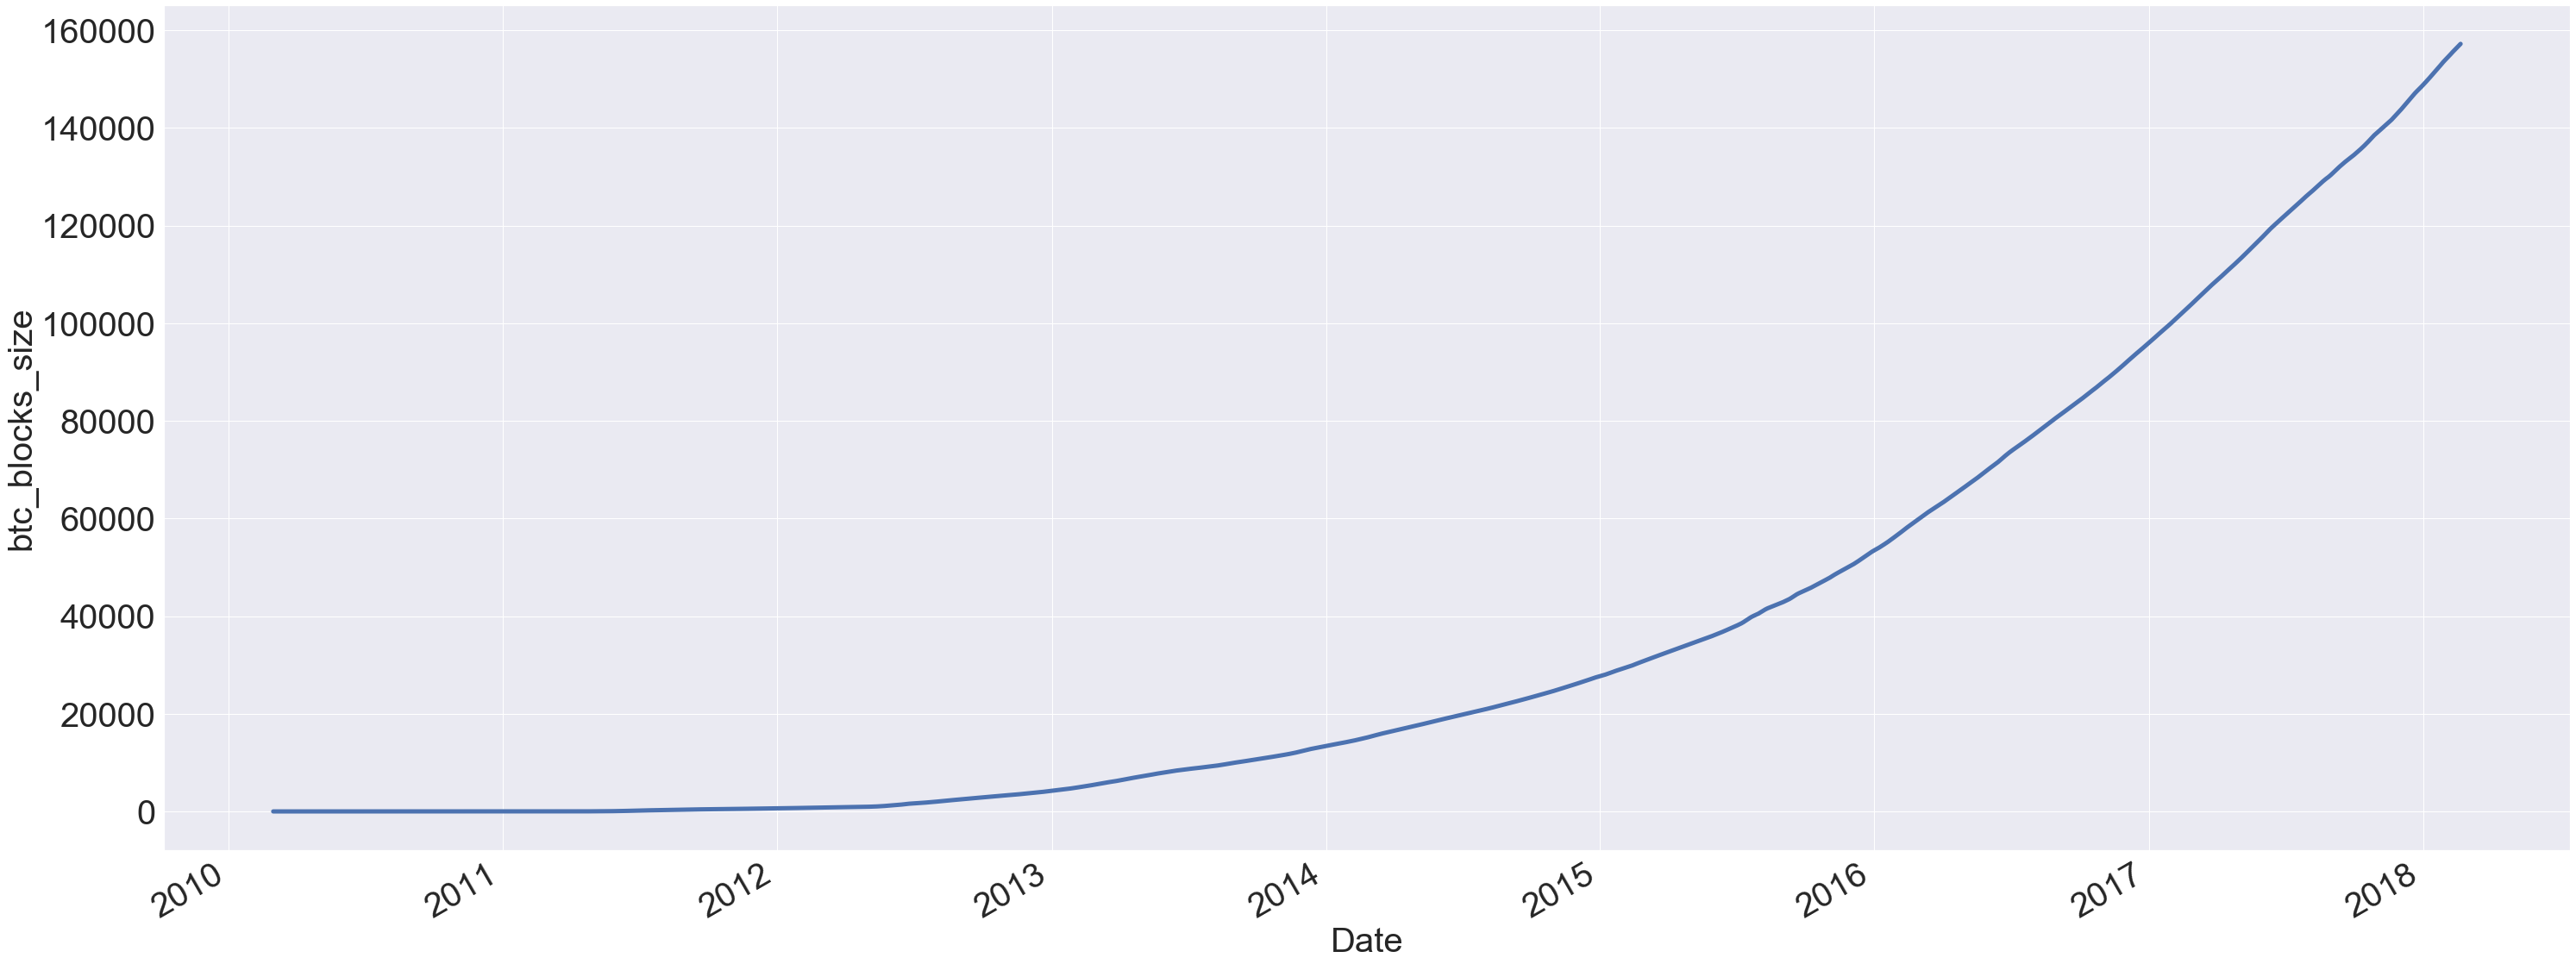

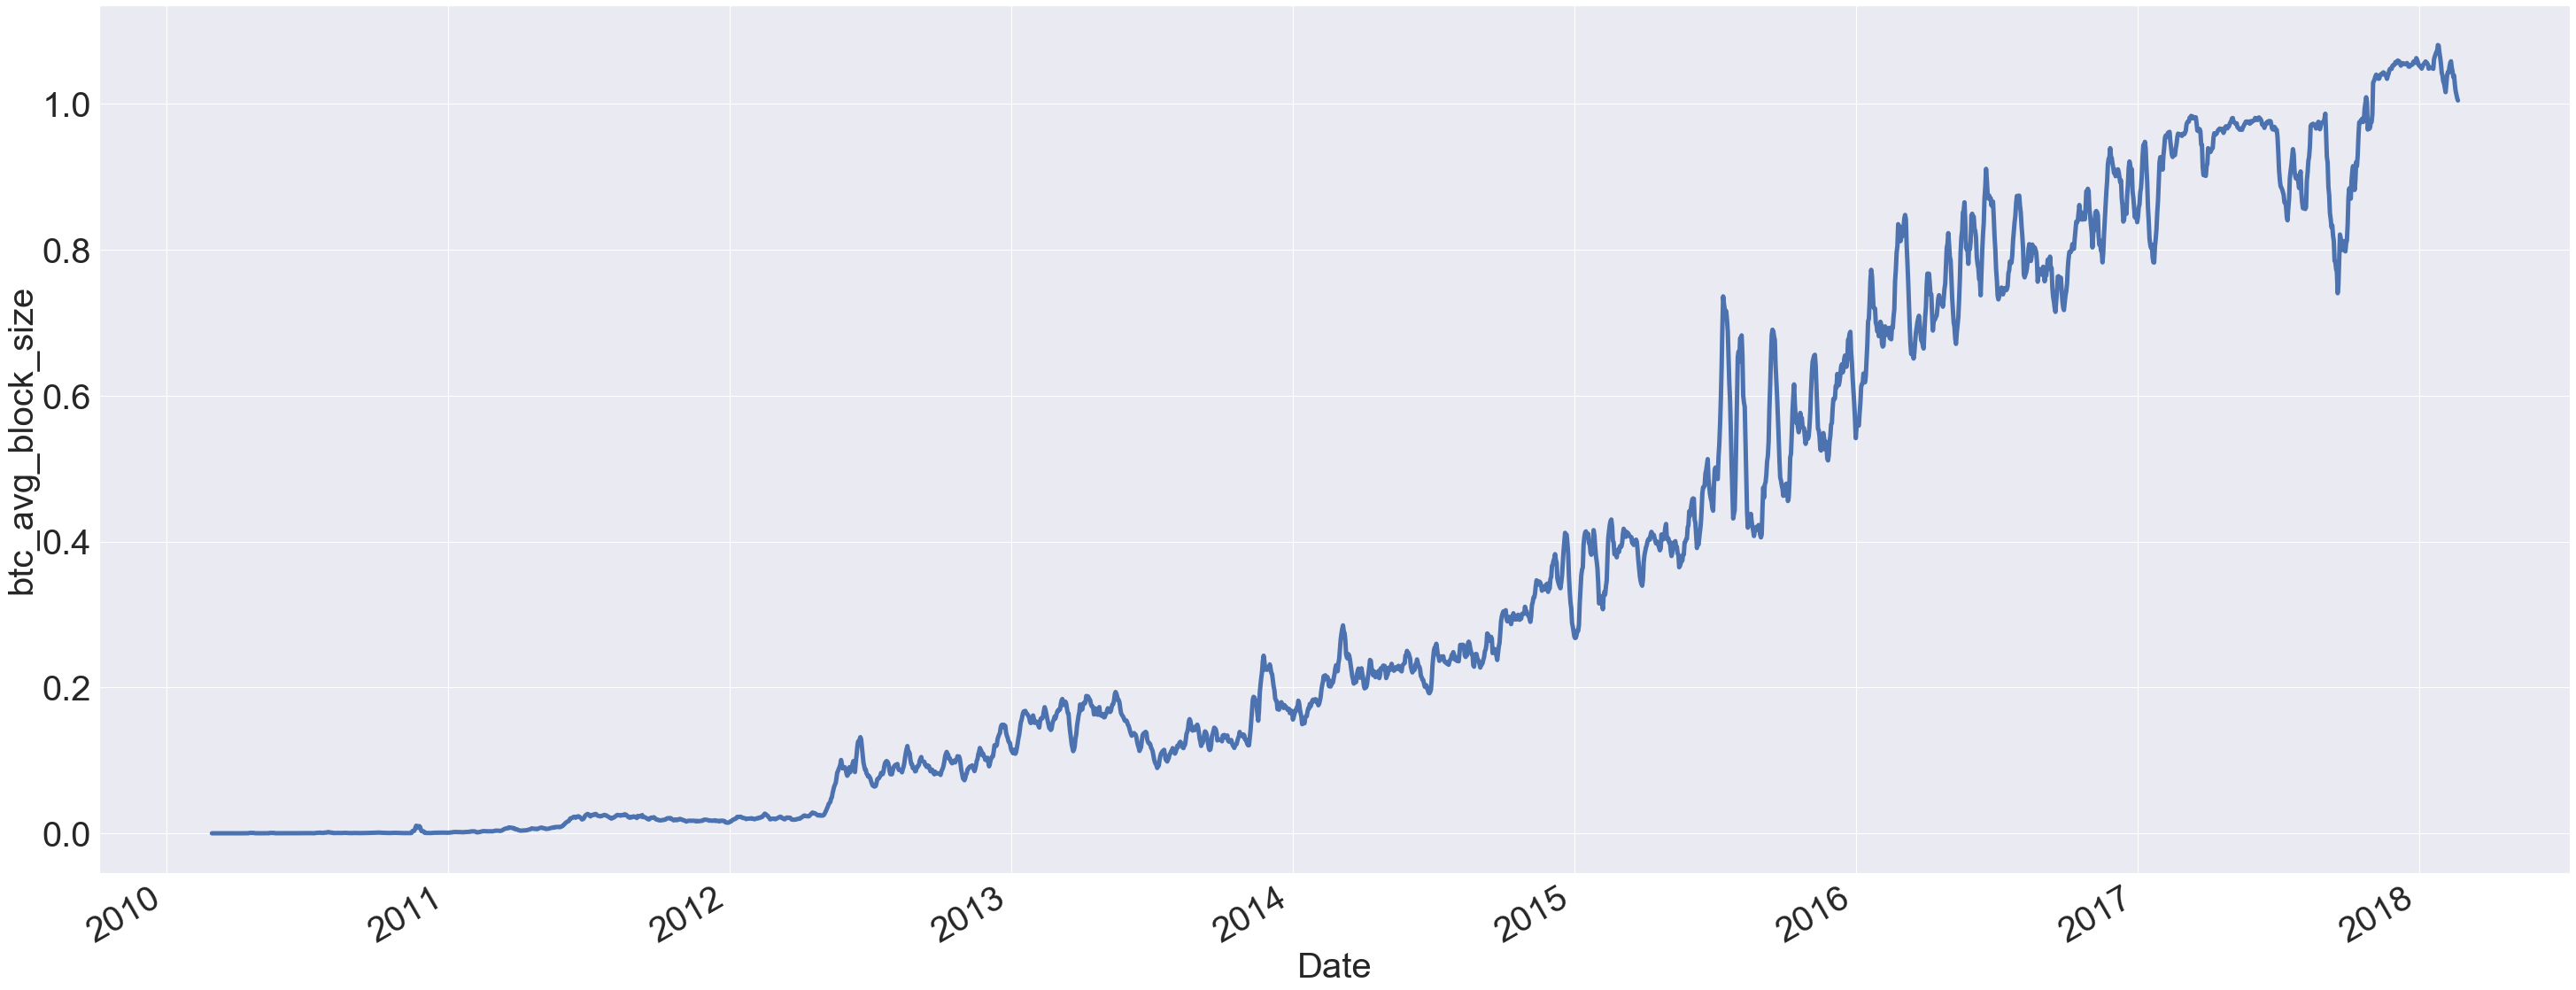

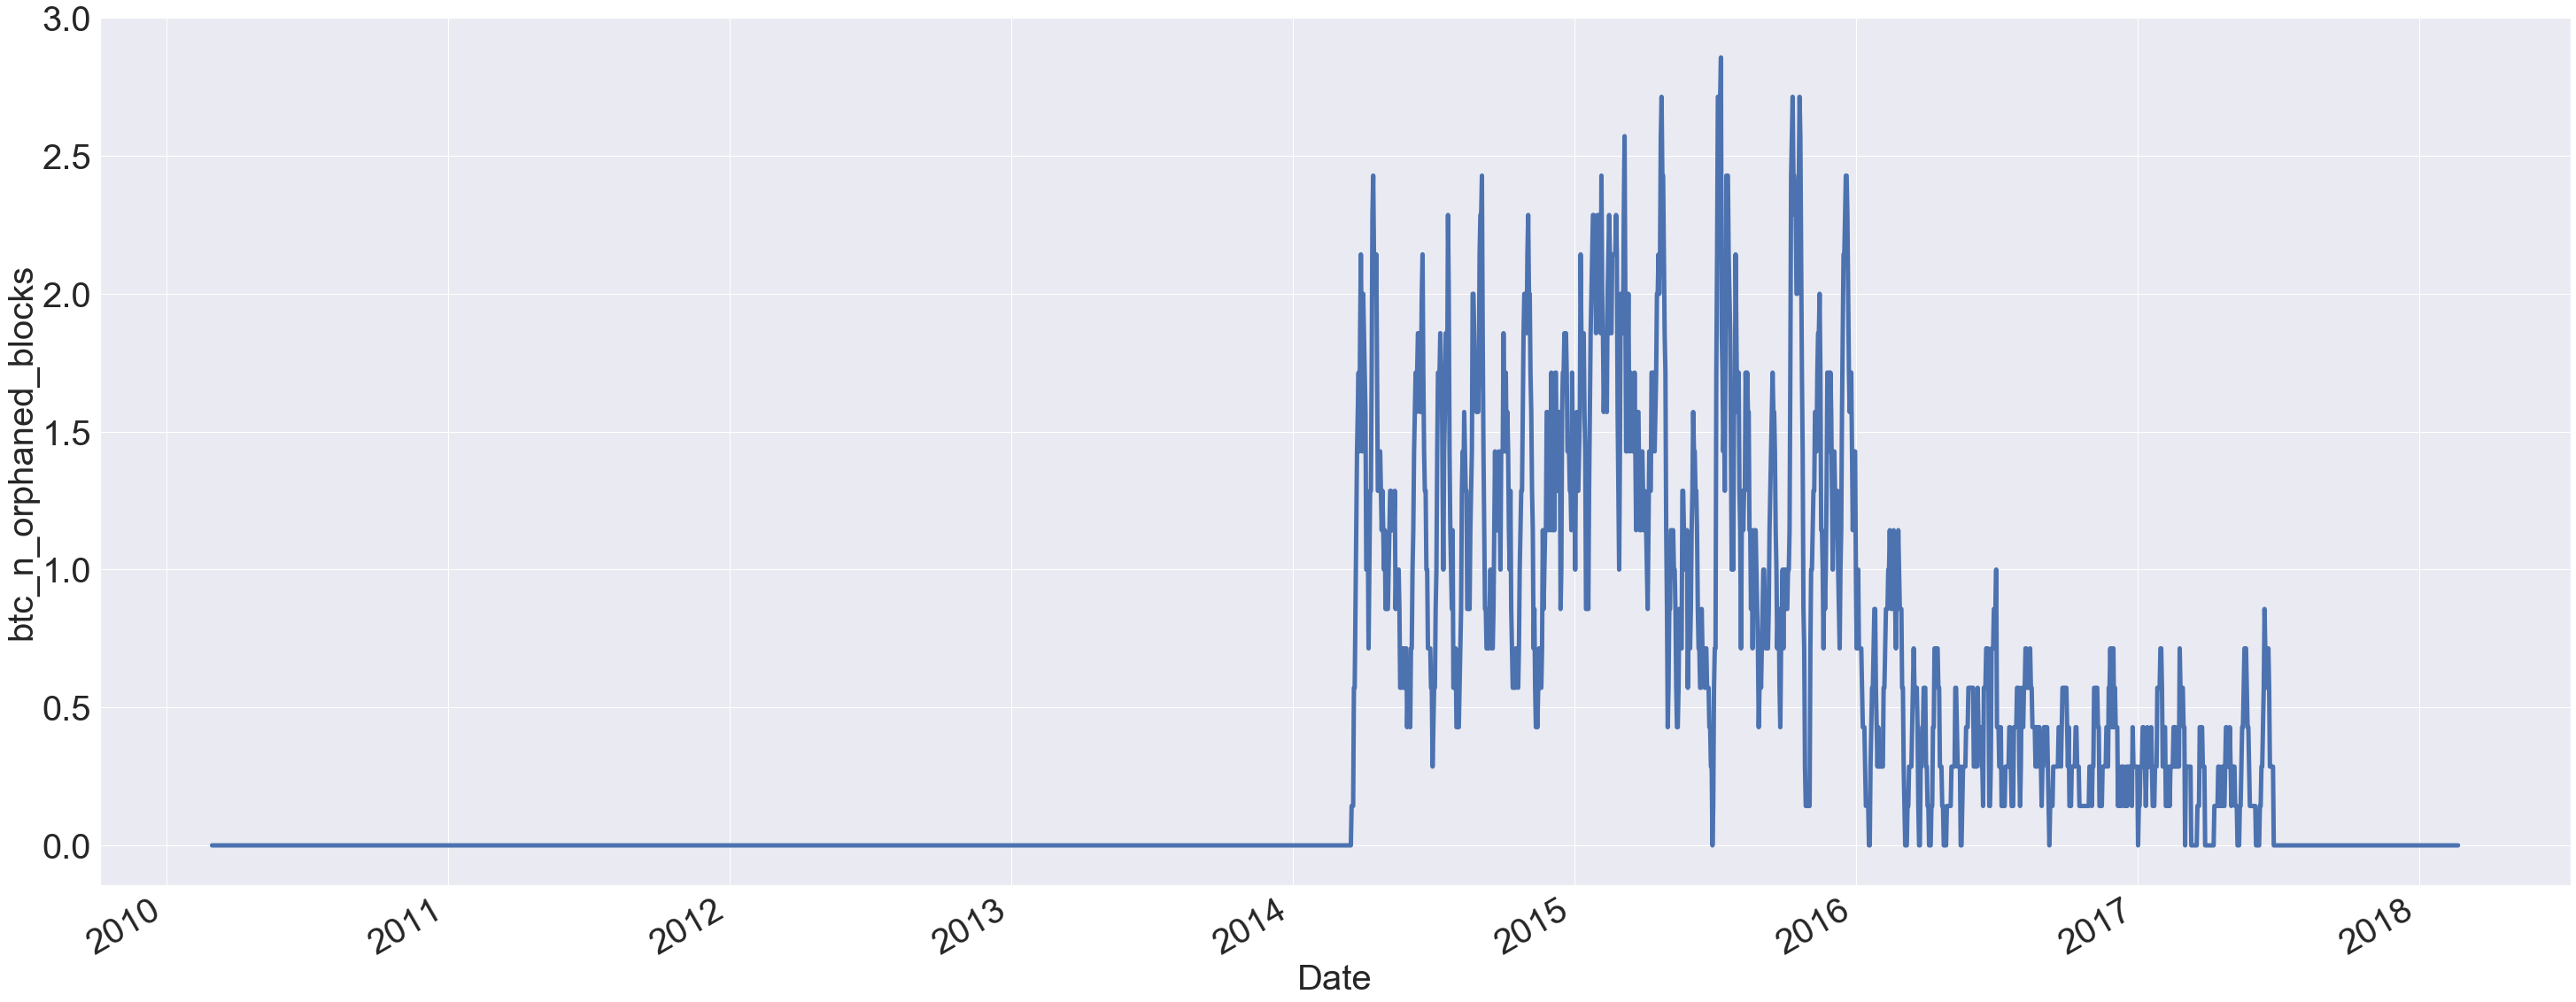

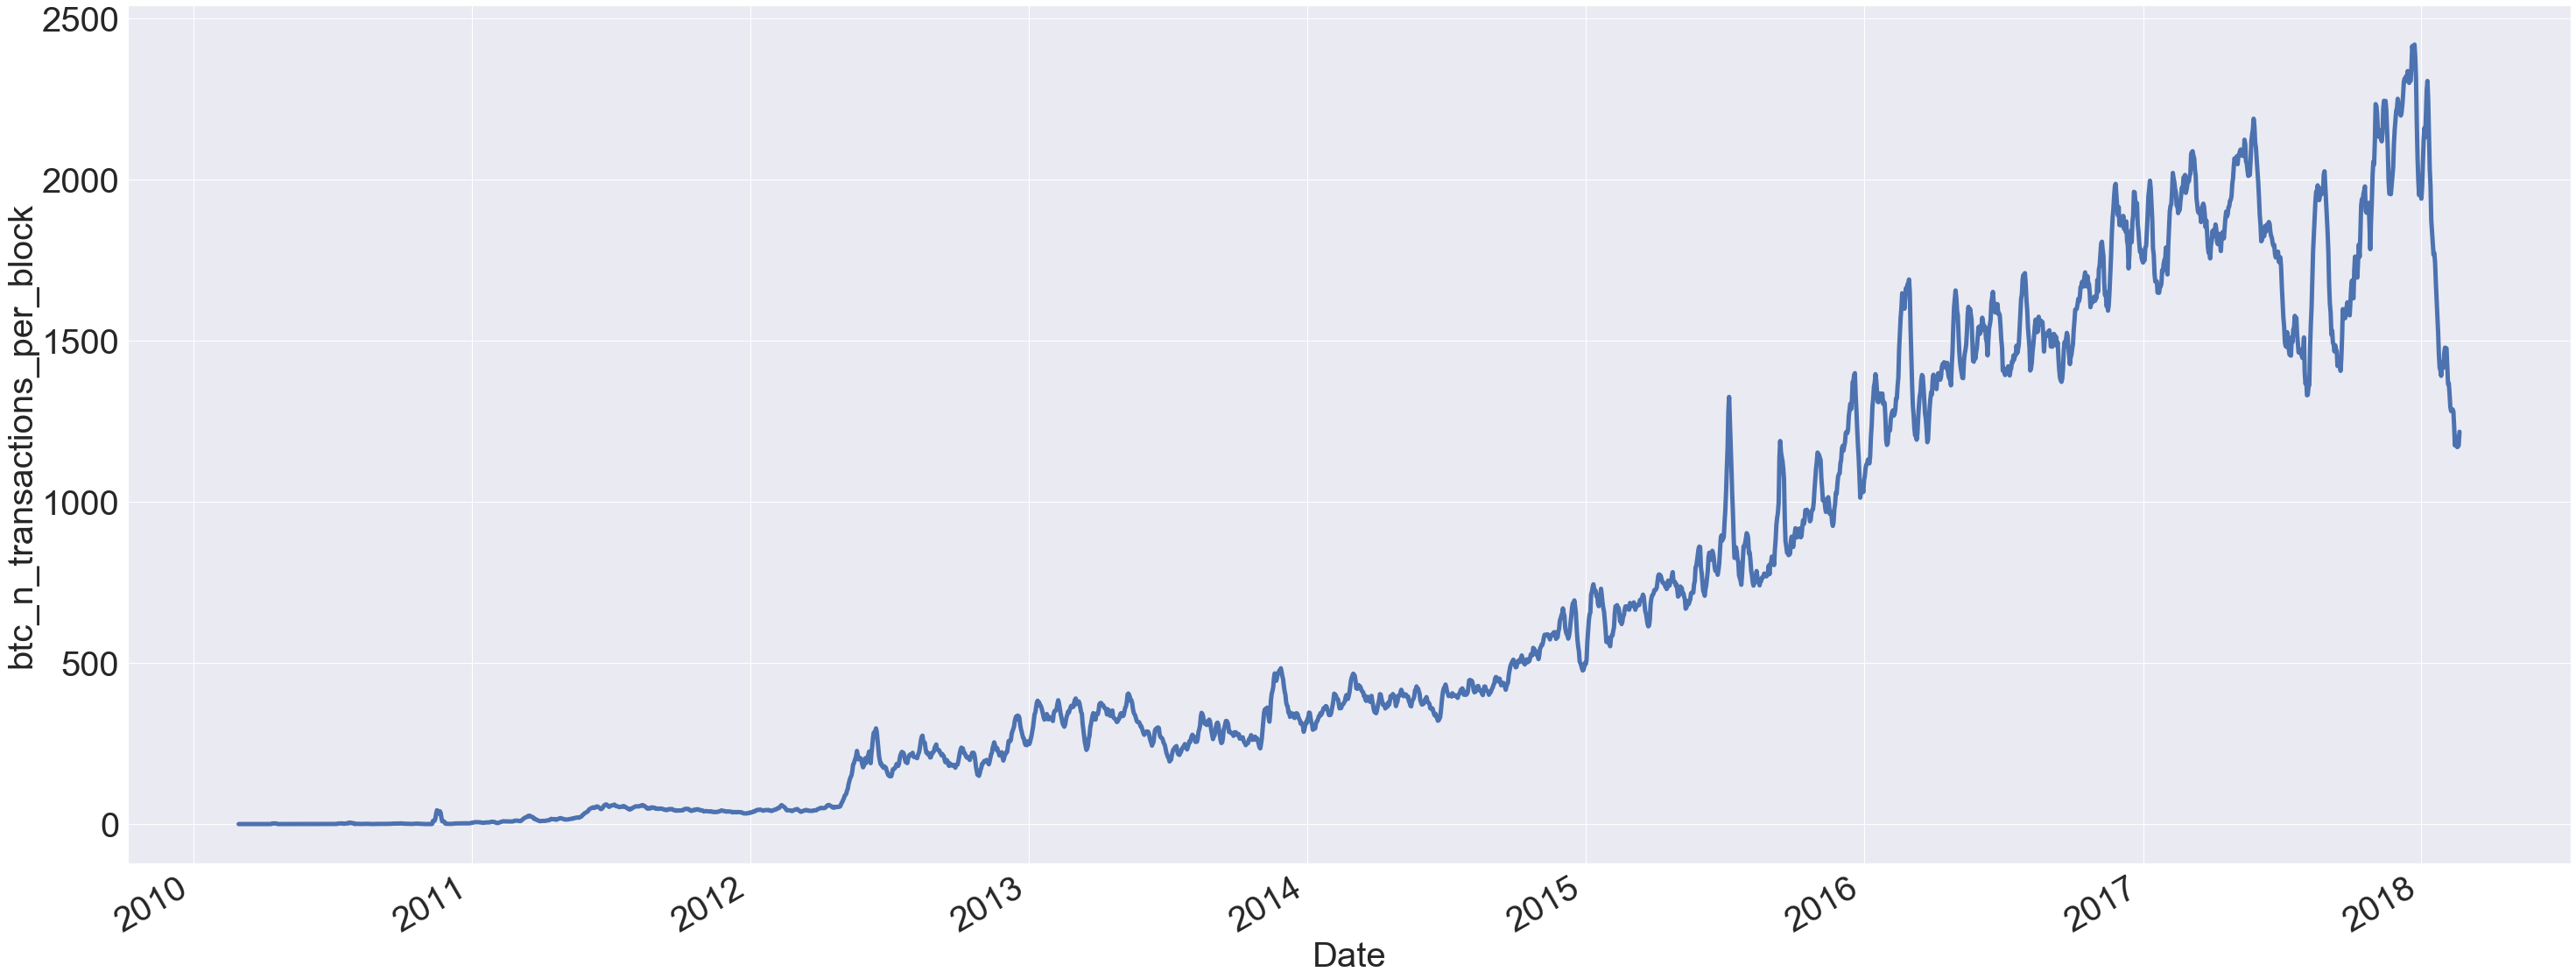

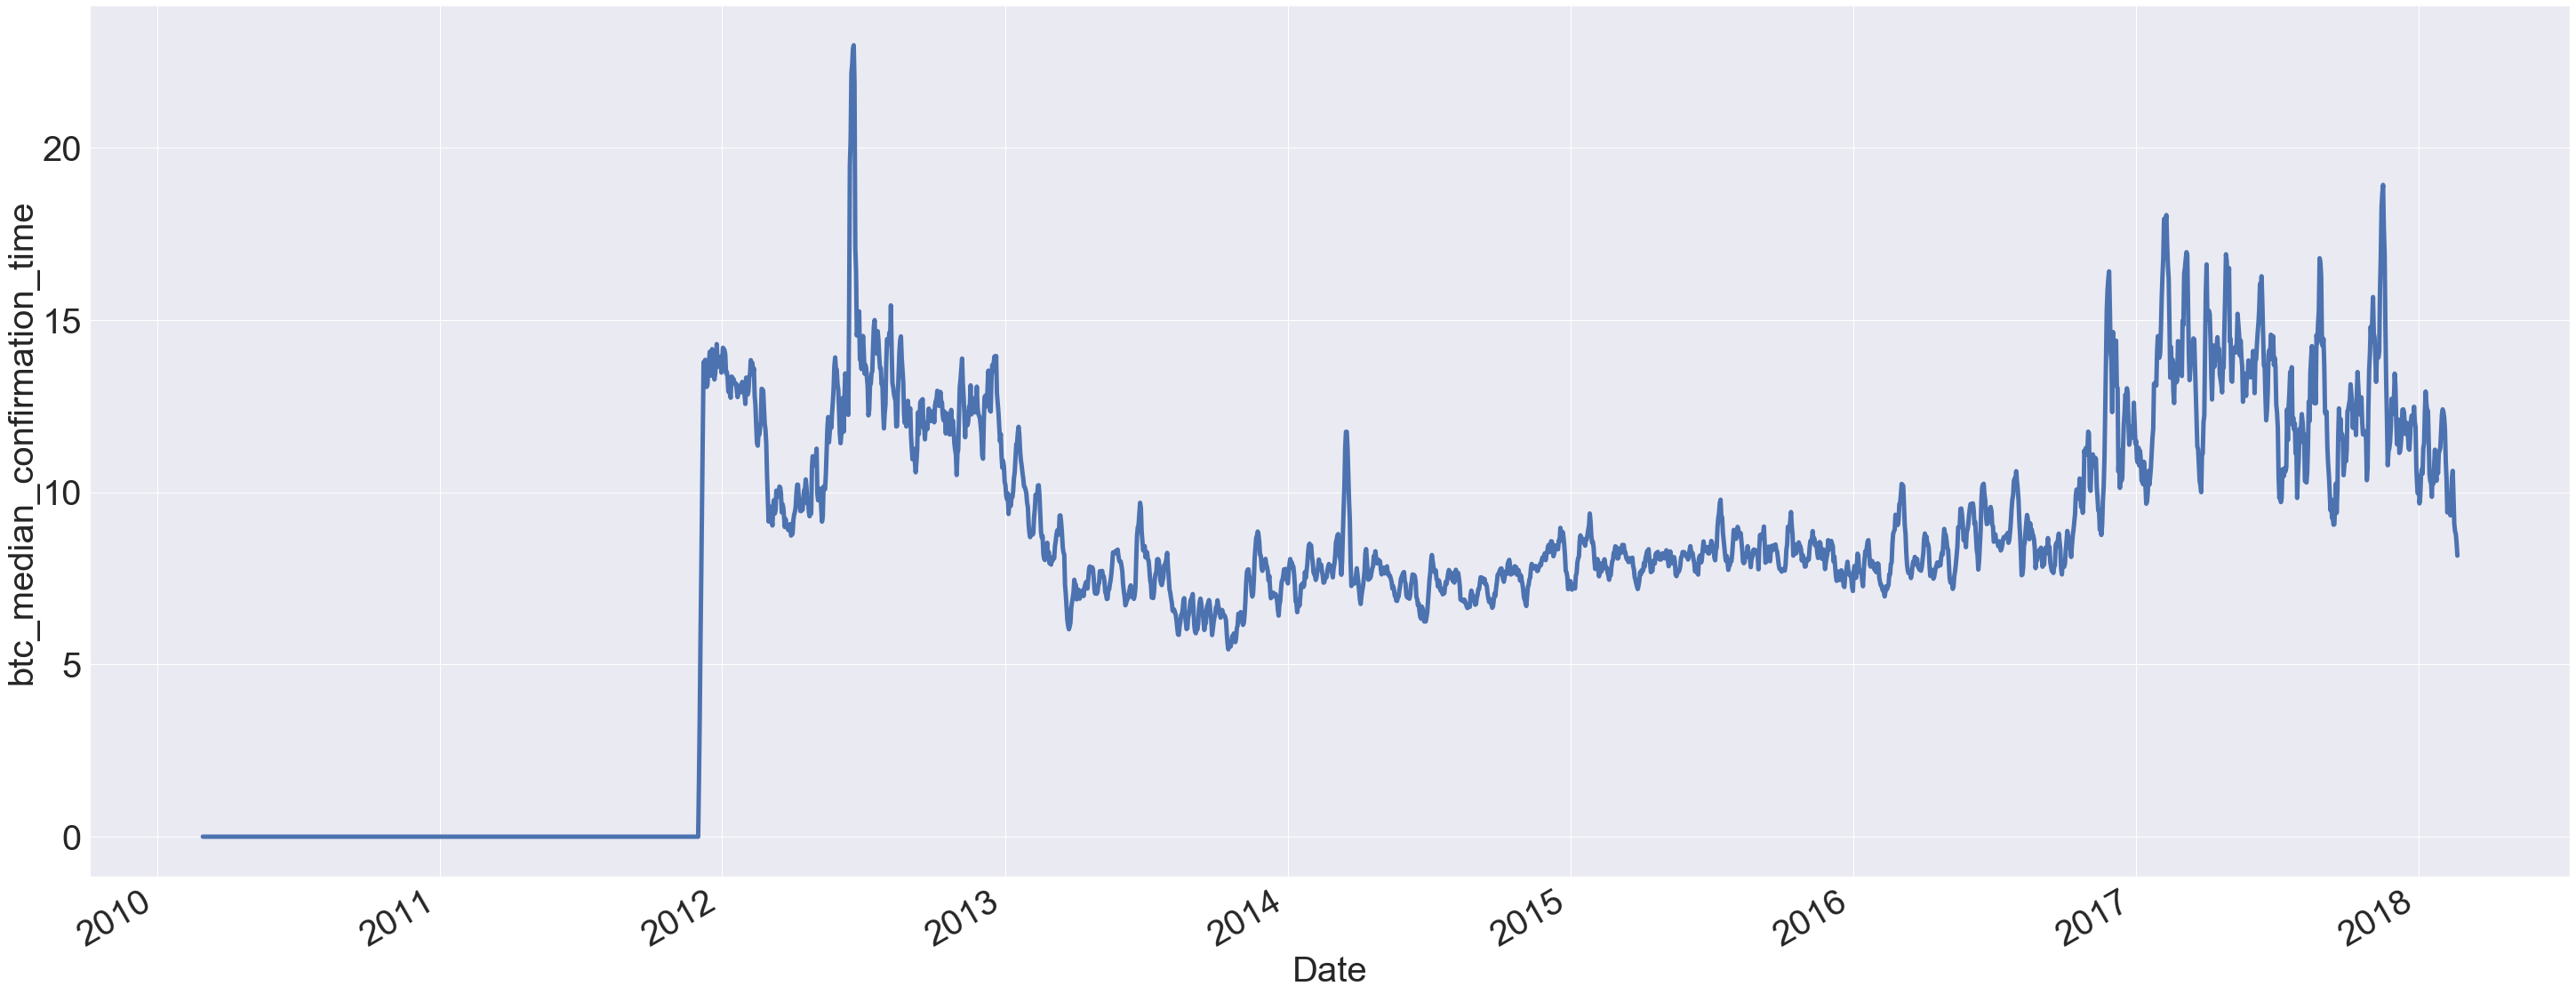

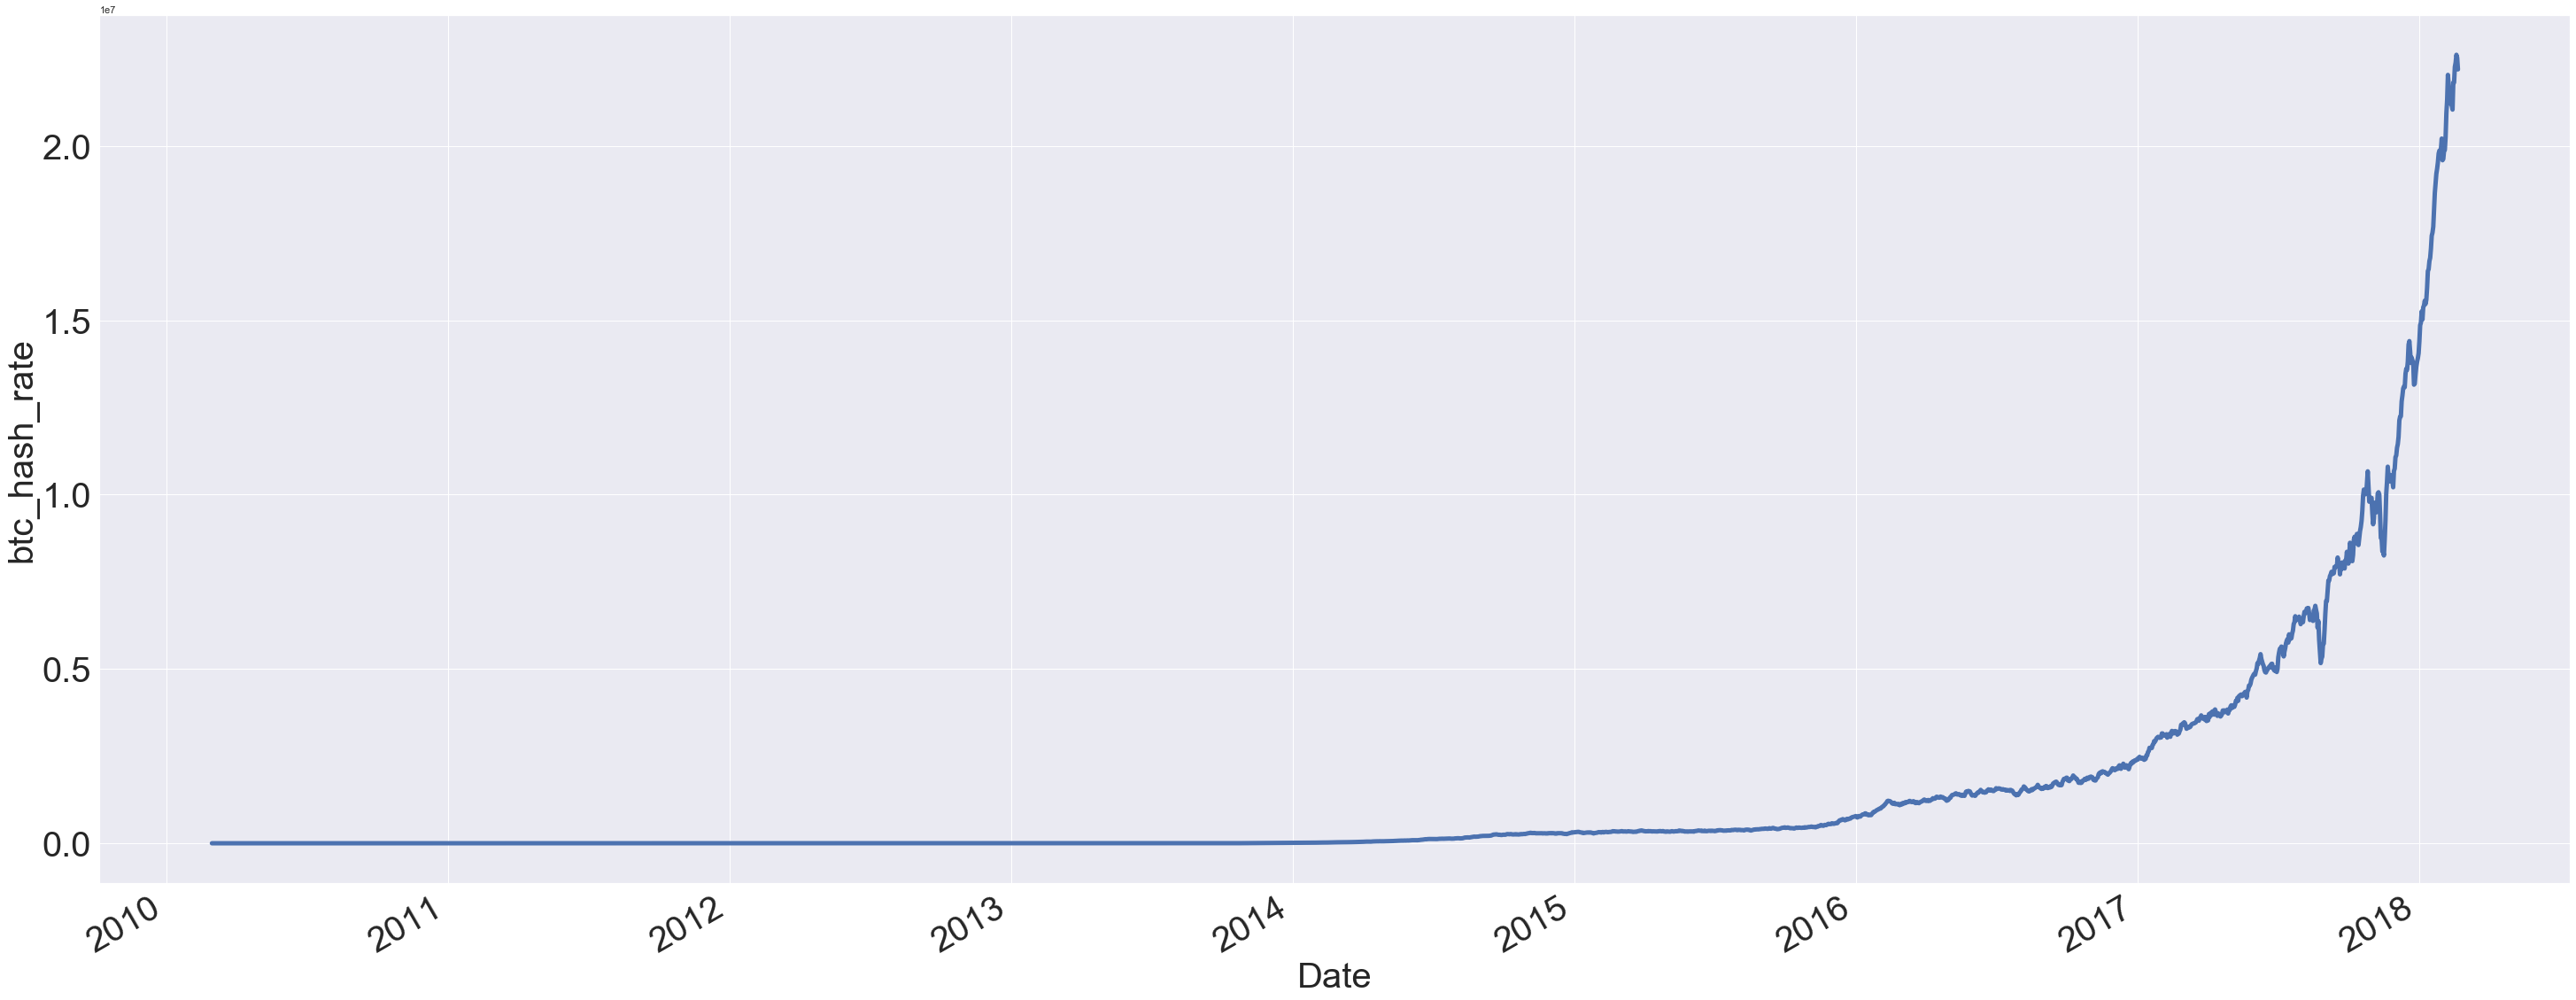

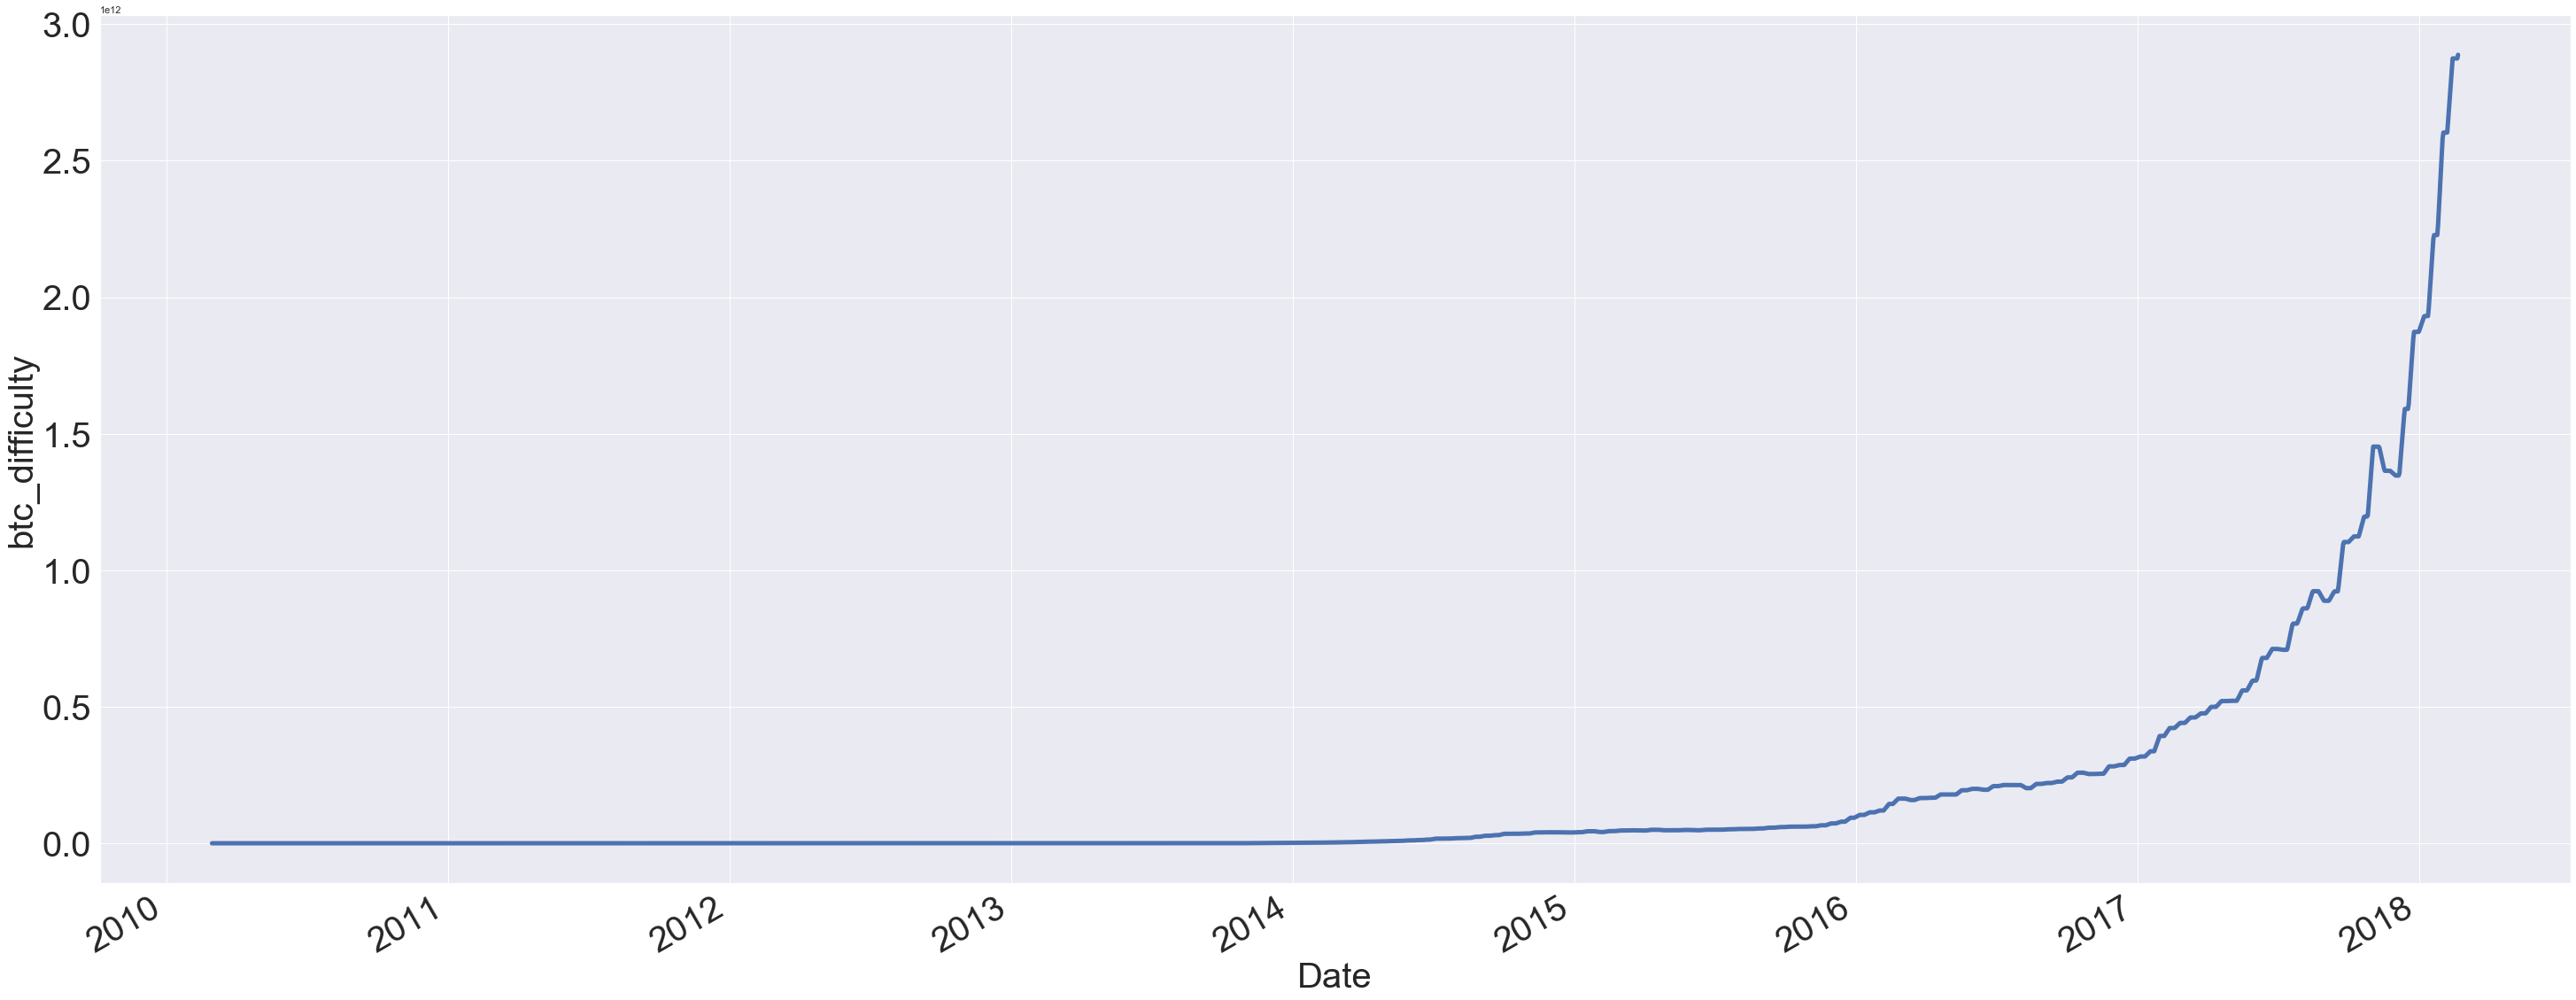

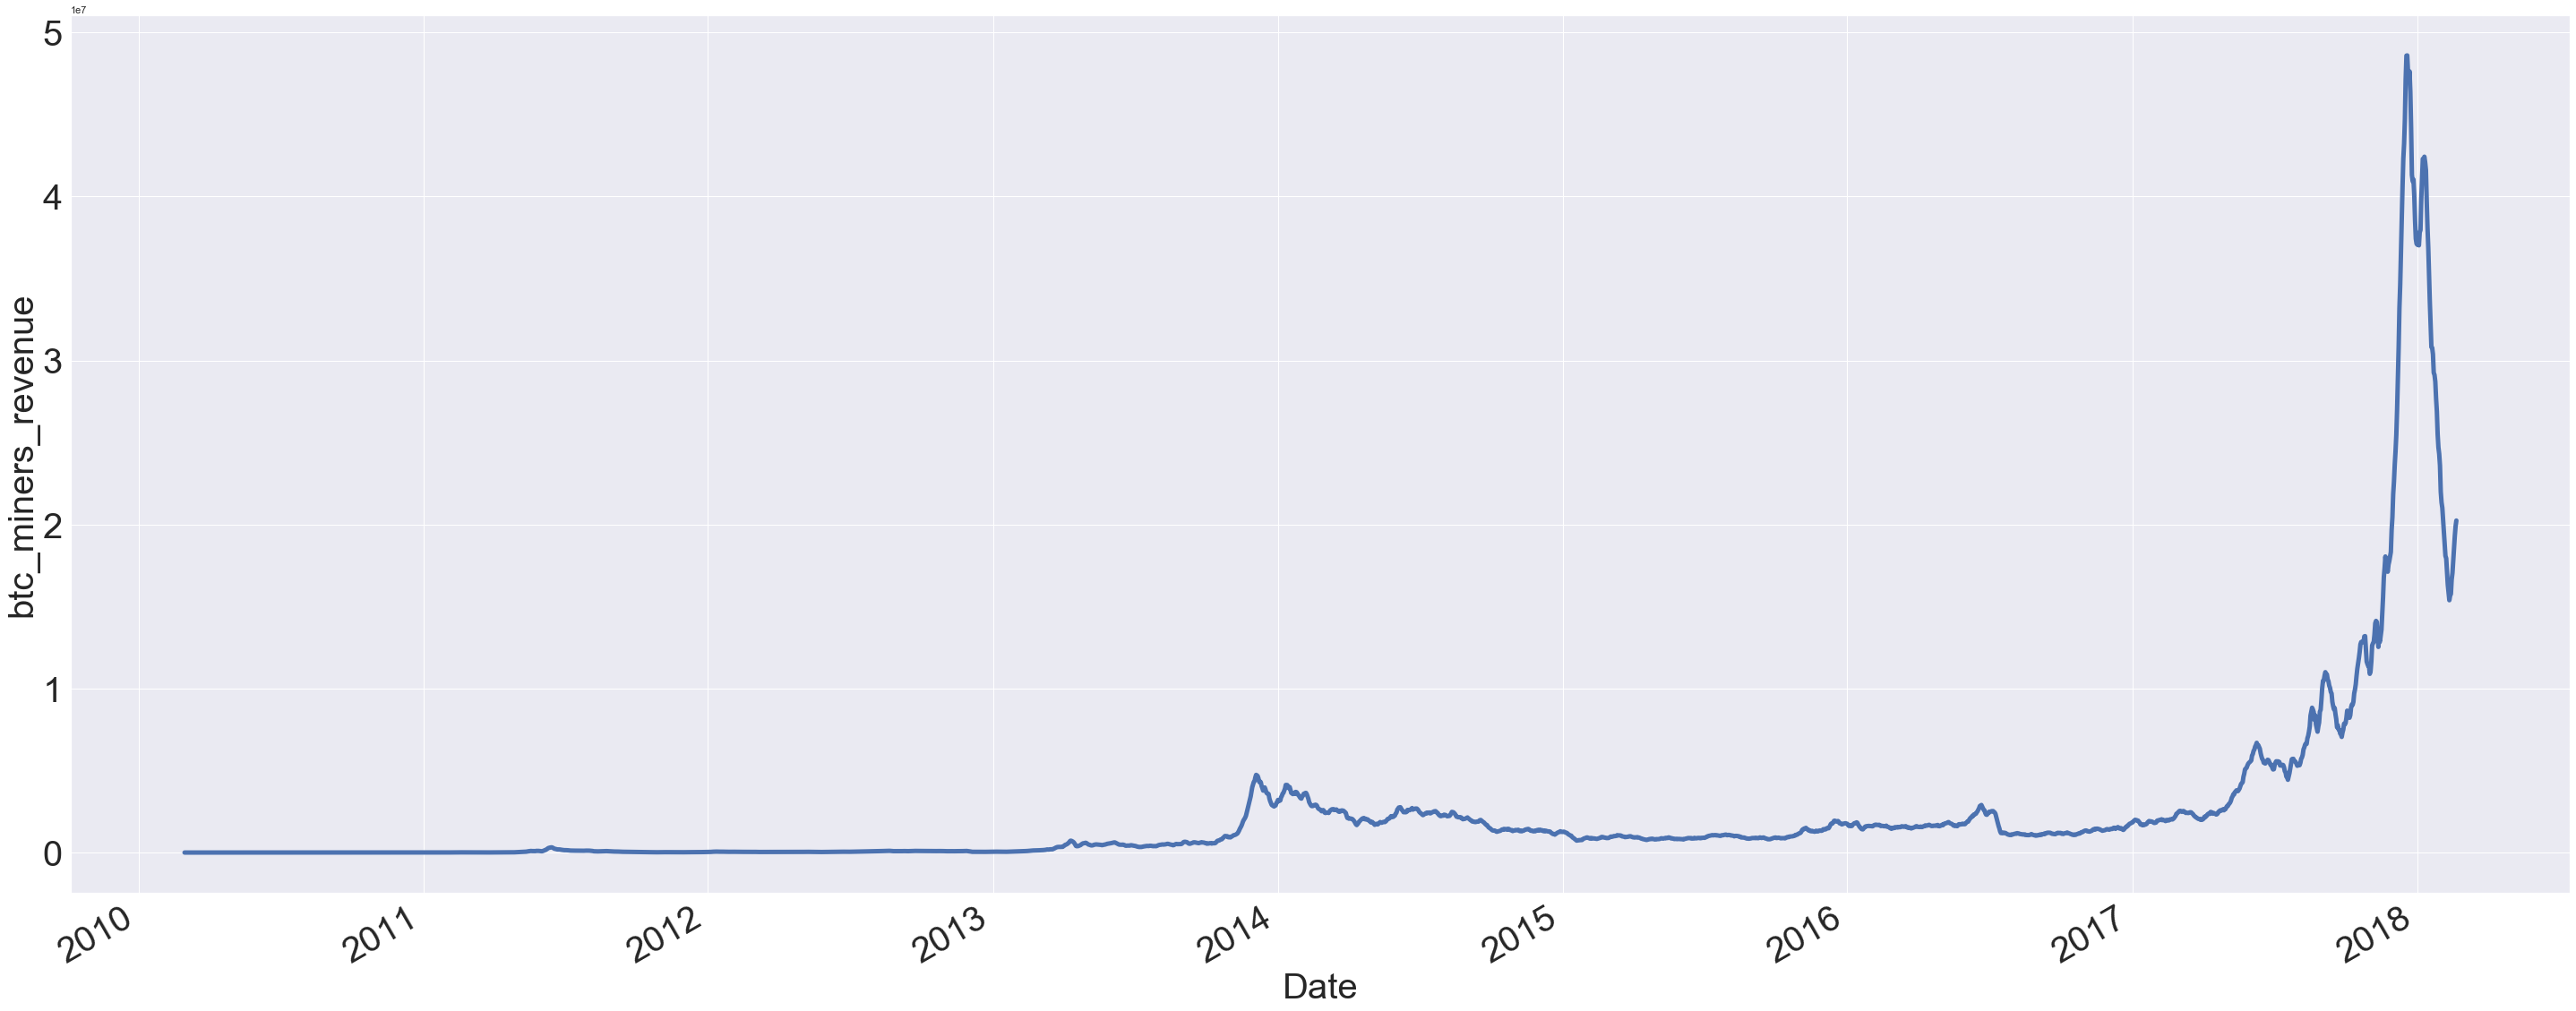

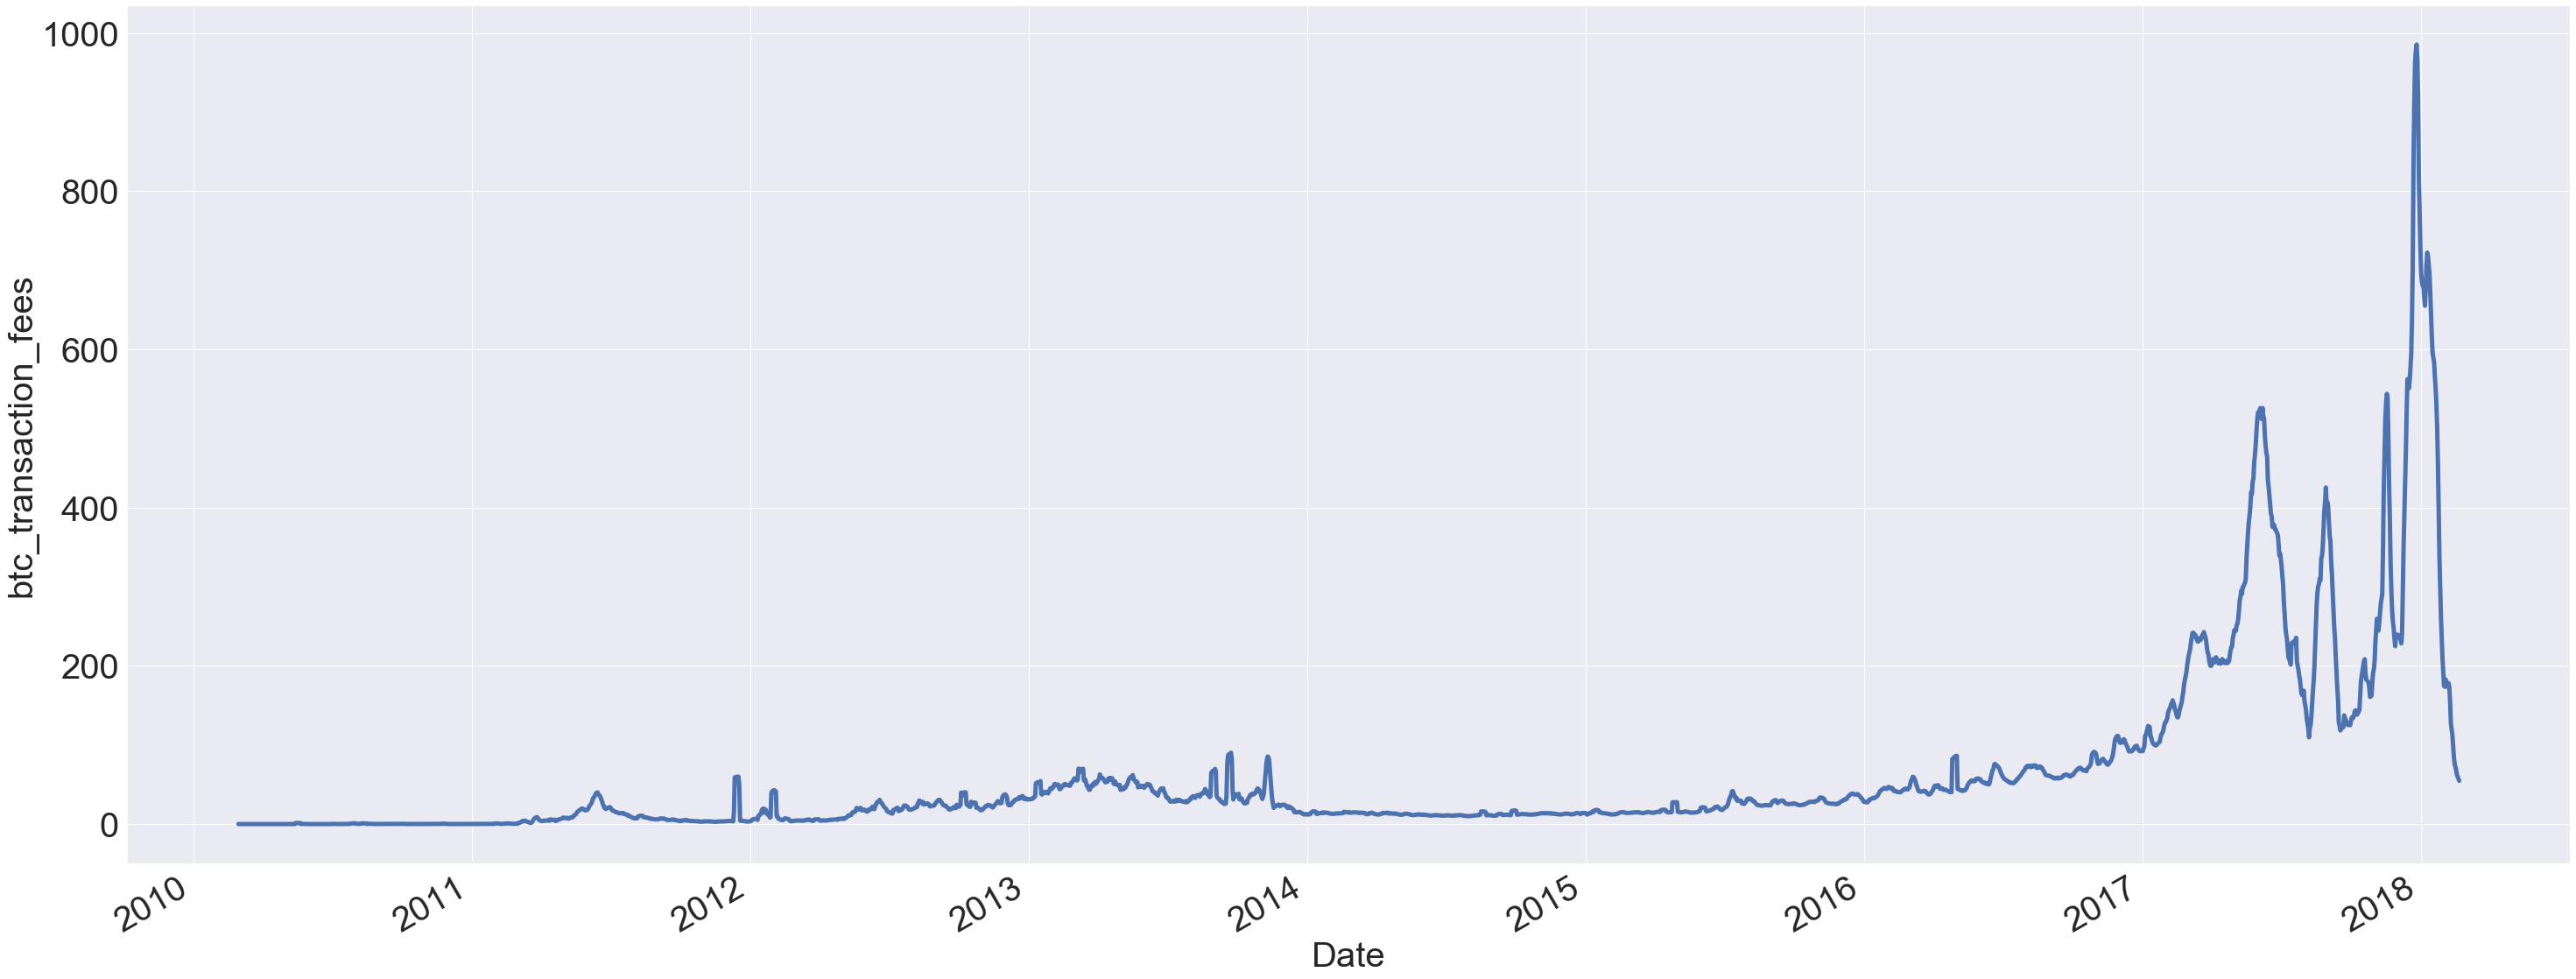

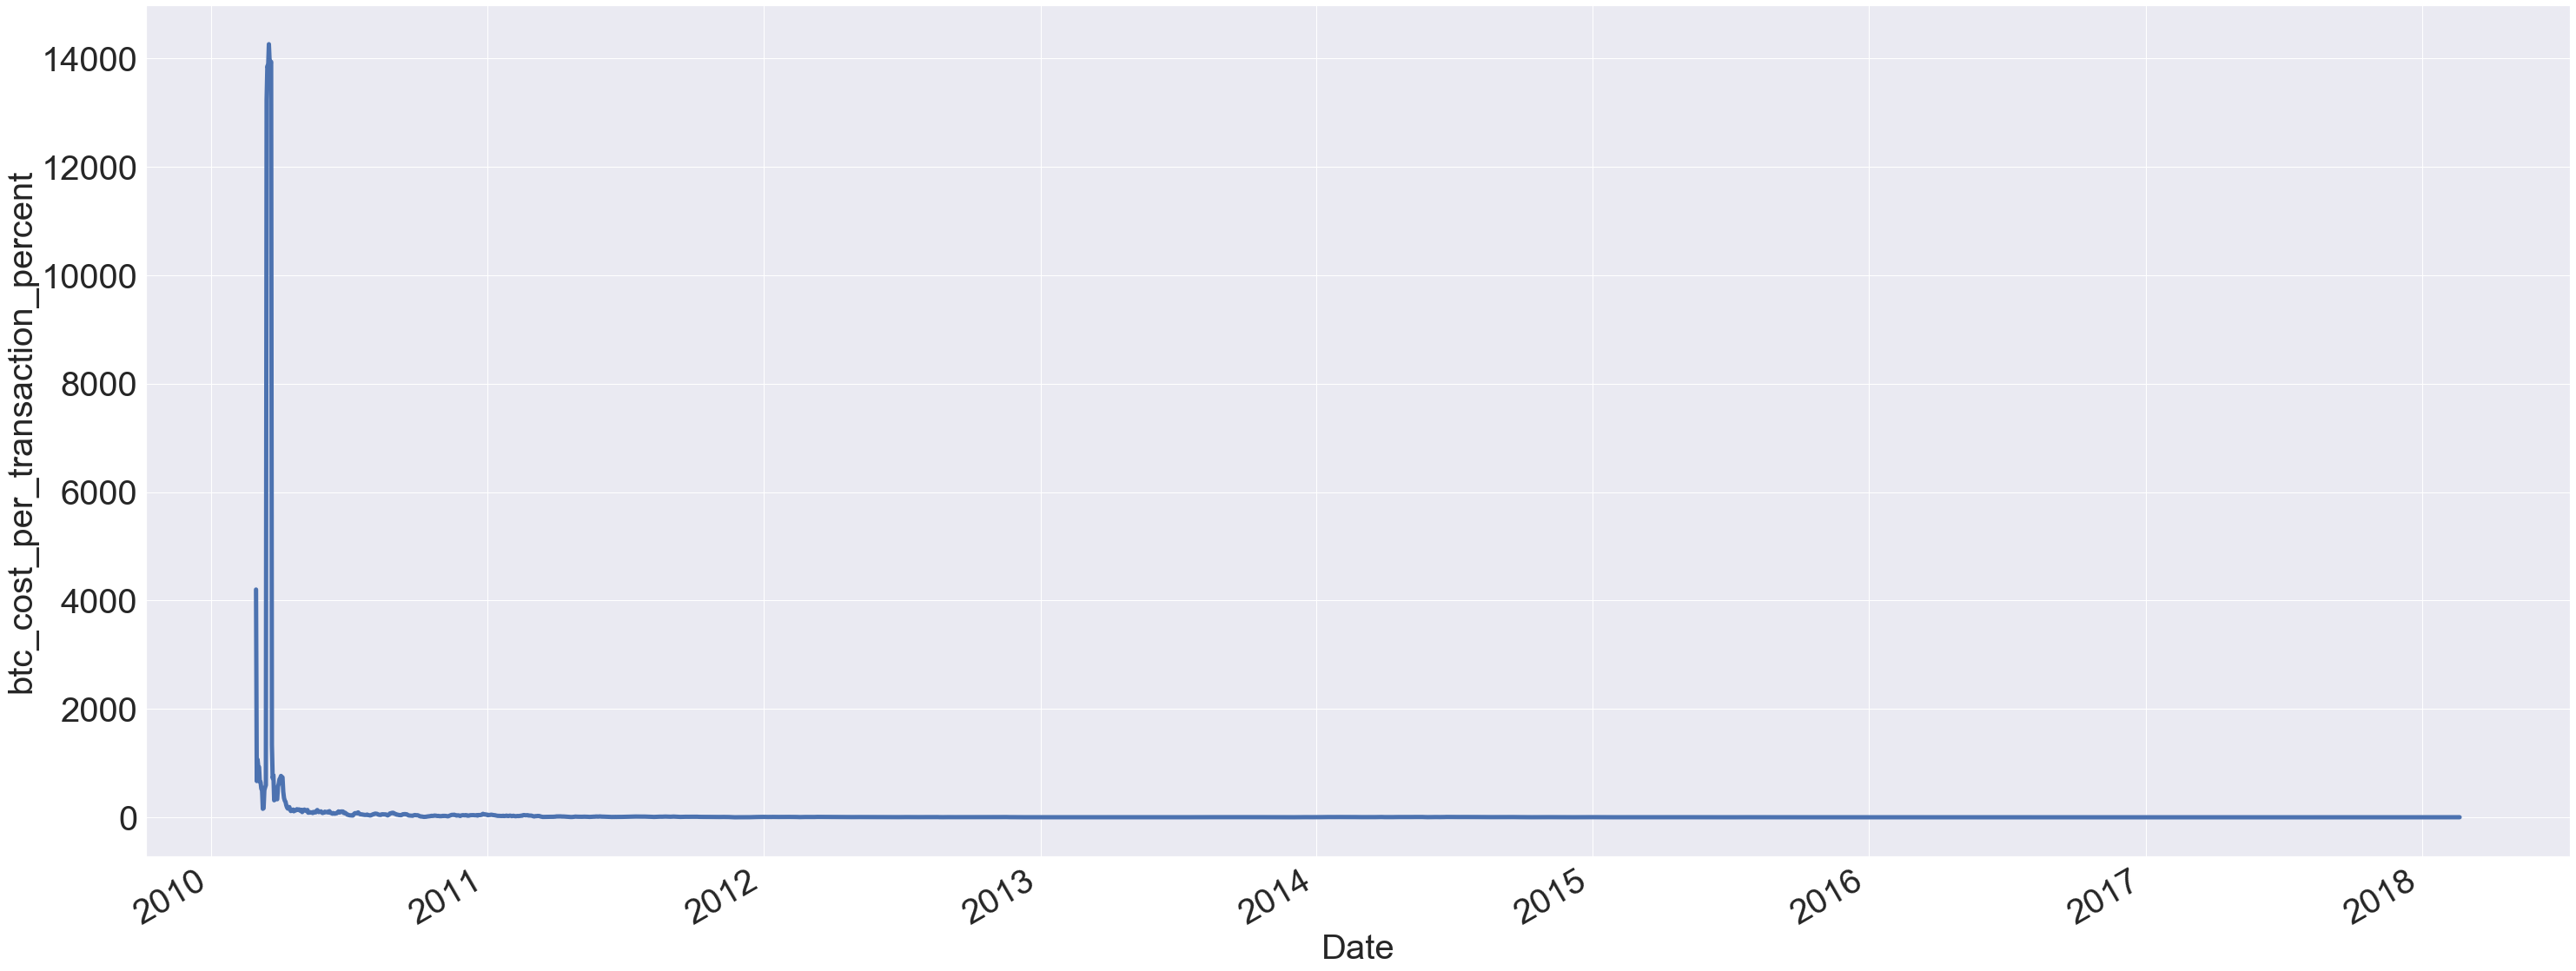

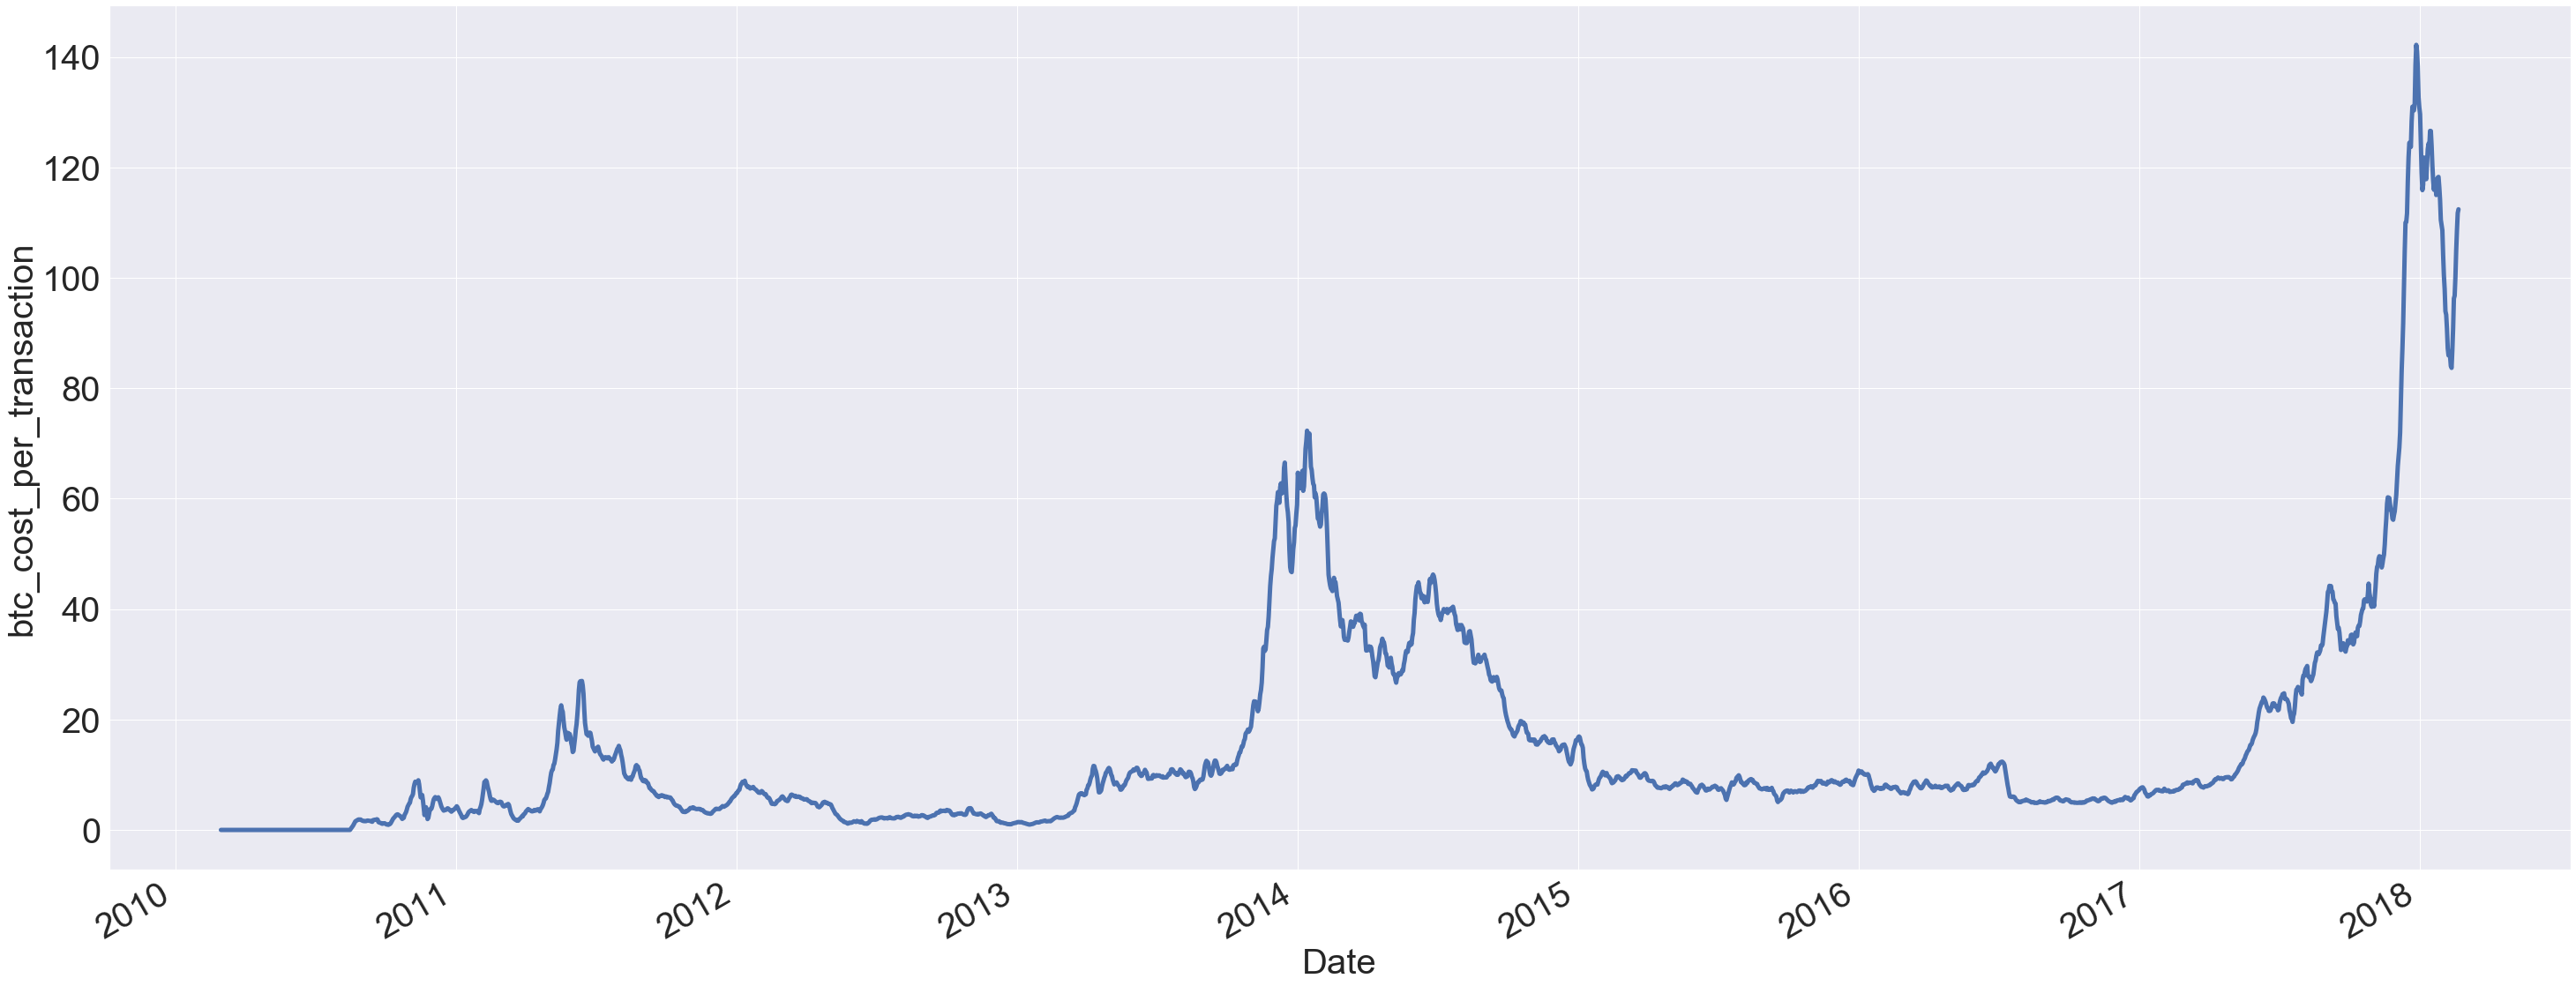

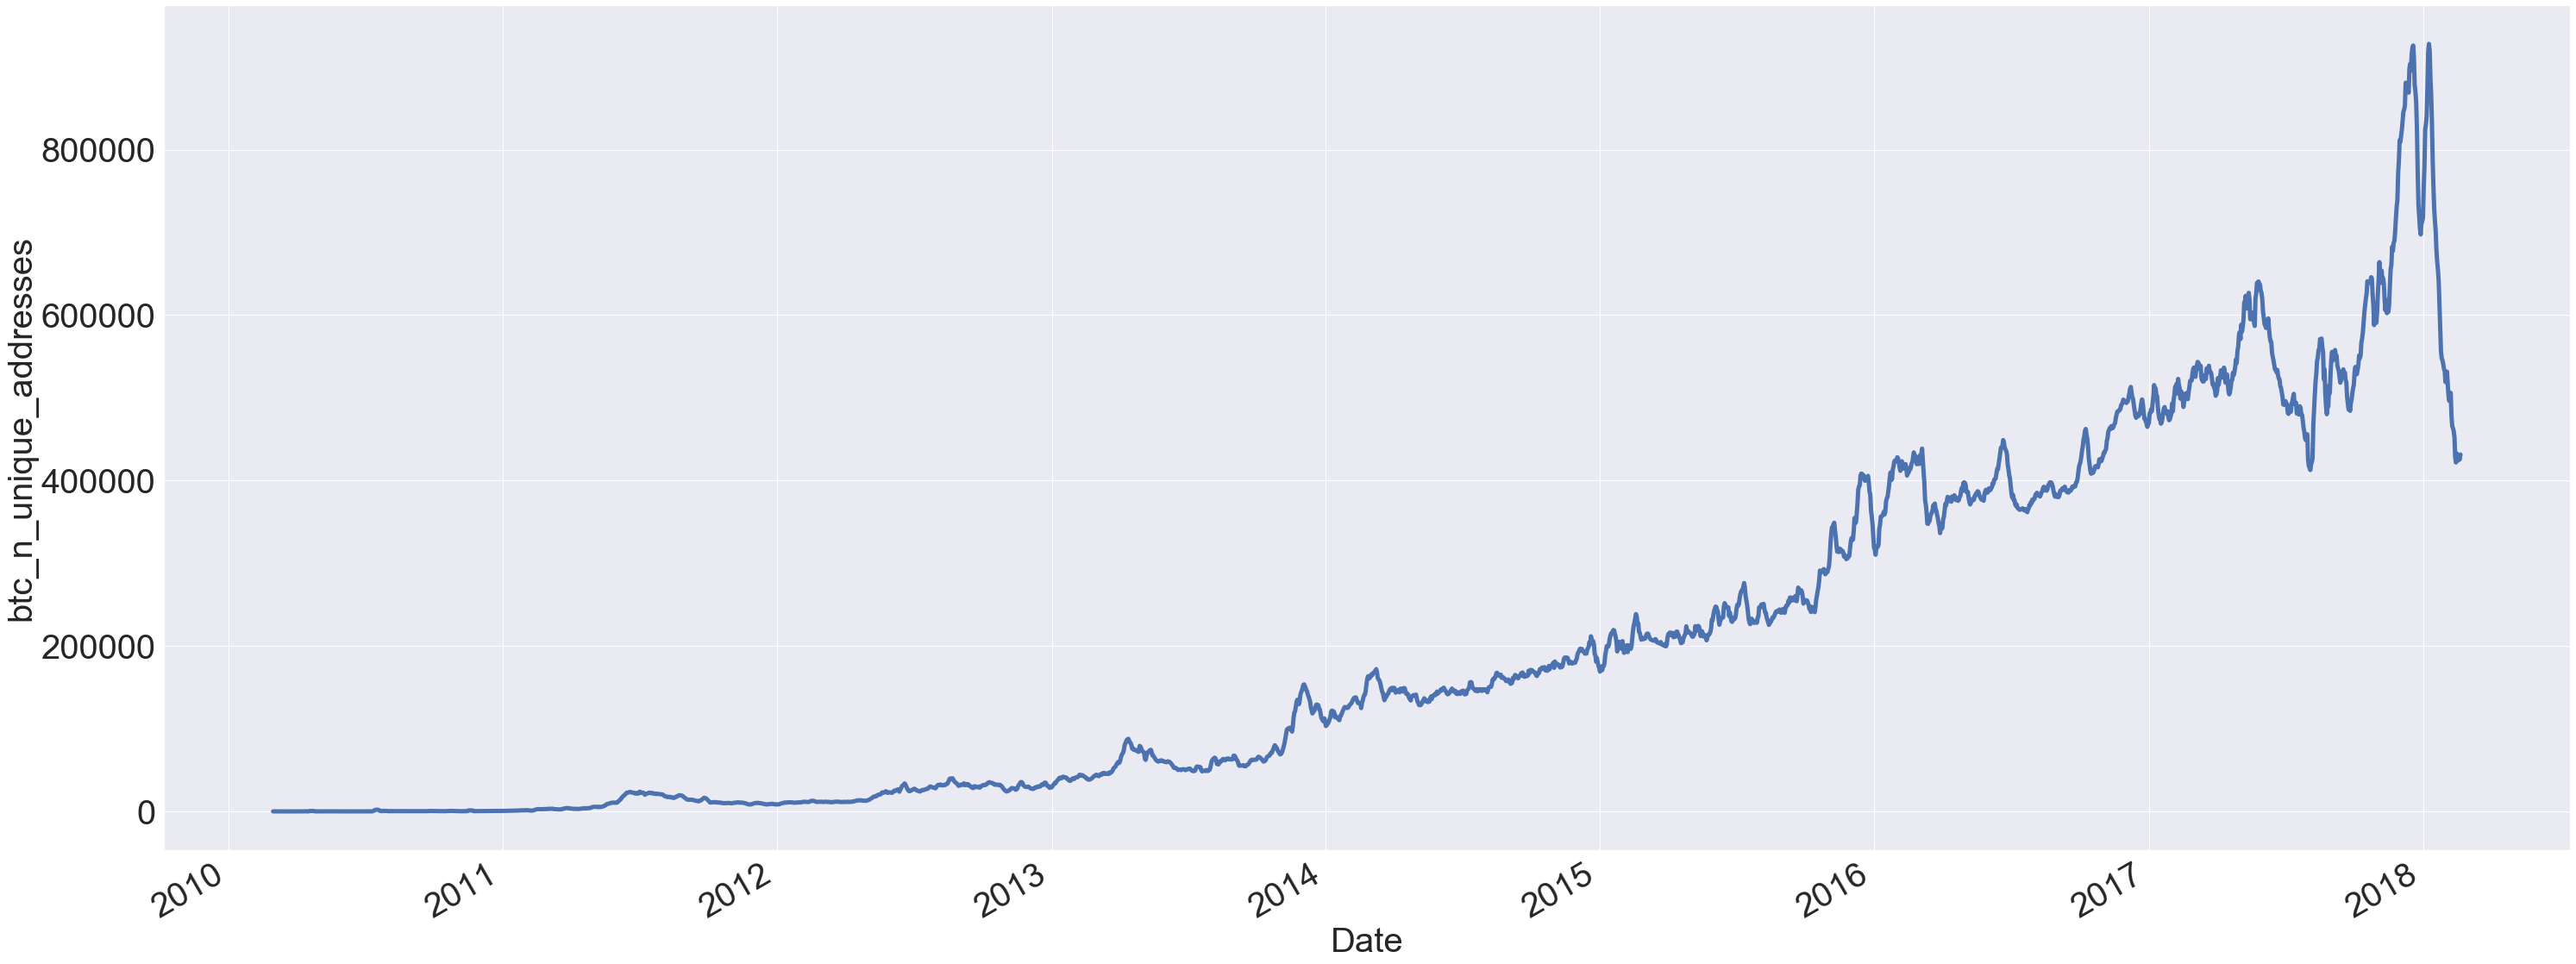

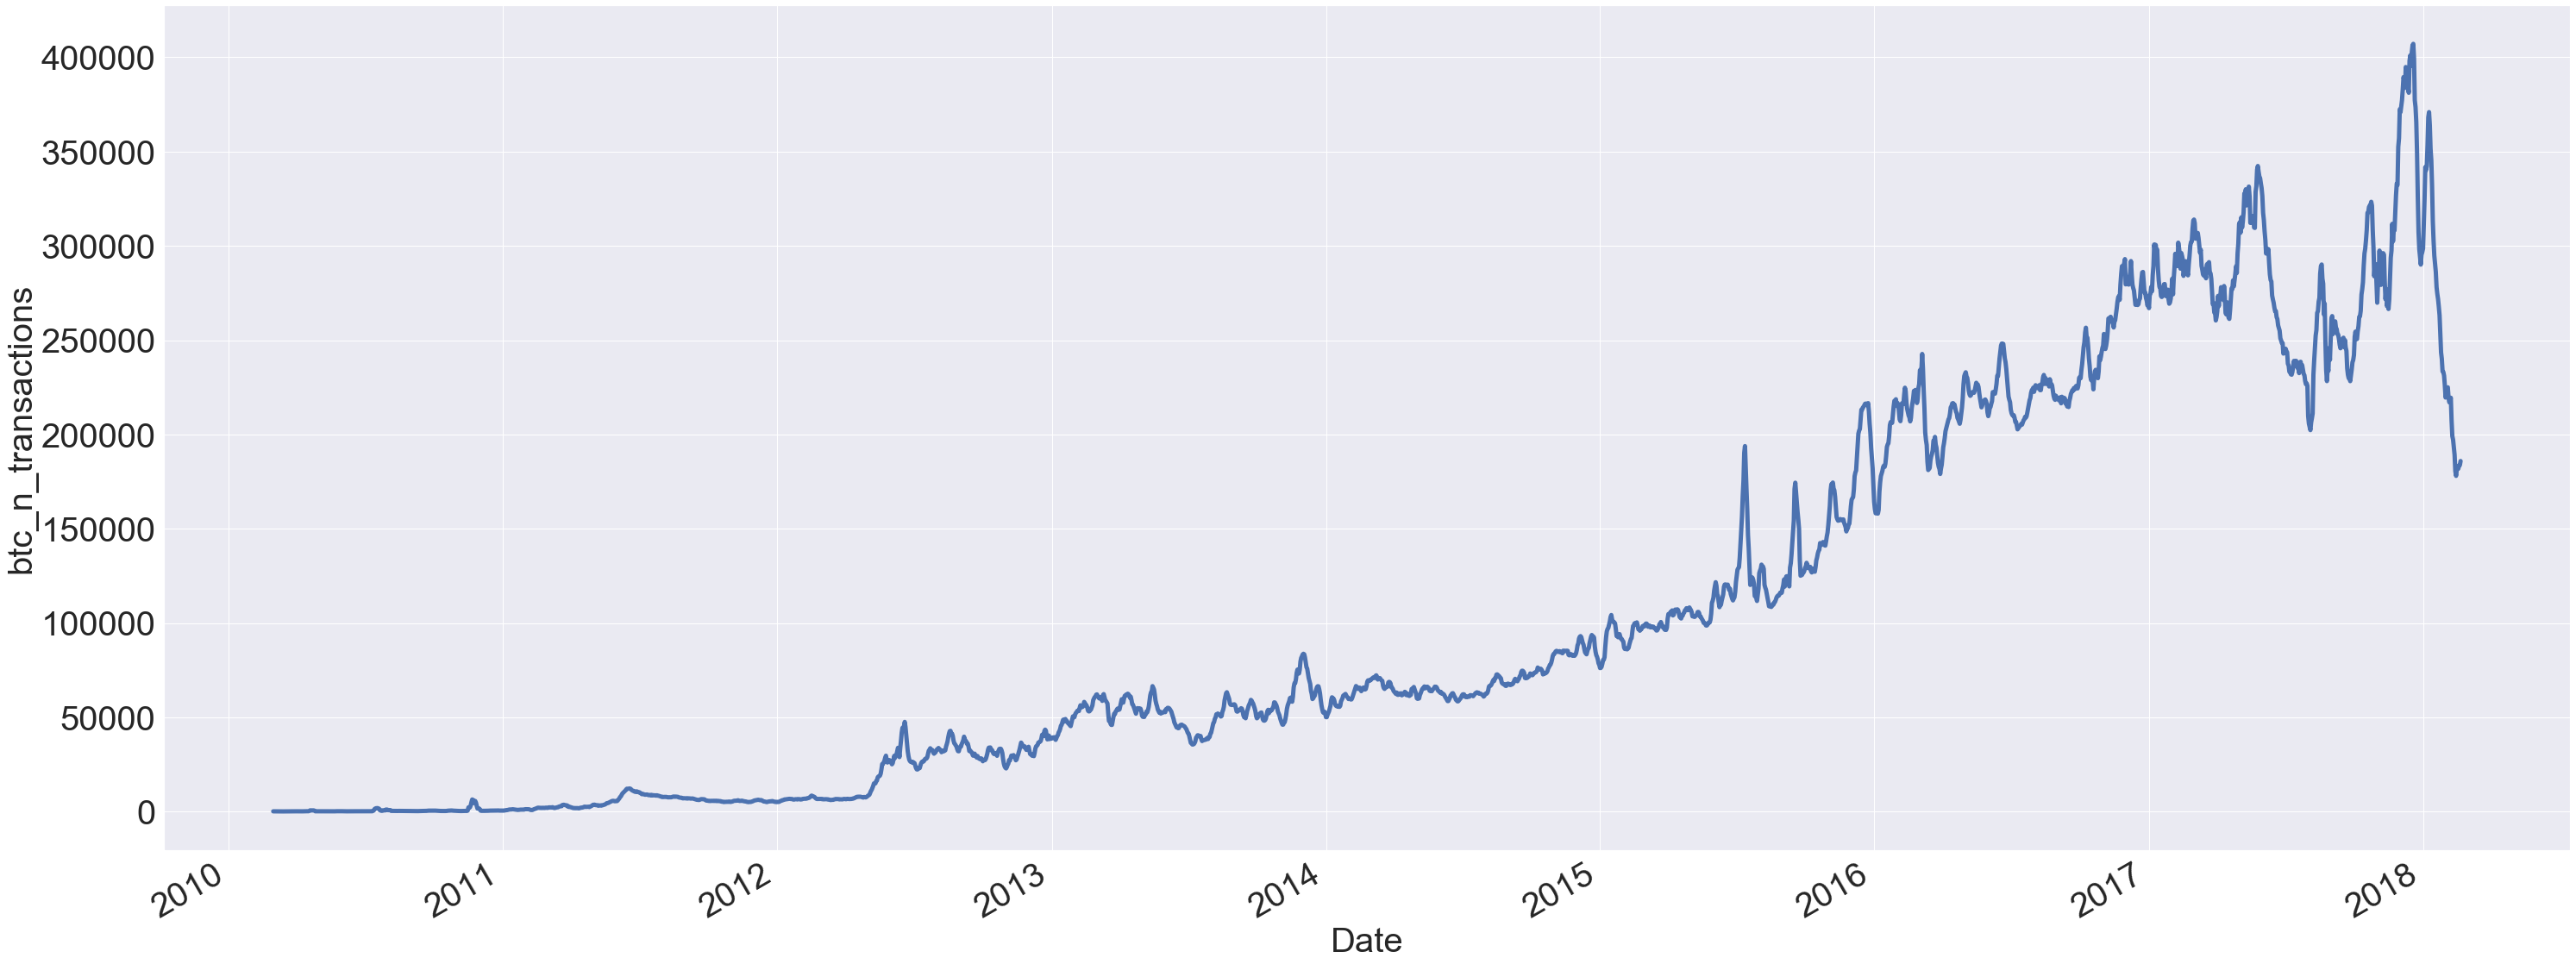

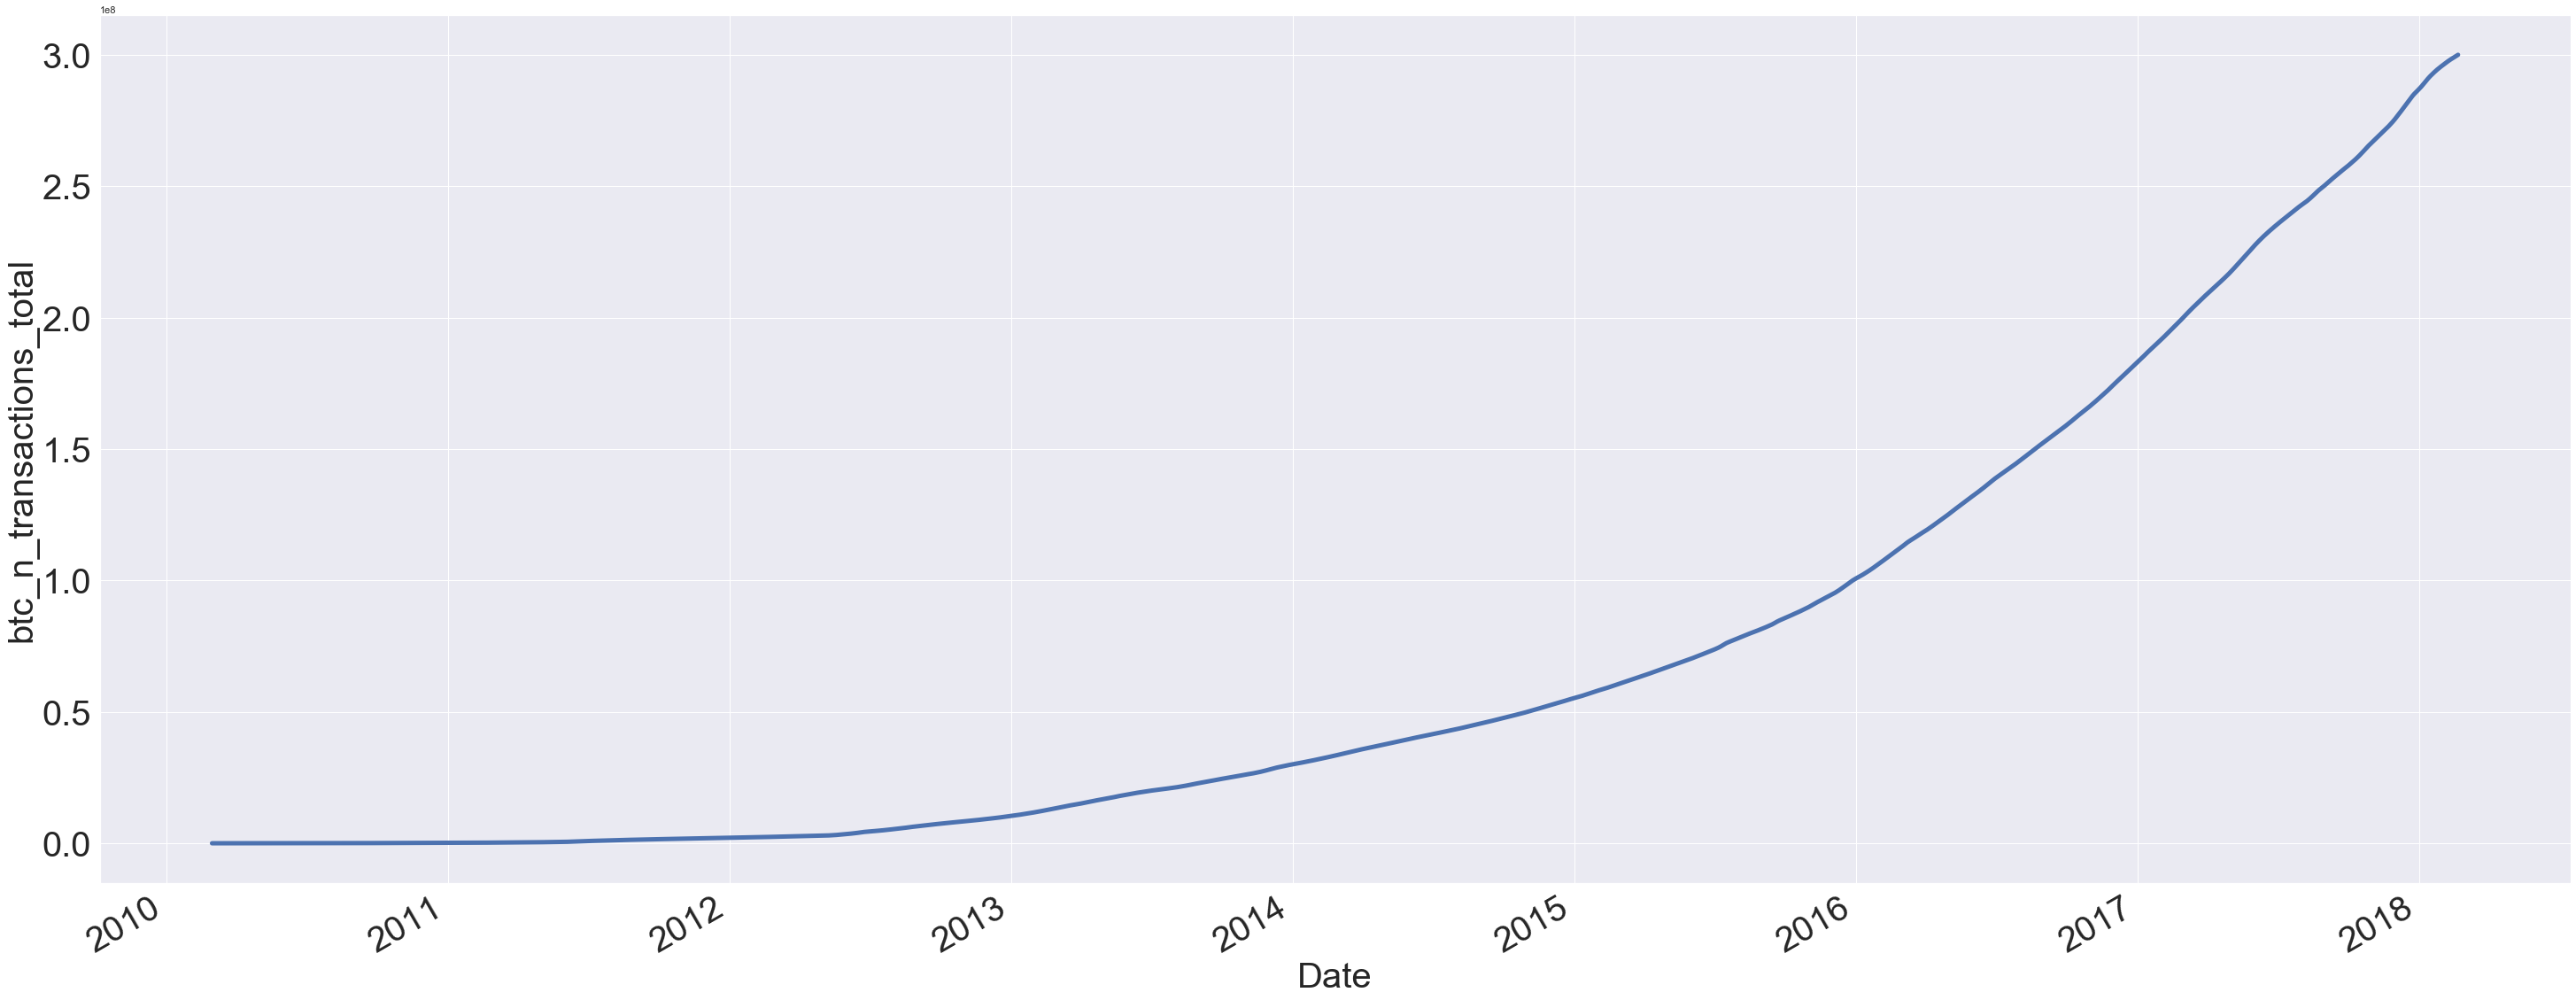

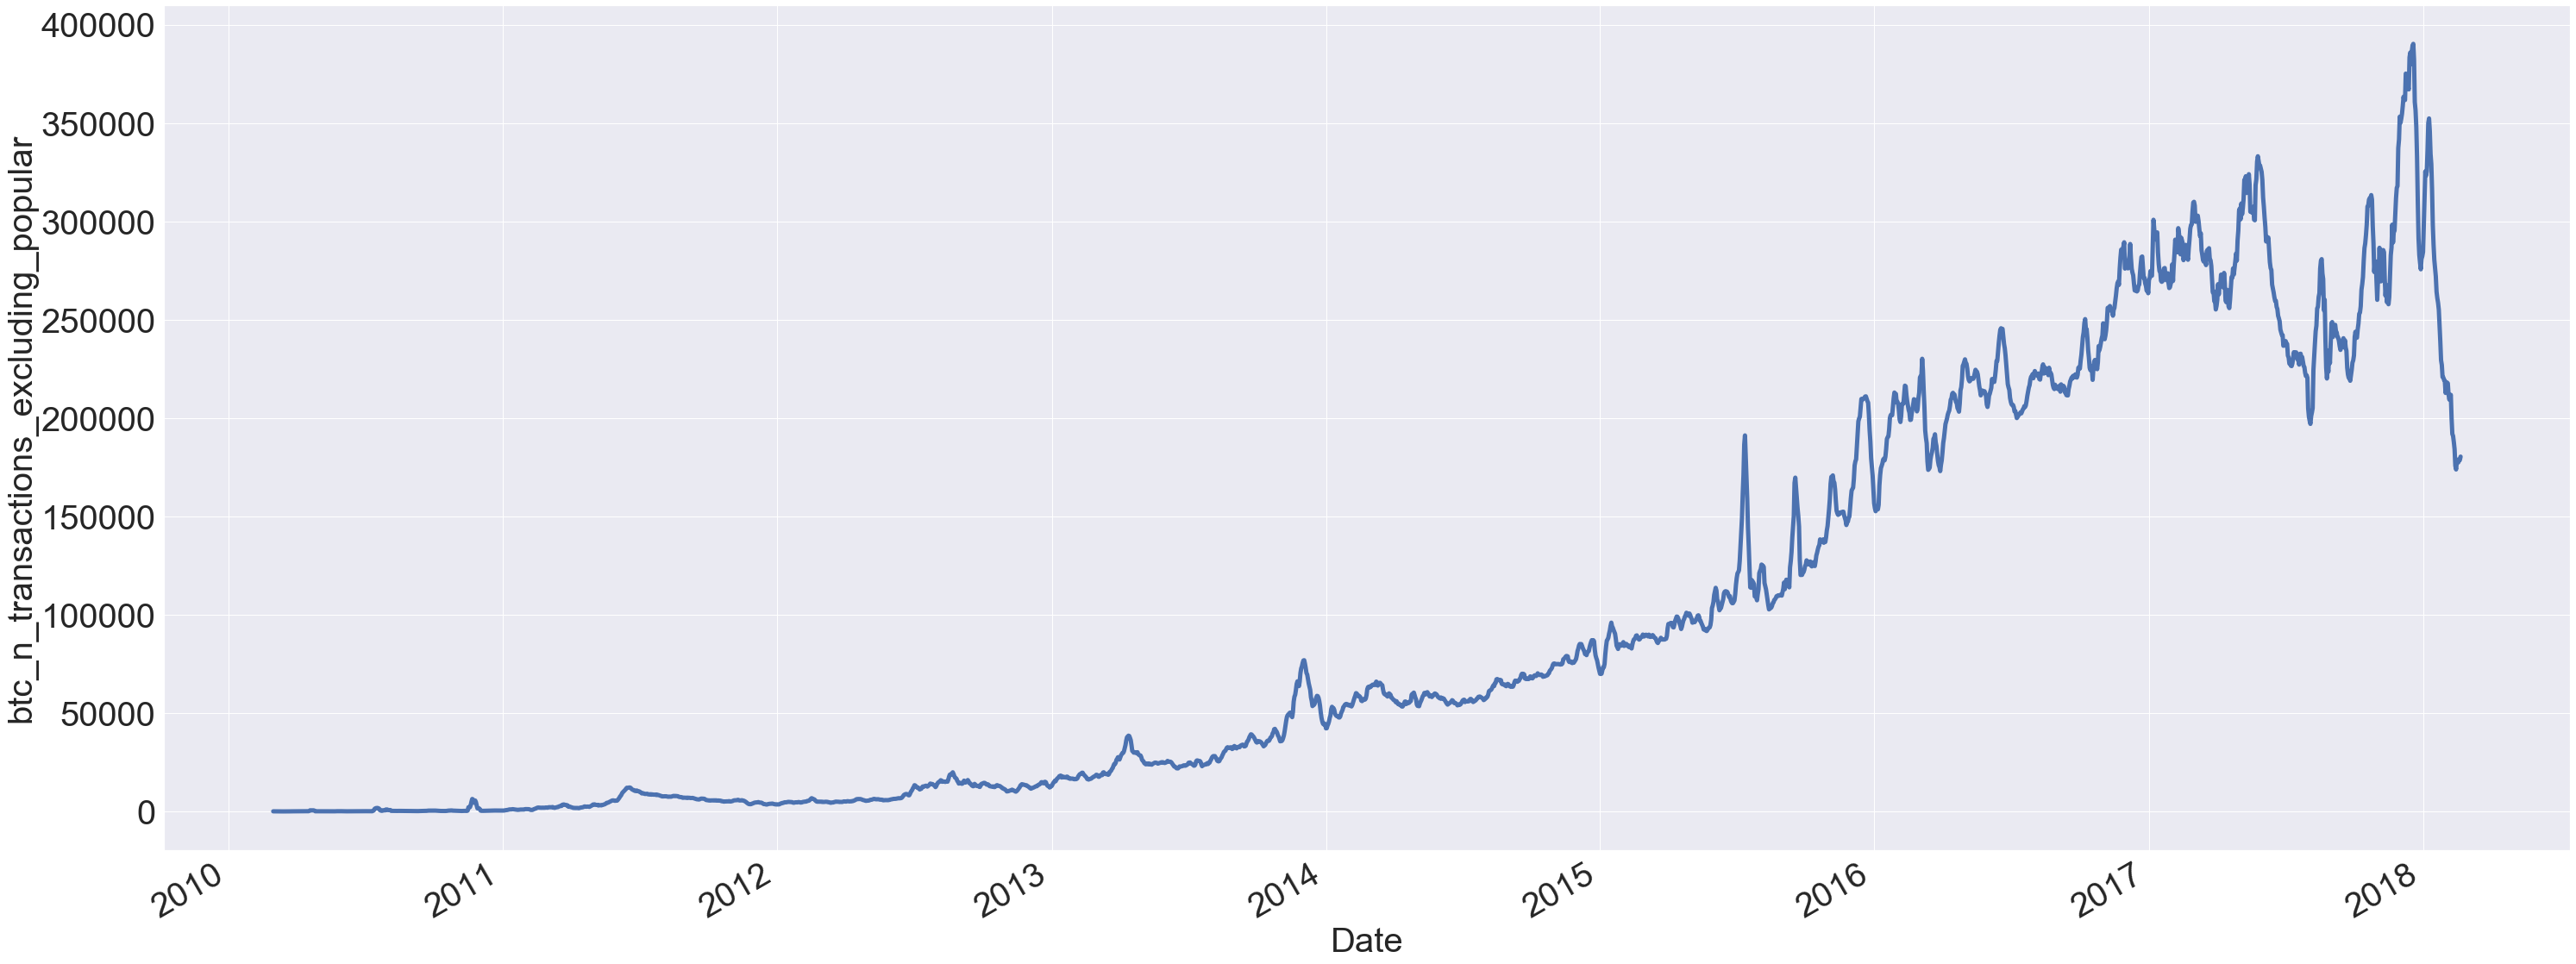

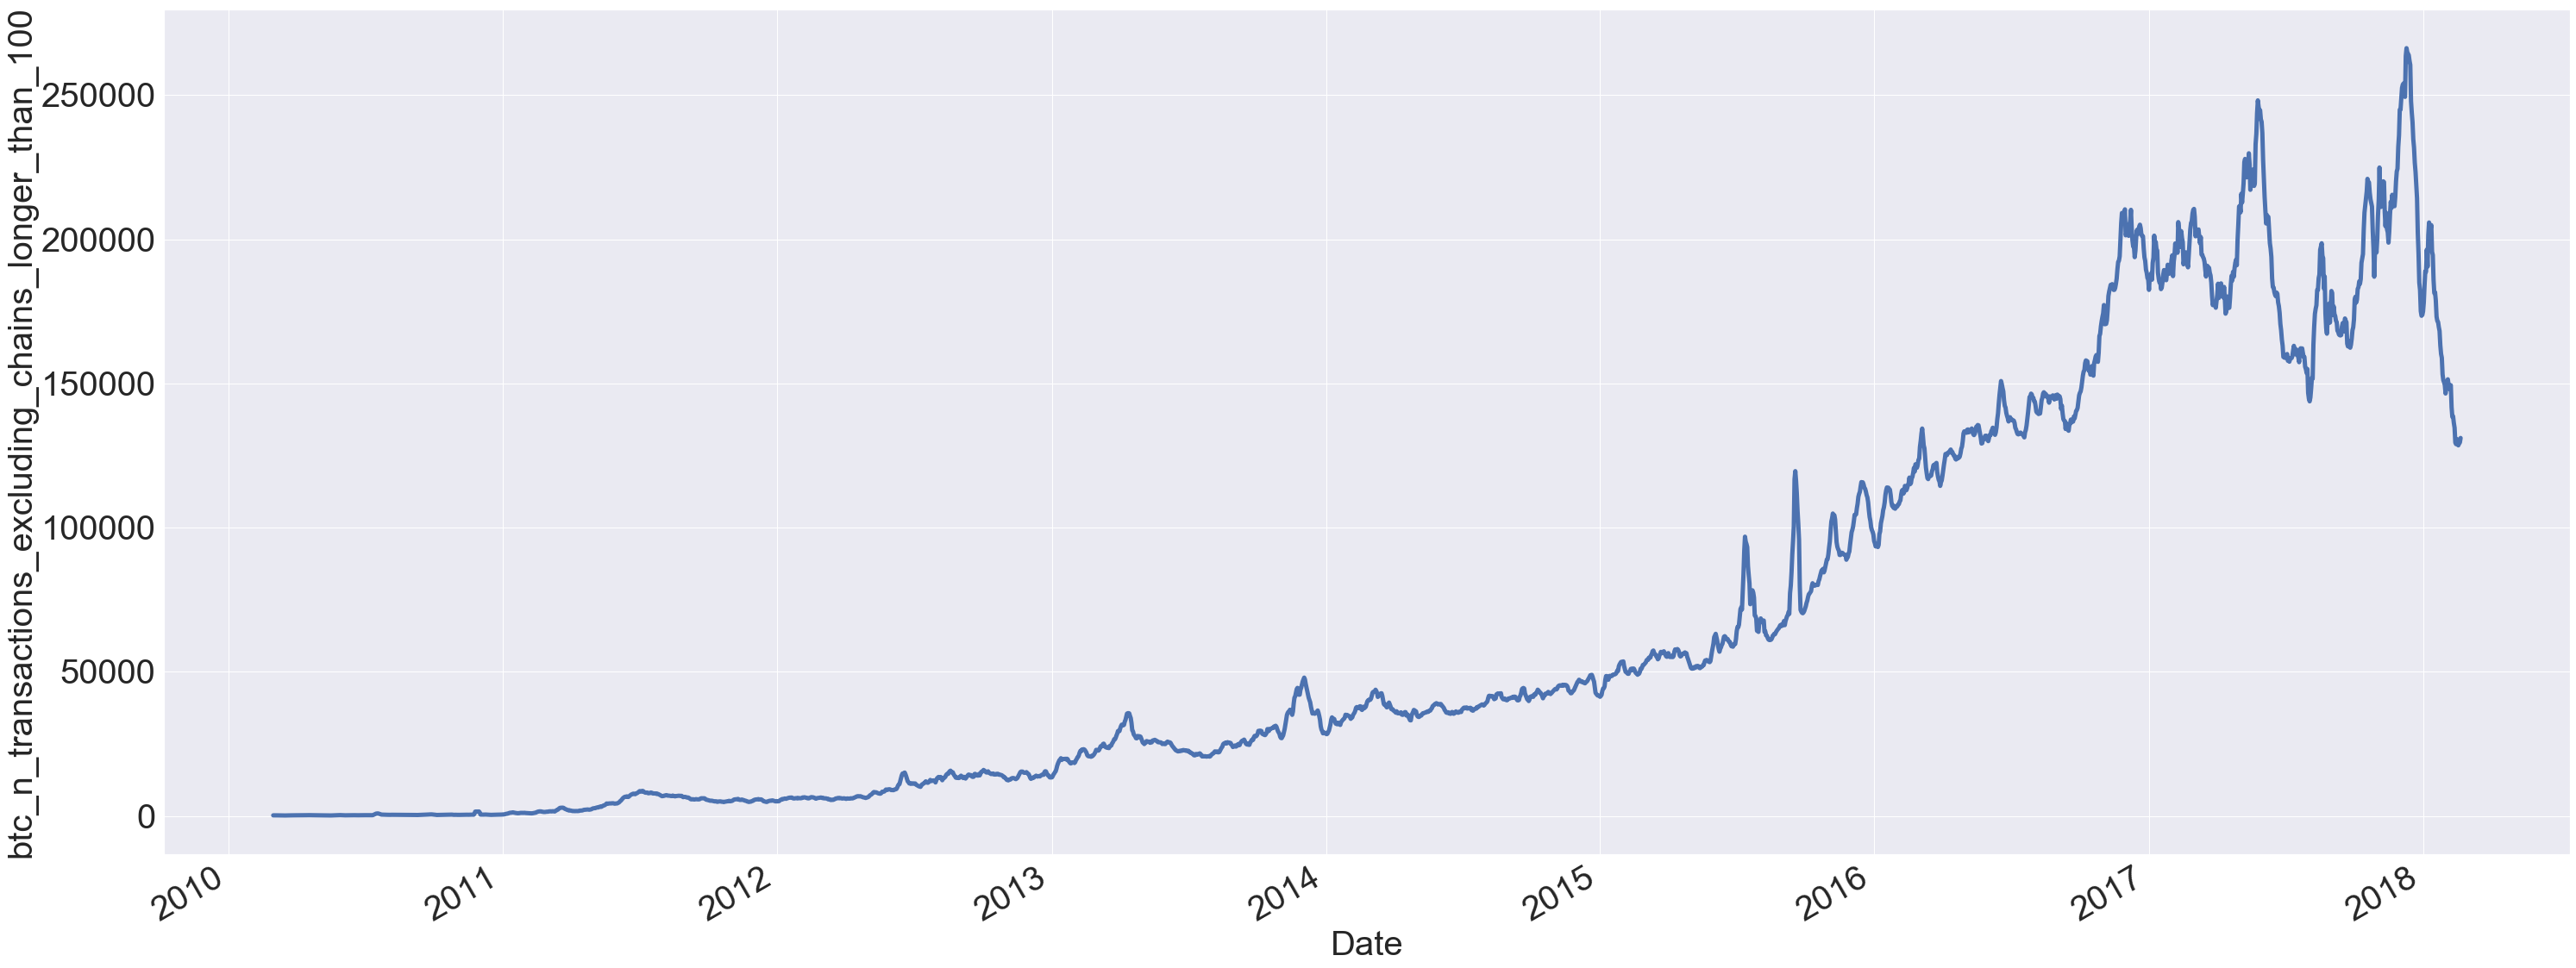

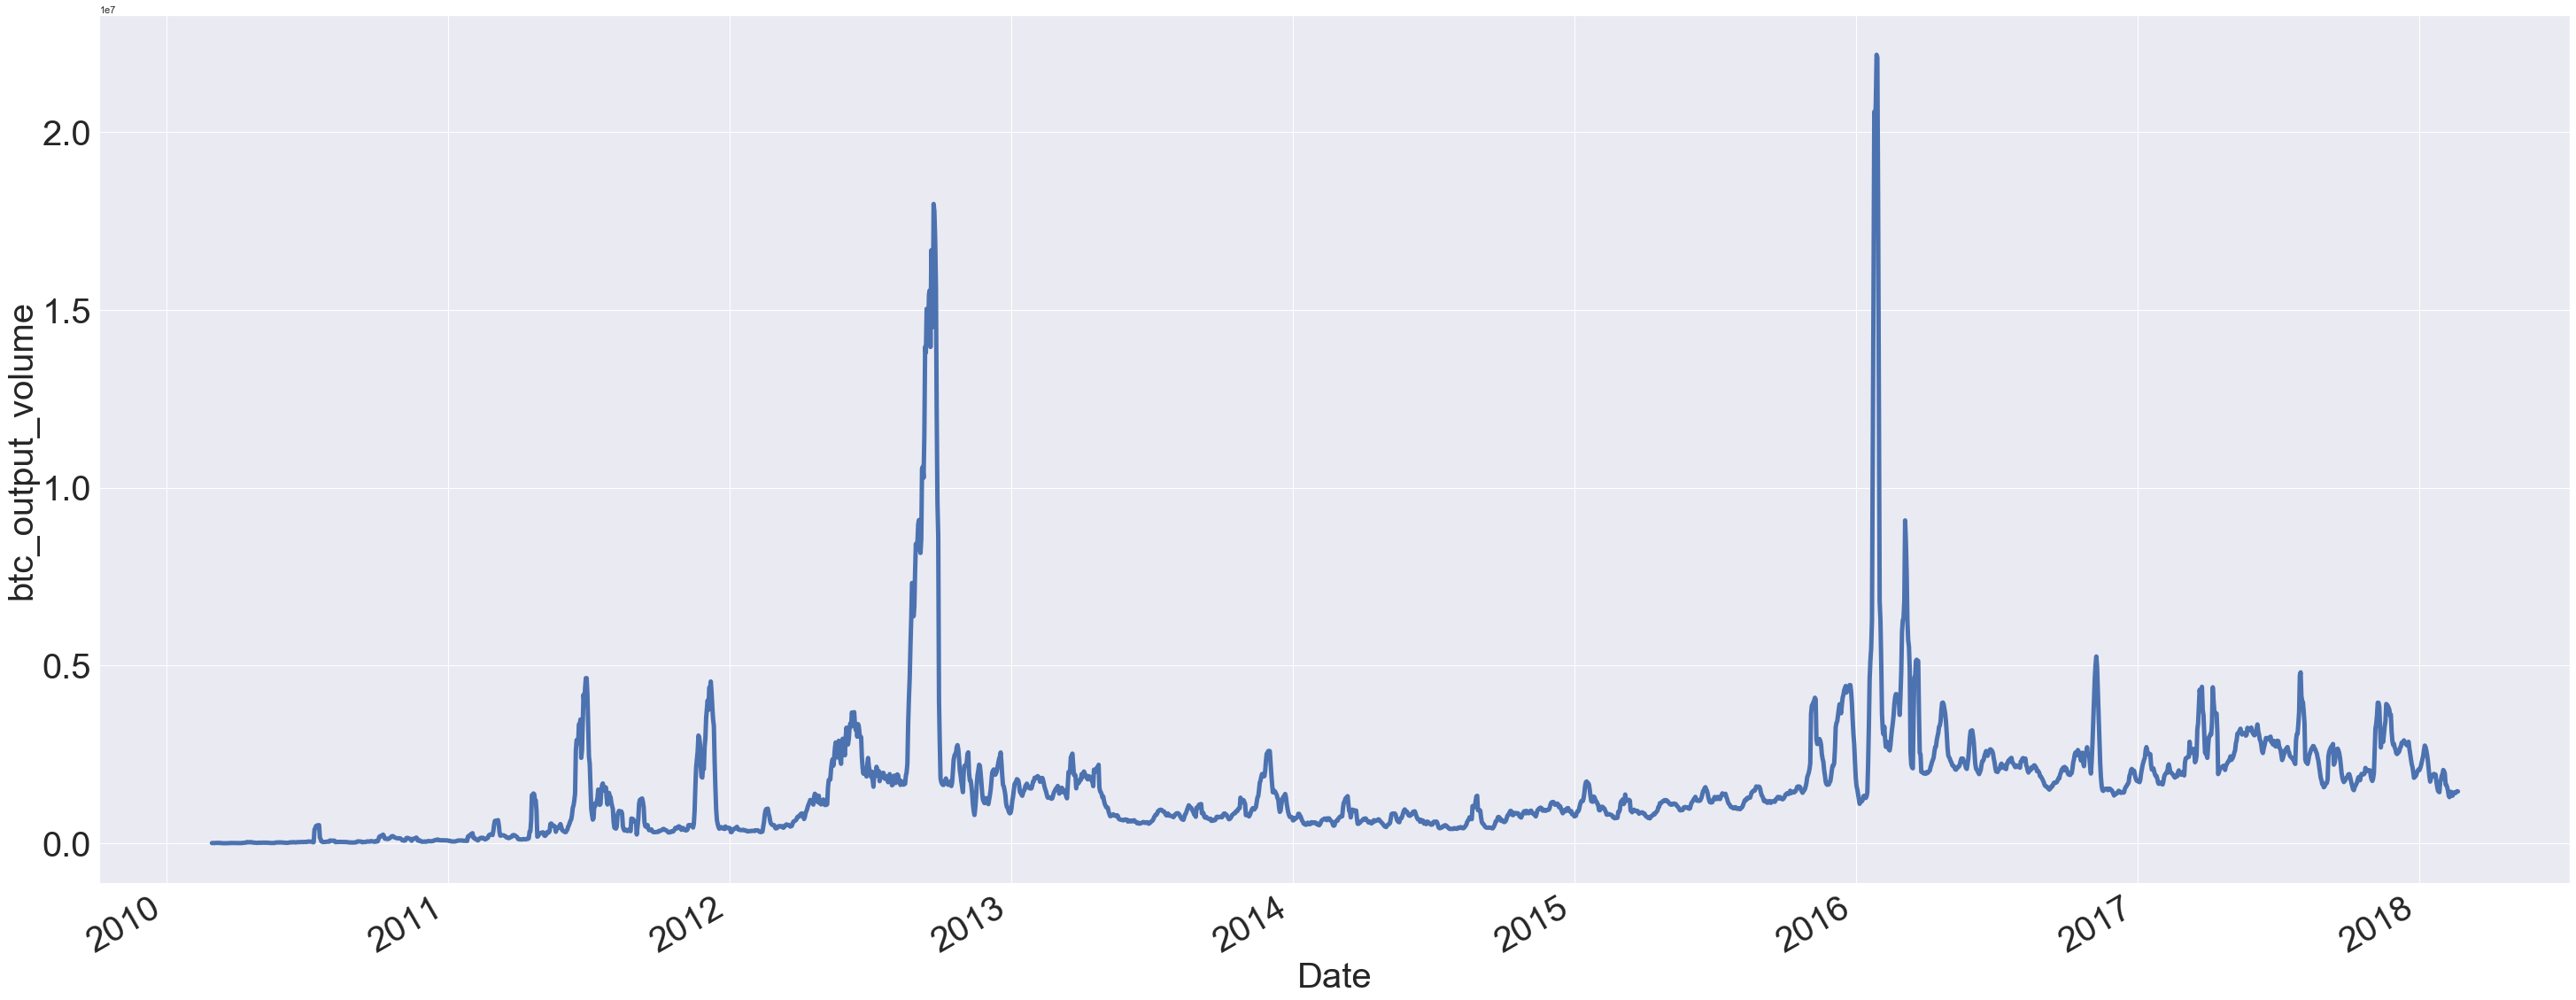

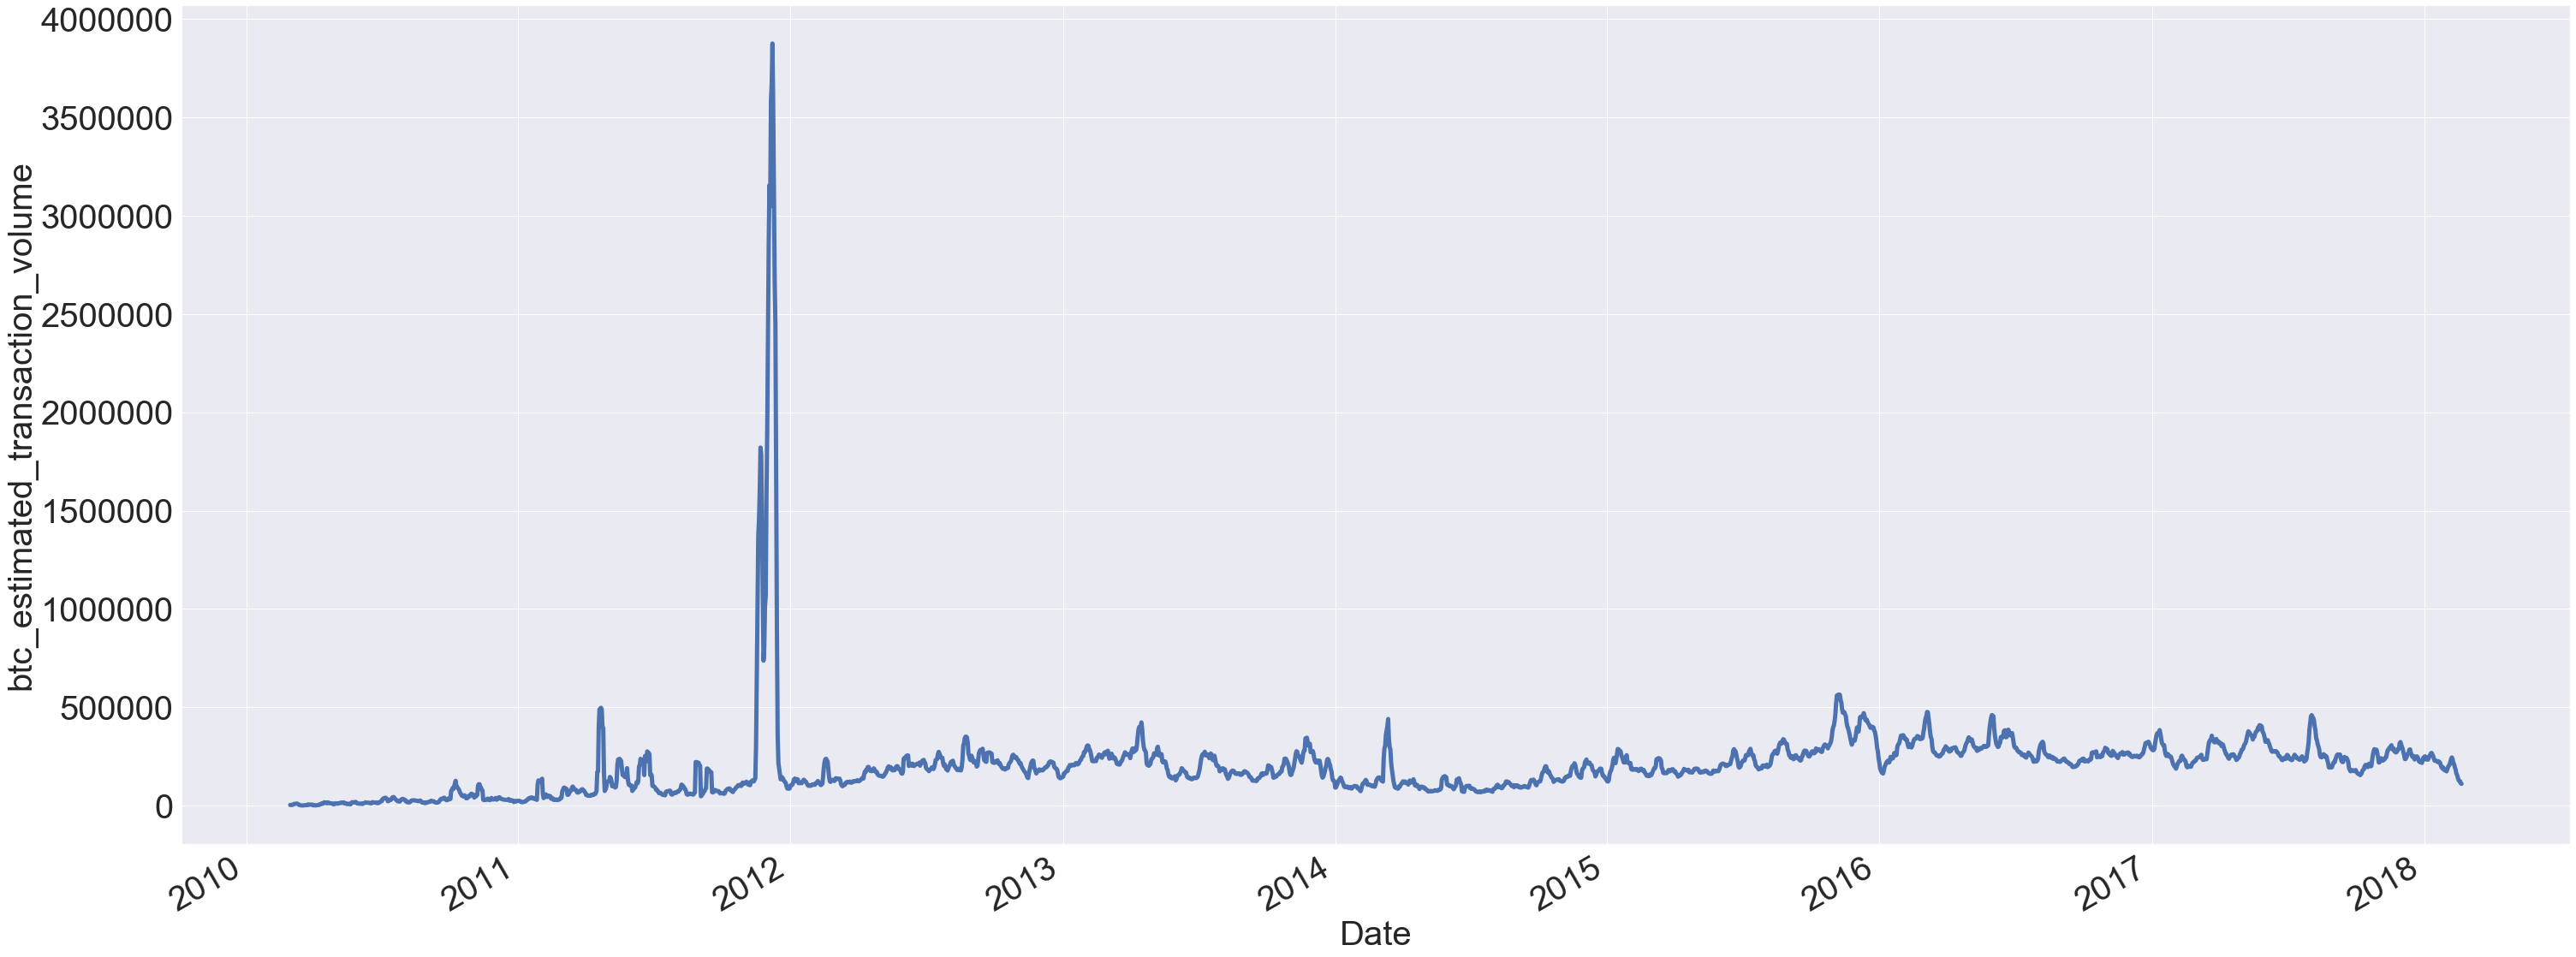

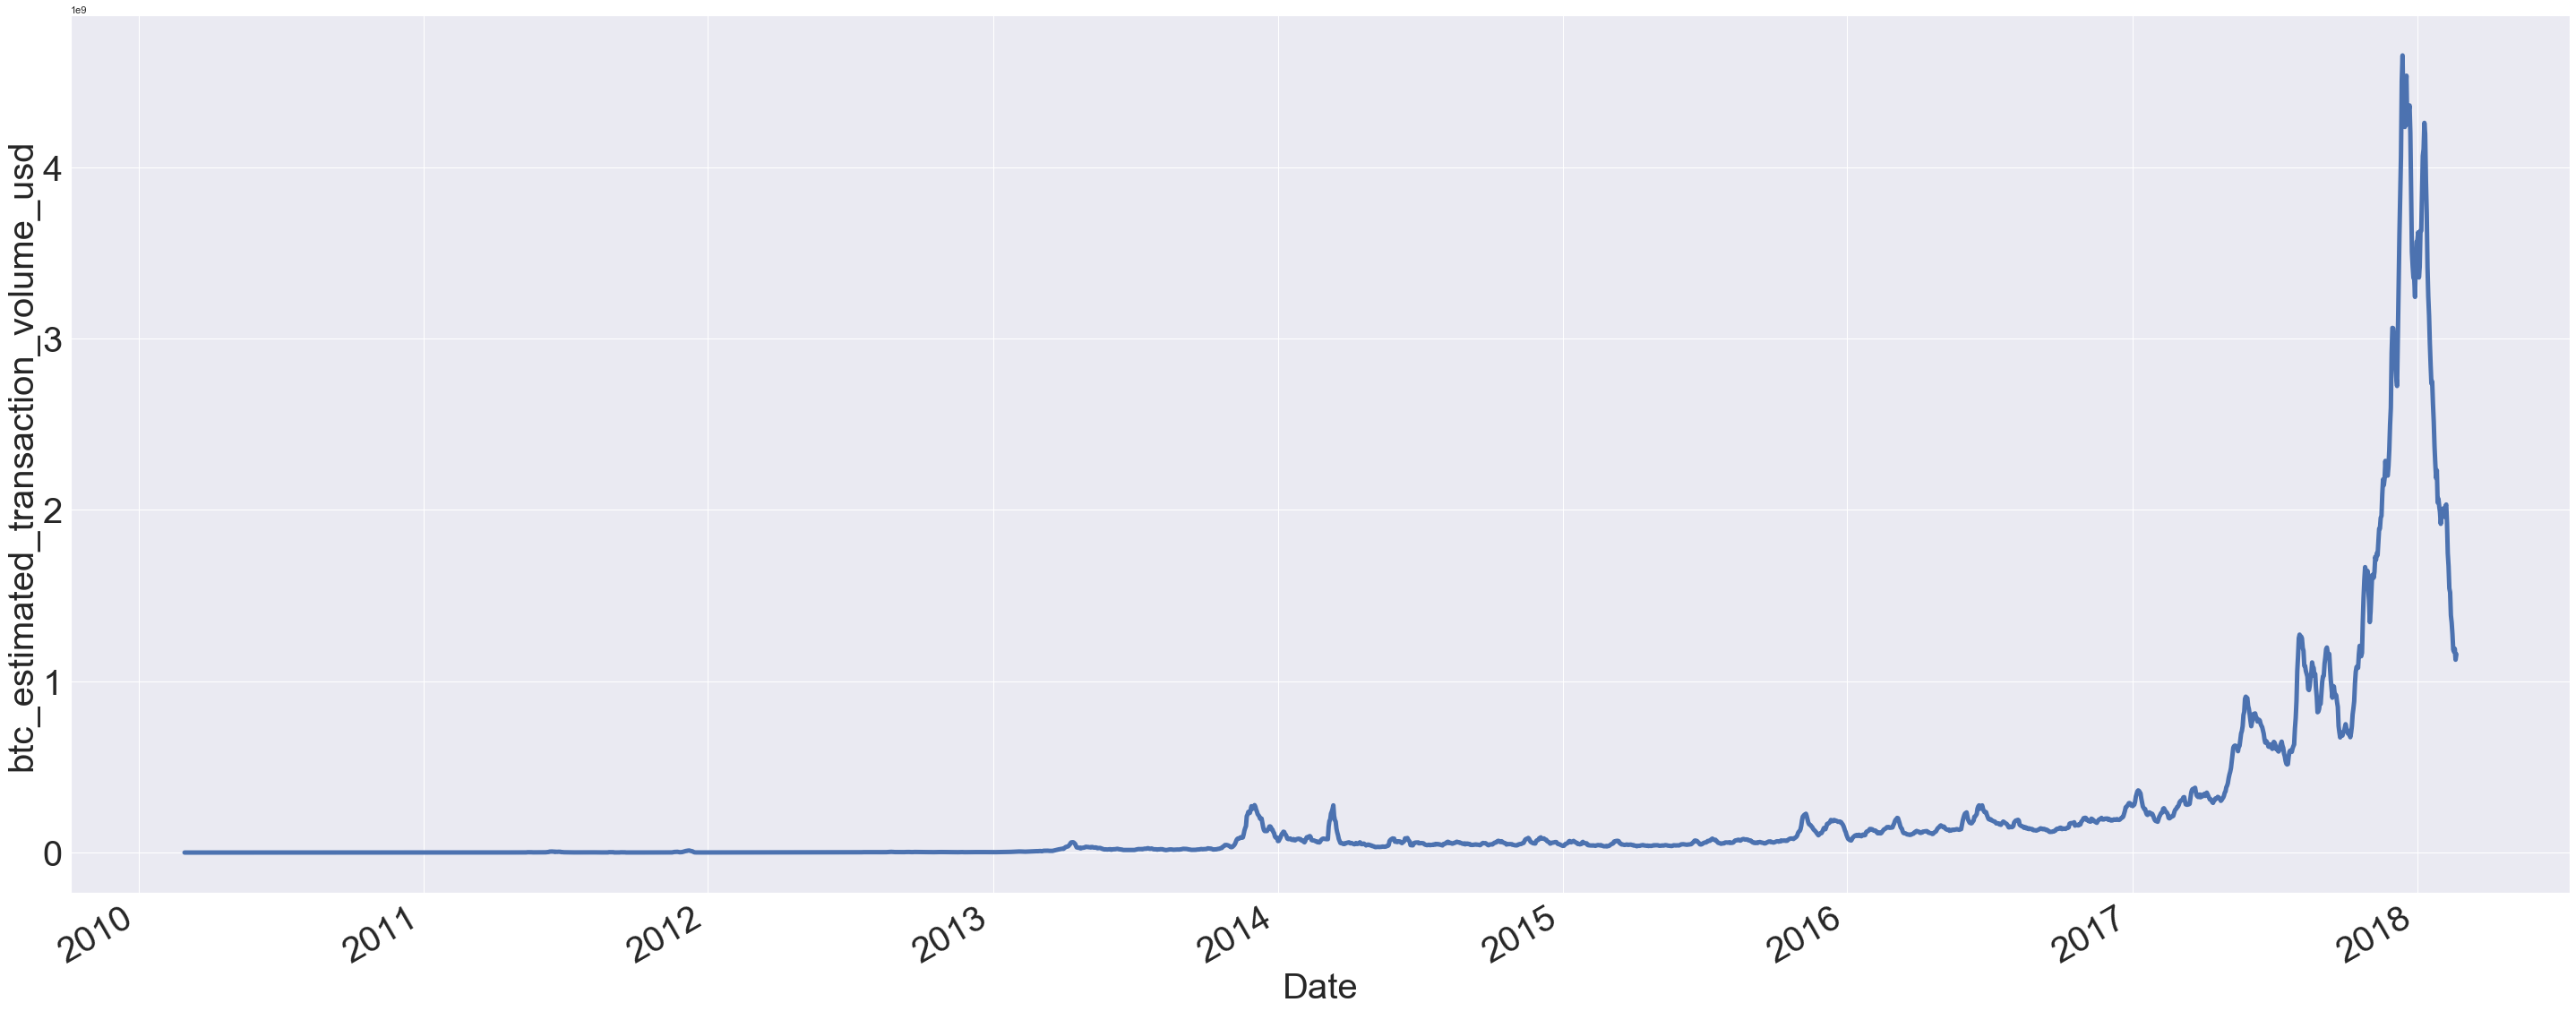

In [60]:
# plt.rcParams.update({'font.size': 552})
for each in bit_df.columns.drop('Date'):
    roll = bit_df[each].rolling(7).mean()
    fig, ax = plt.subplots(figsize=(50,20))
    plt.xlabel("Date")
    plt.ylabel(each)
    ax.plot(bit_df["Date"],roll,  linewidth=5)
    fig.autofmt_xdate()
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(40)

- `btc_market_price` does not show any visible increase until **mid 2017** after which there is a sharp increase in the price till December 2017 followed by a slight dip in **March 2018**.
- Value of `btc_total_bitcoins` keeps on gradually increasing from **0.2** to **1.7** throughout the years.
- `btc_market_cap` and `btc_trade_volumes` follows a similar trend as that of `btc_market_price`.
- `btc_block_size` increases (slightly) exponentially to a value of ~160000 in 2018.
- `btc_avg_block_size` has no significant change or increase uptil **May 2013**. After this, it keeps on gradually increasing till 2018 with significant fluctuation throughout.
- There was no increase in `btc_n_orphaned_blocks` till **March 2014**. Since then, there have been huge fluctuation in the values till **Mid 2017**, especially in the year **2015-2016**.
- `btc_n_transactions_per_block` has no significant change or increase uptil **April 2012**. After this, it keeps on gradually increasing till 2018 with significant fluctuation throughout and ends with a dip in 2018.
- `btc_median_confirmation_time` has no significant change or increase uptil **2012**. There is a sharp increase in **Mid 2012** to *~23*. It fluctuates around the value  of 8 from the year **2013 - 2017**. It then increases and fluctuates ever more till 2018.
- `btc_hash_rate` and `btc_difficulty` does not show any visible increase until **mid 2016** after which there is a sharp increase in the price till February 2018.
- `btc_miners_revenue` does not show any visible increase until **mid 2017** after which there is a sharp increase in the price till December 2017 followed by a huge dip in **March 2018** to the value of *~1.5*.
- `btc_transaction_fees` does not show any visible increase until **mid 2016** after which it fluctuates till December 2017. Transaction fees increases drastically at the end of **2017** which is followed by a sudden drop in the fees to **less than 100** in February 2018.
- `btc_cost_per_transaction_percent` spiked to *~14000* in Feb/March 2010 but then suddenly dropped back to almost none in the following month. It stayed that way for the rest of the years.
- `btc_cost_per_transaction` increased by almost **20** in **Mid 2011** but then kept on decreasing till **February 2013** and then increased again for the next **11** months. It gradually decreased again till **Mid 2017** and then increased drastically for the next 6 months.
- `btc_n_unique_addresses` and `btc_n_transactions_total` follow a similar trend i.e a gradual increase from the start to the end.
- The estimated transaction volume, `btc_estimated_transaction_volume`, estimated a huge spike to the value of *~4000000* in **November 2011**.
- The `btc_output_volume` fluctuates around almost the same value throughout the whole period. There were two spikes of interest. One occured around **September 2012** and an even larger one occured at the start of **2016**.